# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# The pandas Series

In [2]:
# create a four item Series
s = pd.Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [3]:
# get value at label 1
s[1]

2

In [4]:
# return a Series with the row with labels 1 and 3
s[[1, 3]]

1    2
3    4
dtype: int64

In [5]:
# create a series using an explicit index
s = pd.Series([1, 2, 3, 4], 
               index = ['a', 'b', 'c', 'd'])
s

a    1
b    2
c    3
d    4
dtype: int64

In [6]:
# look up items the series having index 'a' and 'd'
s[['a', 'd']]

a    1
d    4
dtype: int64

In [7]:
# passing a list of integers to a Series that has
# non-integer index labels will look up based upon
# 0-based index like an array
s[[1, 2]]

b    2
c    3
dtype: int64

In [8]:
# get only the index of the Series
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [9]:
# create a Series who's index is a series of dates
# between the two specified dates (inclusive)
dates = pd.date_range('2016-04-01', '2016-04-06')
dates

DatetimeIndex(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
               '2016-04-05', '2016-04-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
# create a Series with values (representing temperatures)
# for each date in the index
temps1 = pd.Series([80, 82, 85, 90, 83, 87], 
                   index = dates)
temps1

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, dtype: int64

In [11]:
# what's the temperation for 2016-4-4?
temps1['2016-04-04']

90

In [12]:
# create a second series of values using the same index
temps2 = pd.Series([70, 75, 69, 83, 79, 77], 
                   index = dates)
# the following aligns the two by their index values
# and calculates the difference at those matching labels
temp_diffs = temps1 - temps2
temp_diffs

2016-04-01    10
2016-04-02     7
2016-04-03    16
2016-04-04     7
2016-04-05     4
2016-04-06    10
Freq: D, dtype: int64

In [13]:
# and also possible by integer position as if the 
# series was an array
temp_diffs[2]

16

In [14]:
# calculate the mean of the values in the Series
temp_diffs.mean()

9.0

# The pandas DataFrame

In [15]:
# create a DataFrame from the two series objects temp1 and temp2
# and give them column names
temps_df = pd.DataFrame(
            {'Missoula': temps1, 
             'Philadelphia': temps2})
temps_df

            Missoula  Philadelphia
2016-04-01        80            70
2016-04-02        82            75
2016-04-03        85            69
2016-04-04        90            83
2016-04-05        83            79
2016-04-06        87            77

In [16]:
# get the column with the name Missoula
temps_df['Missoula']

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, Name: Missoula, dtype: int64

In [17]:
# likewise we can get just the Philadelphia column
temps_df['Philadelphia']

2016-04-01    70
2016-04-02    75
2016-04-03    69
2016-04-04    83
2016-04-05    79
2016-04-06    77
Freq: D, Name: Philadelphia, dtype: int64

In [18]:
# return both columns in a different order
temps_df[['Philadelphia', 'Missoula']]

            Philadelphia  Missoula
2016-04-01            70        80
2016-04-02            75        82
2016-04-03            69        85
2016-04-04            83        90
2016-04-05            79        83
2016-04-06            77        87

In [19]:
# retrieve the Missoula column through property syntax
temps_df.Missoula

2016-04-01    80
2016-04-02    82
2016-04-03    85
2016-04-04    90
2016-04-05    83
2016-04-06    87
Freq: D, Name: Missoula, dtype: int64

In [20]:
# calculate the temperature difference between the two cities
temps_df.Missoula - temps_df.Philadelphia

2016-04-01    10
2016-04-02     7
2016-04-03    16
2016-04-04     7
2016-04-05     4
2016-04-06    10
Freq: D, dtype: int64

In [21]:
# add a column to temp_df which contains the difference in temps
temps_df['Difference'] = temp_diffs
temps_df

            Missoula  Philadelphia  Difference
2016-04-01        80            70          10
2016-04-02        82            75           7
2016-04-03        85            69          16
2016-04-04        90            83           7
2016-04-05        83            79           4
2016-04-06        87            77          10

In [22]:
# get the columns, which is also an Index object
temps_df.columns

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [23]:
# slice the temp differences column for the rows at 
# location 1 through 4 (as though it is an array)
temps_df.Difference[1:4]

2016-04-02     7
2016-04-03    16
2016-04-04     7
Freq: D, Name: Difference, dtype: int64

In [24]:
# get the row at array position 1
temps_df.iloc[1]

Missoula        82
Philadelphia    75
Difference       7
Name: 2016-04-02 00:00:00, dtype: int64

In [25]:
# the names of the columns have become the index
# they have been 'pivoted'
temps_df.iloc[1].index

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [26]:
# retrieve row by index label using .loc
temps_df.loc['2016-04-05']

Missoula        83
Philadelphia    79
Difference       4
Name: 2016-04-05 00:00:00, dtype: int64

In [27]:
# get the values in the Differences column in tows 1, 3 and 5
# using 0-based location
temps_df.iloc[[1, 3, 5]].Difference

2016-04-02     7
2016-04-04     7
2016-04-06    10
Freq: 2D, Name: Difference, dtype: int64

In [28]:
# which values in the Missoula column are > 82?
temps_df.Missoula > 82

2016-04-01    False
2016-04-02    False
2016-04-03     True
2016-04-04     True
2016-04-05     True
2016-04-06     True
Freq: D, Name: Missoula, dtype: bool

In [29]:
# return the rows where the temps for Missoula > 82
temps_df[temps_df.Missoula > 82]

            Missoula  Philadelphia  Difference
2016-04-03        85            69          16
2016-04-04        90            83           7
2016-04-05        83            79           4
2016-04-06        87            77          10

# Loading data from a CSV file into a DataFrame

In [30]:
# display the contents of test1.csv
# which command to use depends on your OS
!head data/goog.csv # on non-windows systems
#!type data/test1.csv # on windows systems, all lines

In [31]:
# read the contents of the file into a DataFrame
df = pd.read_csv('data/goog.csv')
df

          Date        Open        High         Low       Close   Volume
0   12/19/2016  790.219971  797.659973  786.270020  794.200012  1225900
1   12/20/2016  796.760010  798.650024  793.270020  796.419983   925100
2   12/21/2016  795.840027  796.676025  787.099976  794.559998  1208700
3   12/22/2016  792.359985  793.320007  788.580017  791.260010   969100
4   12/23/2016  790.900024  792.739990  787.280029  789.909973   623400
..         ...         ...         ...         ...         ...      ...
56   3/13/2017  844.000000  848.684998  843.250000  845.539978  1149500
57   3/14/2017  843.640015  847.239990  840.799988  845.619995   779900
58   3/15/2017  847.590027  848.630005  840.770020  847.200012  1379600
59   3/16/2017  849.030029  850.849976  846.130005  848.780029   970400
60   3/17/2017  851.609985  853.400024  847.109985  852.119995  1712300

[61 rows x 6 columns]

In [32]:
# the contents of the date column
df.Date

0     12/19/2016
1     12/20/2016
2     12/21/2016
3     12/22/2016
4     12/23/2016
         ...    
56     3/13/2017
57     3/14/2017
58     3/15/2017
59     3/16/2017
60     3/17/2017
Name: Date, Length: 61, dtype: object

In [33]:
# we can get the first value in the date column
df.Date[0]

'12/19/2016'

In [34]:
# it is a string
type(df.Date[0])

str

In [35]:
# read the data and tell pandas the date column should be 
# a date in the resulting DataFrame
df = pd.read_csv('data/goog.csv', parse_dates=['Date'])
df

         Date        Open        High         Low       Close   Volume
0  2016-12-19  790.219971  797.659973  786.270020  794.200012  1225900
1  2016-12-20  796.760010  798.650024  793.270020  796.419983   925100
2  2016-12-21  795.840027  796.676025  787.099976  794.559998  1208700
3  2016-12-22  792.359985  793.320007  788.580017  791.260010   969100
4  2016-12-23  790.900024  792.739990  787.280029  789.909973   623400
..        ...         ...         ...         ...         ...      ...
56 2017-03-13  844.000000  848.684998  843.250000  845.539978  1149500
57 2017-03-14  843.640015  847.239990  840.799988  845.619995   779900
58 2017-03-15  847.590027  848.630005  840.770020  847.200012  1379600
59 2017-03-16  849.030029  850.849976  846.130005  848.780029   970400
60 2017-03-17  851.609985  853.400024  847.109985  852.119995  1712300

[61 rows x 6 columns]

In [36]:
# verify the type now is date
# in pandas, this is actually a Timestamp
type(df.Date[0])

pandas._libs.tslib.Timestamp

In [37]:
# unfortunately the index is numeric which makes
# accessing data by date more complicated
df.index

RangeIndex(start=0, stop=61, step=1)

In [38]:
# read in again, now specity the data column as being the 
# index of the resulting DataFrame
df = pd.read_csv('data/goog.csv', 
                 parse_dates=['Date'], 
                 index_col='Date')
df

                  Open        High         Low       Close   Volume
Date                                                               
2016-12-19  790.219971  797.659973  786.270020  794.200012  1225900
2016-12-20  796.760010  798.650024  793.270020  796.419983   925100
2016-12-21  795.840027  796.676025  787.099976  794.559998  1208700
2016-12-22  792.359985  793.320007  788.580017  791.260010   969100
2016-12-23  790.900024  792.739990  787.280029  789.909973   623400
...                ...         ...         ...         ...      ...
2017-03-13  844.000000  848.684998  843.250000  845.539978  1149500
2017-03-14  843.640015  847.239990  840.799988  845.619995   779900
2017-03-15  847.590027  848.630005  840.770020  847.200012  1379600
2017-03-16  849.030029  850.849976  846.130005  848.780029   970400
2017-03-17  851.609985  853.400024  847.109985  852.119995  1712300

[61 rows x 5 columns]

In [39]:
# and the index is now a DatetimeIndex
df.index

DatetimeIndex(['2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-17', '2017-01-18',
               '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30',
               '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17', '2017-02-21', '2017-02-22',
               '2017-02-23', '2017-02-24', '2017-02-27', '2017-02-28',
               '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06',
               '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10',
      

# Visualization

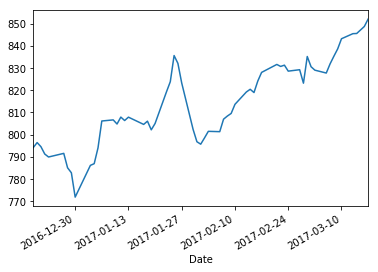

In [40]:
# plots the values in the Close column
df.Close.plot();

# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Creating a Series using Python lists and dictionaries

In [2]:
# create a series of multiple values from a list
s = pd.Series([10, 11, 12, 13, 14])
s

0    10
1    11
2    12
3    13
4    14
dtype: int64

In [3]:
# value stored at index label 3
s[3]

13

In [4]:
# create a Series of alphas
pd.Series(['Mike', 'Marcia', 'Mikael', 'Bleu'])

0      Mike
1    Marcia
2    Mikael
3      Bleu
dtype: object

In [5]:
# a sequence of 5 values, all 2
pd.Series([2]*5)

0    2
1    2
2    2
3    2
4    2
dtype: int64

In [6]:
# use each character as a value
pd.Series(list('abcde'))

0    a
1    b
2    c
3    d
4    e
dtype: object

In [7]:
# create Series from dict
pd.Series({'Mike': 'Dad', 
           'Marcia': 'Mom', 
           'Mikael': 'Son', 
           'Bleu': 'Best doggie ever' })

Bleu      Best doggie ever
Marcia                 Mom
Mikael                 Son
Mike                   Dad
dtype: object

# Creation using NumPy functions

In [8]:
# 4 through 8
pd.Series(np.arange(4, 9))

0    4
1    5
2    6
3    7
4    8
dtype: int64

In [9]:
# 0 through 9
pd.Series(np.linspace(0, 9, 5))

0    0.00
1    2.25
2    4.50
3    6.75
4    9.00
dtype: float64

In [10]:
# random numbers
np.random.seed(12345) # always generate the same values
# 5 normally random numbers
pd.Series(np.random.normal(size=5))

0   -0.204708
1    0.478943
2   -0.519439
3   -0.555730
4    1.965781
dtype: float64

# Creation using a scalar value

In [11]:
# create a one item Series
s = pd.Series(2)
s

0    2
dtype: int64

In [12]:
# create the Series
s = pd.Series(np.arange(0, 5))
# multiple all values by 2
s * 2

0    0
1    2
2    4
3    6
4    8
dtype: int64

# The .index and .values properties

In [13]:
# get the values in the Series
s = pd.Series([1, 2, 3])
s.values

array([1, 2, 3])

In [14]:
# show that this is a numpy array
type(s.values)

numpy.ndarray

In [15]:
# get the index of the Series
s.index

RangeIndex(start=0, stop=3, step=1)

# The size and shape of a Series

In [16]:
# example series
s = pd.Series([0, 1, 2, 3])
len(s)

4

In [17]:
# .size is also the # of items in the Series
s.size

4

In [18]:
# .shape is a tuple with one value
s.shape

(4,)

# Specifying an index at creation

In [19]:
# explicitly create an index
labels = ['Mike', 'Marcia', 'Mikael', 'Bleu']
role = ['Dad', 'Mom', 'Son', 'Dog']
s = pd.Series(labels, index=role)
s

Dad      Mike
Mom    Marcia
Son    Mikael
Dog      Bleu
dtype: object

In [20]:
# examine the index
s.index

Index(['Dad', 'Mom', 'Son', 'Dog'], dtype='object')

In [21]:
# who is the Dad?
s['Dad']

'Mike'

# Heads, tails and takes

In [22]:
# a ten item Series
s = pd.Series(np.arange(1, 10), 
              index=list('abcdefghi'))

In [23]:
# show the first five
s.head()

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [24]:
# the first three
s.head(n = 3) # s.head(3) is equivalent

a    1
b    2
c    3
dtype: int64

In [25]:
# the last five
s.tail()

e    5
f    6
g    7
h    8
i    9
dtype: int64

In [26]:
# the last 3
s.tail(n = 3) # equivalent to s.tail(3)

g    7
h    8
i    9
dtype: int64

In [27]:
# only take specific items by position
s.take([1, 5, 8])

b    2
f    6
i    9
dtype: int64

# Lookup by label using the [] and .ix[] operators

In [28]:
# we will use this series to examine lookups
s1 = pd.Series(np.arange(10, 15), index=list('abcde'))
s1

a    10
b    11
c    12
d    13
e    14
dtype: int64

In [29]:
# get the value with label 'a'
s1['a']

10

In [30]:
# get multiple items
s1[['d', 'b']]

d    13
b    11
dtype: int64

In [31]:
# gets values based upon position
s1[[3, 1]]

d    13
b    11
dtype: int64

In [32]:
# to demo lookup by matching labels as integer values
s2 = pd.Series([1, 2, 3, 4], index=[10, 11, 12, 13])
s2

10    1
11    2
12    3
13    4
dtype: int64

In [33]:
# this is by label not position
s2[[13, 10]]

13    4
10    1
dtype: int64

# Explicit position lookup with .iloc[]

In [34]:
# explicitly  by position
s1.iloc[[0, 2]]

a    10
c    12
dtype: int64

In [35]:
# explicitly  by position
s2.iloc[[3, 2]]

13    4
12    3
dtype: int64

# Explicit label lookup with .loc[]

In [36]:
# explicit via labels
s1.loc[['a', 'd']]

a    10
d    13
dtype: int64

In [37]:
# get items at position 11 an d12
s2.loc[[11, 12]]

11    2
12    3
dtype: int64

In [38]:
# -1 and 15 will be NaN
s1.loc[['a', 'f']]

a    10.0
f     NaN
dtype: float64

# Slicing a Series into subsets

In [39]:
# a Series to use for slicing
# using index labels not starting at 0 to demonstrate 
# position based slicing
s = pd.Series(np.arange(100, 110), index=np.arange(10, 20))
s

10    100
11    101
12    102
13    103
14    104
15    105
16    106
17    107
18    108
19    109
dtype: int64

In [40]:
# slice showing items at position 1 thorugh 5
s[1:6]

11    101
12    102
13    103
14    104
15    105
dtype: int64

In [41]:
# lookup via list of positions
s.iloc[[1, 2, 3, 4, 5]]

11    101
12    102
13    103
14    104
15    105
dtype: int64

In [42]:
# items at position 1, 3, 5
s[1:6:2]

11    101
13    103
15    105
dtype: int64

In [43]:
# first five by slicing, same as .head(5)
s[:5]

10    100
11    101
12    102
13    103
14    104
dtype: int64

In [44]:
# fourth position to the end
s[4:]

14    104
15    105
16    106
17    107
18    108
19    109
dtype: int64

In [45]:
# every other item in the first five positions
s[:5:2]

10    100
12    102
14    104
dtype: int64

In [46]:
# every other item starting at the fourth position
s[4::2]

14    104
16    106
18    108
dtype: int64

In [47]:
# reverse the Series
s[::-1]

19    109
18    108
17    107
16    106
15    105
14    104
13    103
12    102
11    101
10    100
dtype: int64

In [48]:
# every other starting at position 4, in reverse
s[4::-2]

14    104
12    102
10    100
dtype: int64

In [49]:
# -4:, which means the last 4 rows
s[-4:]

16    106
17    107
18    108
19    109
dtype: int64

In [50]:
# :-4, all but the last 4
s[:-4]

10    100
11    101
12    102
13    103
14    104
15    105
dtype: int64

In [51]:
# equivalent to s.tail(4).head(3)
s[-4:-1]

16    106
17    107
18    108
dtype: int64

In [52]:
# used to demonstrate the next two slices
s = pd.Series(np.arange(0, 5), 
              index=['a', 'b', 'c', 'd', 'e'])
s

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [53]:
# slices by position as the index is characters
s[1:3]

b    1
c    2
dtype: int64

In [54]:
# this slices by the strings in the index
s['b':'d']

b    1
c    2
d    3
dtype: int64

# Alignment via index labels

In [55]:
# First series for alignment
s1 = pd.Series([1, 2], index=['a', 'b'])
s1

a    1
b    2
dtype: int64

In [56]:
# Second series for alignment
s2 = pd.Series([4, 3], index=['b', 'a'])
s2

b    4
a    3
dtype: int64

In [57]:
# add them
s1 + s2

a    4
b    6
dtype: int64

In [58]:
# multiply all values in s3 by 2
s1 * 2

a    2
b    4
dtype: int64

In [59]:
# scalar series using s3's index
t = pd.Series(2, s1.index)
t

a    2
b    2
dtype: int64

In [60]:
# multiply s1 by t
s1 * t

a    2
b    4
dtype: int64

In [61]:
# we will add this to s1
s3 = pd.Series([5, 6], index=['b', 'c'])
s3

b    5
c    6
dtype: int64

In [62]:
# s1 and s3 have different sets of index labels
# NaN will result for a and c
s1 + s3

a    NaN
b    7.0
c    NaN
dtype: float64

In [63]:
# 2 'a' labels
s1 = pd.Series([1.0, 2.0, 3.0], index=['a', 'a', 'b'])
s1

a    1.0
a    2.0
b    3.0
dtype: float64

In [64]:
# 3 a labels
s2 = pd.Series([4.0, 5.0, 6.0, 7.0], index=['a', 'a', 'c', 'a'])
s2

a    4.0
a    5.0
c    6.0
a    7.0
dtype: float64

In [65]:
# will result in 6 'a' index labels, and NaN for b and c
s1 + s2

a    5.0
a    6.0
a    8.0
a    6.0
a    7.0
a    9.0
b    NaN
c    NaN
dtype: float64

# Boolean selection

In [66]:
# which rows have values that are > 5?
s = pd.Series(np.arange(0, 5), index=list('abcde'))
logical_results = s >= 3
logical_results

a    False
b    False
c    False
d     True
e     True
dtype: bool

In [67]:
# select where True
s[logical_results]

d    3
e    4
dtype: int64

In [68]:
# a little shorter version
s[s > 5]

Series([], dtype: int64)

In [69]:
# commented as it throws an exception
# s[s >= 2 and s < 5]

In [70]:
# correct syntax
s[(s >=2) & (s < 5)]

c    2
d    3
e    4
dtype: int64

In [71]:
# are all items >= 0?
(s >= 0).all()

True

In [72]:
# any items < 2?
s[s < 2].any()

True

In [73]:
# how many values < 2?
(s < 2).sum()

2

# Reindexing a Series

In [74]:
# sample series of five items
np.random.seed(123456)
s = pd.Series(np.random.randn(5))
s

0    0.469112
1   -0.282863
2   -1.509059
3   -1.135632
4    1.212112
dtype: float64

In [75]:
# change the index
s.index = ['a', 'b', 'c', 'd', 'e']
s

a    0.469112
b   -0.282863
c   -1.509059
d   -1.135632
e    1.212112
dtype: float64

In [76]:
# a series that we will reindex
np.random.seed(123456)
s1 = pd.Series(np.random.randn(4), ['a', 'b', 'c', 'd'])
s1

a    0.469112
b   -0.282863
c   -1.509059
d   -1.135632
dtype: float64

In [77]:
# reindex with different number of labels
# results in dropped rows and/or NaN's
s2 = s1.reindex(['a', 'c', 'g'])
s2

a    0.469112
c   -1.509059
g         NaN
dtype: float64

In [78]:
# different types for the same values of labels
# causes big trouble
s1 = pd.Series([0, 1, 2], index=[0, 1, 2])
s2 = pd.Series([3, 4, 5], index=['0', '1', '2'])
s1 + s2

0   NaN
1   NaN
2   NaN
0   NaN
1   NaN
2   NaN
dtype: float64

In [79]:
# reindex by casting the label types
# and we will get the desired result
s2.index = s2.index.values.astype(int)
s1 + s2

0    3
1    5
2    7
dtype: int64

In [80]:
# fill with 0 instead of NaN
s2 = s.copy()
s2.reindex(['a', 'f'], fill_value=0)

a    0.469112
f    0.000000
dtype: float64

In [81]:
# create example to demonstrate fills
s3 = pd.Series(['red', 'green', 'blue'], index=[0, 3, 5])
s3

0      red
3    green
5     blue
dtype: object

In [82]:
# forward fill example
s3.reindex(np.arange(0,7), method='ffill')

0      red
1      red
2      red
3    green
4    green
5     blue
6     blue
dtype: object

In [83]:
# backwards fill example
s3.reindex(np.arange(0,7), method='bfill')

0      red
1    green
2    green
3    green
4     blue
5     blue
6      NaN
dtype: object

# Modifying a Series in-place

In [84]:
# generate a Series to play with
np.random.seed(123456)
s = pd.Series(np.random.randn(3), index=['a', 'b', 'c'])
s

a    0.469112
b   -0.282863
c   -1.509059
dtype: float64

In [85]:
# change a value in the Series
# this is done in-place
# a new Series is not returned that has a modified value
s['d'] = 100
s

a      0.469112
b     -0.282863
c     -1.509059
d    100.000000
dtype: float64

In [86]:
# modify the value at 'd' in-place
s['d'] = -100
s

a      0.469112
b     -0.282863
c     -1.509059
d   -100.000000
dtype: float64

In [87]:
# remove a row / item
del(s['a'])
s

b     -0.282863
c     -1.509059
d   -100.000000
dtype: float64

In [88]:
copy = s.copy() # preserve s
slice = copy[:2] # slice with first two rows
slice

b   -0.282863
c   -1.509059
dtype: float64

In [89]:
# change item with label 10 to 1000
slice['b'] = 0
# and see it in the source
copy

b      0.000000
c     -1.509059
d   -100.000000
dtype: float64

# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Creating a DataFrame using NumPy function results

In [2]:
# From a 1-d array
pd.DataFrame(np.arange(1, 6))

   0
0  1
1  2
2  3
3  4
4  5

In [3]:
# create a DataFrame from a 2-d ndarray
df = pd.DataFrame(np.array([[10, 11], [20, 21]]))
df

    0   1
0  10  11
1  20  21

In [4]:
# retrieve the columns index
df.columns

RangeIndex(start=0, stop=2, step=1)

In [5]:
# specify column names
df = pd.DataFrame(np.array([[70, 71], [90, 91]]),
                  columns=['Missoula', 'Philadelphia'])
df

   Missoula  Philadelphia
0        70            71
1        90            91

In [6]:
# how many rows?
len(df)

2

In [7]:
# what is the dimensionality
df.shape

(2, 2)

# Creating a DataFrame using a Python dictionary and pandas Series objects

In [8]:
# initialization using a python dictionary
temps_missoula = [70, 71]
temps_philly = [90, 91]
temperatures = {'Missoula': temps_missoula,
                'Philadelphia': temps_philly}
pd.DataFrame(temperatures)

   Missoula  Philadelphia
0        70            90
1        71            91

In [9]:
# create a DataFrame for a list of Series objects
temps_at_time0 = pd.Series([70, 90])
temps_at_time1 = pd.Series([71, 91])
df = pd.DataFrame([temps_at_time0, temps_at_time1])
df

    0   1
0  70  90
1  71  91

In [10]:
# try to specify column names
df = pd.DataFrame([temps_at_time0, temps_at_time1],
                  columns=['Missoula', 'Philadelphia'])
df

   Missoula  Philadelphia
0       NaN           NaN
1       NaN           NaN

In [11]:
# specify names of columns after creation
df = pd.DataFrame([temps_at_time0, temps_at_time1])
df.columns = ['Missoula', 'Philadelphia']
df

   Missoula  Philadelphia
0        70            90
1        71            91

In [12]:
# construct using a dict of Series objects
temps_mso_series = pd.Series(temps_missoula)
temps_phl_series = pd.Series(temps_philly)
df = pd.DataFrame({'Missoula': temps_mso_series,
                   'Philadelphia': temps_phl_series})
df

   Missoula  Philadelphia
0        70            90
1        71            91

In [13]:
# alignment occurs during creation
temps_nyc_series = pd.Series([85, 87], index=[1, 2])
df = pd.DataFrame({'Missoula': temps_mso_series,
                   'Philadelphia': temps_phl_series,
                   'New York': temps_nyc_series})
df

   Missoula  New York  Philadelphia
0      70.0       NaN          90.0
1      71.0      85.0          91.0
2       NaN      87.0           NaN

# Creating a DataFrame from a CSV file

In [14]:
# read in the data and print the first five rows
# use the Symbol column as the index, and 
# only read in columns in positions 0, 2, 3, 7
sp500 = pd.read_csv("data/sp500.csv", 
                    index_col='Symbol', 
                    usecols=[0, 2, 3, 7])

In [15]:
# peek at the first 5 rows of the data using .head()
sp500.head()

                        Sector   Price  Book Value
Symbol                                            
MMM                Industrials  141.14      26.668
ABT                Health Care   39.60      15.573
ABBV               Health Care   53.95       2.954
ACN     Information Technology   79.79       8.326
ACE                 Financials  102.91      86.897

In [16]:
# how many rows of data?  Should be 500
len(sp500)

500

In [17]:
# what is the shape?
sp500.shape

(500, 3)

In [18]:
# what is the size?
sp500.size

1500

In [19]:
# examine the index
sp500.index

Index(['MMM', 'ABT', 'ABBV', 'ACN', 'ACE', 'ACT', 'ADBE', 'AES', 'AET', 'AFL',
       ...
       'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZMH', 'ZION', 'ZTS'],
      dtype='object', name='Symbol', length=500)

In [20]:
# get the columns
sp500.columns

Index(['Sector', 'Price', 'Book Value'], dtype='object')

# Selecting columns of a DataFrame

In [21]:
# retrieve the Sector column
sp500['Sector'].head()

Symbol
MMM                Industrials
ABT                Health Care
ABBV               Health Care
ACN     Information Technology
ACE                 Financials
Name: Sector, dtype: object

In [22]:
type(sp500['Sector'])

pandas.core.series.Series

In [23]:
# retrieve the Price and Book Value columns
sp500[['Price', 'Book Value']].head()

         Price  Book Value
Symbol                    
MMM     141.14      26.668
ABT      39.60      15.573
ABBV     53.95       2.954
ACN      79.79       8.326
ACE     102.91      86.897

In [24]:
# show that this is a DataFrame
type(sp500[['Price', 'Book Value']])

pandas.core.frame.DataFrame

In [25]:
# attribute access of column by name
sp500.Price

Symbol
MMM     141.14
ABT      39.60
ABBV     53.95
ACN      79.79
ACE     102.91
         ...  
YHOO     35.02
YUM      74.77
ZMH     101.84
ZION     28.43
ZTS      30.53
Name: Price, Length: 500, dtype: float64

# Selecting rows of a DataFrame

In [26]:
# get row with label MMM
# returned as a Series
sp500.loc['MMM']

Sector        Industrials
Price              141.14
Book Value         26.668
Name: MMM, dtype: object

In [27]:
# rows with label MMM and MSFT
# this is a DataFrame result
sp500.loc[['MMM', 'MSFT']]

                        Sector   Price  Book Value
Symbol                                            
MMM                Industrials  141.14      26.668
MSFT    Information Technology   40.12      10.584

In [28]:
# get rows in location 0 and 2
sp500.iloc[[0, 2]]

             Sector   Price  Book Value
Symbol                                 
MMM     Industrials  141.14      26.668
ABBV    Health Care   53.95       2.954

In [29]:
# get the location of MMM and A in the index
i1 = sp500.index.get_loc('MMM')
i2 = sp500.index.get_loc('A')
(i1, i2)

(0, 10)

In [30]:
# and get the rows
sp500.iloc[[i1, i2]]

             Sector   Price  Book Value
Symbol                                 
MMM     Industrials  141.14      26.668
A       Health Care   56.18      16.928

# Scalar lookup by label or location using .at[] and .iat[] 

In [31]:
# by label in both the index and column
sp500.at['MMM', 'Price']

141.13999999999999

In [32]:
# by location.  Row 0, column 1
sp500.iat[0, 1]

141.13999999999999

# Slicing using the [] operator

In [33]:
# first five rows
sp500[:5]

                        Sector   Price  Book Value
Symbol                                            
MMM                Industrials  141.14      26.668
ABT                Health Care   39.60      15.573
ABBV               Health Care   53.95       2.954
ACN     Information Technology   79.79       8.326
ACE                 Financials  102.91      86.897

In [34]:
# ABT through ACN labels
sp500['ABT':'ACN']

                        Sector  Price  Book Value
Symbol                                           
ABT                Health Care  39.60      15.573
ABBV               Health Care  53.95       2.954
ACN     Information Technology  79.79       8.326

# Selecting rows using Boolean selection

In [35]:
# what rows have a price < 100?
sp500.Price < 100

Symbol
MMM     False
ABT      True
ABBV     True
ACN      True
ACE     False
        ...  
YHOO     True
YUM      True
ZMH     False
ZION     True
ZTS      True
Name: Price, Length: 500, dtype: bool

In [36]:
# now get the rows with Price < 100
sp500[sp500.Price < 100]

                        Sector  Price  Book Value
Symbol                                           
ABT                Health Care  39.60      15.573
ABBV               Health Care  53.95       2.954
ACN     Information Technology  79.79       8.326
ADBE    Information Technology  64.30      13.262
AES                  Utilities  13.61       5.781
...                        ...    ...         ...
XYL                Industrials  38.42      12.127
YHOO    Information Technology  35.02      12.768
YUM     Consumer Discretionary  74.77       5.147
ZION                Financials  28.43      30.191
ZTS                Health Care  30.53       2.150

[407 rows x 3 columns]

In [37]:
# get only the Price where Price is < 10 and > 0
r = sp500[(sp500.Price < 10) & 
          (sp500.Price > 6)] ['Price']
r

Symbol
HCBK    9.80
HBAN    9.10
SLM     8.82
WIN     9.38
Name: Price, dtype: float64

In [38]:
# price > 100 and in the Health Care Sector
r = sp500[(sp500.Sector == 'Health Care') & 
          (sp500.Price > 100.00)] [['Price', 'Sector']]
r

         Price       Sector
Symbol                     
ACT     213.77  Health Care
ALXN    162.30  Health Care
AGN     166.92  Health Care
AMGN    114.33  Health Care
BCR     146.62  Health Care
...        ...          ...
REGN    297.77  Health Care
TMO     115.74  Health Care
WAT     100.54  Health Care
WLP     108.82  Health Care
ZMH     101.84  Health Care

[19 rows x 2 columns]

# Selecting across both rows and columns

In [39]:
# select the price and sector columns for ABT and ZTS
sp500.loc[['ABT', 'ZTS']][['Sector', 'Price']]

             Sector  Price
Symbol                    
ABT     Health Care  39.60
ZTS     Health Care  30.53

# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# read in the data and print the first five rows
# use the Symbol column as the index, and 
# only read in columns in positions 0, 2, 3, 7
sp500 = pd.read_csv("data/sp500.csv", 
                    index_col='Symbol', 
                    usecols=[0, 2, 3, 7])

# Renaming columns

In [2]:
# rename the Book Value column to not have a space
# this returns a copy with the column renamed
newSP500 = sp500.rename(columns=
                        {'Book Value': 'BookValue'})
# print first 2 rows
newSP500[:2]

             Sector   Price  BookValue
Symbol                                
MMM     Industrials  141.14     26.668
ABT     Health Care   39.60     15.573

In [3]:
# verify the columns in the original did not change
sp500.columns

Index(['Sector', 'Price', 'Book Value'], dtype='object')

In [4]:
# this changes the column in-place
sp500.rename(columns=                  
             {'Book Value': 'BookValue'},                   
             inplace=True)
# we can see the column is changed
sp500.columns

Index(['Sector', 'Price', 'BookValue'], dtype='object')

In [5]:
# and now we can use .BookValue
sp500.BookValue[:5]

Symbol
MMM     26.668
ABT     15.573
ABBV     2.954
ACN      8.326
ACE     86.897
Name: BookValue, dtype: float64

# Adding new columns with [] and .insert()

In [6]:
# make a copy so that we keep the original data unchanged
sp500_copy = sp500.copy()
# add the new column
sp500_copy['RoundedPrice'] = sp500.Price.round()
sp500_copy[:2]

             Sector   Price  BookValue  RoundedPrice
Symbol                                              
MMM     Industrials  141.14     26.668         141.0
ABT     Health Care   39.60     15.573          40.0

In [7]:
# make a copy so that we keep the original data unchanged
copy = sp500.copy()
# insert sp500.Price * 2 as the 
# second column in the DataFrame
copy.insert(1, 'RoundedPrice', sp500.Price.round())
copy[:2]

             Sector  RoundedPrice   Price  BookValue
Symbol                                              
MMM     Industrials         141.0  141.14     26.668
ABT     Health Care          40.0   39.60     15.573

# Adding columns through enlargement

In [8]:
# copy of subset / slice
ss = sp500[:3].copy()
# add the new column initialized to 0
ss.loc[:,'PER'] = 0
# take a look at the results
ss

             Sector   Price  BookValue  PER
Symbol                                     
MMM     Industrials  141.14     26.668    0
ABT     Health Care   39.60     15.573    0
ABBV    Health Care   53.95      2.954    0

In [9]:
# copy of subset / slice
ss = sp500[:3].copy()
# add the new column initialized with random numbers
np.random.seed(123456)
ss.loc[:,'PER'] = pd.Series(np.random.normal(size=3), index=ss.index)
# take a look at the results
ss

             Sector   Price  BookValue       PER
Symbol                                          
MMM     Industrials  141.14     26.668  0.469112
ABT     Health Care   39.60     15.573 -0.282863
ABBV    Health Care   53.95      2.954 -1.509059

# Adding columns using concatenation

In [10]:
# create a DataFrame with only the RoundedPrice column
rounded_price = pd.DataFrame({'RoundedPrice':    
                              sp500.Price.round()})
# concatenate along the columns axis
concatenated = pd.concat([sp500, rounded_price], axis=1)
concatenated[:5]

                        Sector   Price  BookValue  \
Symbol                                              
MMM                Industrials  141.14     26.668   
ABT                Health Care   39.60     15.573   
ABBV               Health Care   53.95      2.954   
ACN     Information Technology   79.79      8.326   
ACE                 Financials  102.91     86.897   

        RoundedPrice  
Symbol                
MMM            141.0  
ABT             40.0  
ABBV            54.0  
ACN             80.0  
ACE            103.0  

In [11]:
# create a DataFrame with only the RoundedPrice column
rounded_price = pd.DataFrame({'Price': sp500.Price.round()})
rounded_price[:5]

        Price
Symbol       
MMM     141.0
ABT      40.0
ABBV     54.0
ACN      80.0
ACE     103.0

In [12]:
# this will result in duplicate Price columm
dups = pd.concat([sp500, rounded_price], axis=1)
dups[:5]

                        Sector   Price  BookValue  Price
Symbol                                                  
MMM                Industrials  141.14     26.668  141.0
ABT                Health Care   39.60     15.573   40.0
ABBV               Health Care   53.95      2.954   54.0
ACN     Information Technology   79.79      8.326   80.0
ACE                 Financials  102.91     86.897  103.0

In [13]:
# retrieves both Price columns
dups.Price[:5]

         Price  Price
Symbol               
MMM     141.14  141.0
ABT      39.60   40.0
ABBV     53.95   54.0
ACN      79.79   80.0
ACE     102.91  103.0

# Reordering columns

In [14]:
# return a new DataFrame with the columns reversed
reversed_column_names = sp500.columns[::-1]
sp500[reversed_column_names][:5]

        BookValue   Price                  Sector
Symbol                                           
MMM        26.668  141.14             Industrials
ABT        15.573   39.60             Health Care
ABBV        2.954   53.95             Health Care
ACN         8.326   79.79  Information Technology
ACE        86.897  102.91              Financials

# Replacing the contents of a column

In [15]:
# this occurs in-place so let's use a copy
copy = sp500.copy()
# replace the Price column data with the new values
# instead of adding a new column
copy.Price = rounded_price.Price
copy[:5]

                        Sector  Price  BookValue
Symbol                                          
MMM                Industrials  141.0     26.668
ABT                Health Care   40.0     15.573
ABBV               Health Care   54.0      2.954
ACN     Information Technology   80.0      8.326
ACE                 Financials  103.0     86.897

In [16]:
# this occurs in-place so let's use a copy
copy = sp500.copy()
# replace the Price column data wwith rounded values
copy.loc[:,'Price'] = rounded_price.Price
copy[:5]

                        Sector  Price  BookValue
Symbol                                          
MMM                Industrials  141.0     26.668
ABT                Health Care   40.0     15.573
ABBV               Health Care   54.0      2.954
ACN     Information Technology   80.0      8.326
ACE                 Financials  103.0     86.897

# Deleting columns

In [17]:
# Example of using del to delete a column
# make a copy as this is done in-place
copy = sp500.copy()
del copy['BookValue']
copy[:2]

             Sector   Price
Symbol                     
MMM     Industrials  141.14
ABT     Health Care   39.60

In [18]:
# Example of using pop to remove a column from a DataFrame
# first make a copy of a subset of the data frame as
# pop works in place
copy = sp500.copy()
# this will remove Sector and return it as a series
popped = copy.pop('Sector')
# Sector column removed in-place
copy[:2]

         Price  BookValue
Symbol                   
MMM     141.14     26.668
ABT      39.60     15.573

In [19]:
# and we have the Sector column as the result of the pop
popped[:5]

Symbol
MMM                Industrials
ABT                Health Care
ABBV               Health Care
ACN     Information Technology
ACE                 Financials
Name: Sector, dtype: object

In [20]:
# Example of using drop to remove a column 
# make a copy of a subset of the data frame
copy = sp500.copy()
# this will return a new DataFrame with 'Sector’ removed
# the copy DataFrame is not modified
afterdrop = copy.drop(['Sector'], axis = 1)
afterdrop[:5]

         Price  BookValue
Symbol                   
MMM     141.14     26.668
ABT      39.60     15.573
ABBV     53.95      2.954
ACN      79.79      8.326
ACE     102.91     86.897

# Appending rows from other DataFrame objects with .append()

In [21]:
# copy the first three rows of sp500
df1 = sp500.iloc[0:3].copy()
# copy 10th and 11th rows
df2 = sp500.iloc[[10, 11, 2]]
# append df1 and df2
appended = df1.append(df2)
# the result is the rows of the first followed by 
# those of the second
appended

             Sector   Price  BookValue
Symbol                                
MMM     Industrials  141.14     26.668
ABT     Health Care   39.60     15.573
ABBV    Health Care   53.95      2.954
A       Health Care   56.18     16.928
GAS       Utilities   52.98     32.462
ABBV    Health Care   53.95      2.954

In [22]:
# data frame using df1.index and just a PER column
# also a good example of using a scalar value
# to initialize multiple rows
df3 = pd.DataFrame(0.0, 
                   index=df1.index,
                   columns=['PER'])
df3

        PER
Symbol     
MMM     0.0
ABT     0.0
ABBV    0.0

In [23]:
# append df1 and df3
# each has three rows, so 6 rows is the result
# df1 had no PER column, so NaN from for those rows
# df3 had no BookValue, Price or Sector, so NaN's
df1.append(df3)

        BookValue  PER   Price       Sector
Symbol                                     
MMM        26.668  NaN  141.14  Industrials
ABT        15.573  NaN   39.60  Health Care
ABBV        2.954  NaN   53.95  Health Care
MMM           NaN  0.0     NaN          NaN
ABT           NaN  0.0     NaN          NaN
ABBV          NaN  0.0     NaN          NaN

In [24]:
# ignore index labels, create default index
df1.append(df3, ignore_index=True)

   BookValue  PER   Price       Sector
0     26.668  NaN  141.14  Industrials
1     15.573  NaN   39.60  Health Care
2      2.954  NaN   53.95  Health Care
3        NaN  0.0     NaN          NaN
4        NaN  0.0     NaN          NaN
5        NaN  0.0     NaN          NaN

# Concatenating rows

In [25]:
# copy the first three rows of sp500
df1 = sp500.iloc[0:3].copy()
# copy 10th and 11th rows
df2 = sp500.iloc[[10, 11, 2]]
# pass them as a list
pd.concat([df1, df2])

             Sector   Price  BookValue
Symbol                                
MMM     Industrials  141.14     26.668
ABT     Health Care   39.60     15.573
ABBV    Health Care   53.95      2.954
A       Health Care   56.18     16.928
GAS       Utilities   52.98     32.462
ABBV    Health Care   53.95      2.954

In [26]:
# copy df2
df2_2 = df2.copy()
# add a column to df2_2 that is not in df1
df2_2.insert(3, 'Foo', pd.Series(0, index=df2.index))
# see what it looks like
df2_2

             Sector  Price  BookValue  Foo
Symbol                                    
A       Health Care  56.18     16.928    0
GAS       Utilities  52.98     32.462    0
ABBV    Health Care  53.95      2.954    0

In [27]:
# now concatenate
pd.concat([df1, df2_2])

        BookValue  Foo   Price       Sector
Symbol                                     
MMM        26.668  NaN  141.14  Industrials
ABT        15.573  NaN   39.60  Health Care
ABBV        2.954  NaN   53.95  Health Care
A          16.928  0.0   56.18  Health Care
GAS        32.462  0.0   52.98    Utilities
ABBV        2.954  0.0   53.95  Health Care

In [28]:
# specify keys
r = pd.concat([df1, df2_2], keys=['df1', 'df2'])
r

            BookValue  Foo   Price       Sector
    Symbol                                     
df1 MMM        26.668  NaN  141.14  Industrials
    ABT        15.573  NaN   39.60  Health Care
    ABBV        2.954  NaN   53.95  Health Care
df2 A          16.928  0.0   56.18  Health Care
    GAS        32.462  0.0   52.98    Utilities
    ABBV        2.954  0.0   53.95  Health Care

# Adding and replacing rows via setting with enlargement

In [29]:
# get a small subset of the sp500 
# make sure to copy the slice to make a copy
ss = sp500[:3].copy()
# create a new row with index label FOO
# and assign some values to the columns via a list
ss.loc['FOO'] = ['the sector', 100, 110]
ss

             Sector   Price  BookValue
Symbol                                
MMM     Industrials  141.14     26.668
ABT     Health Care   39.60     15.573
ABBV    Health Care   53.95      2.954
FOO      the sector  100.00    110.000

# Removing rows using .drop()

In [30]:
# get a copy of the first 5 rows of sp500
ss = sp500[:5]
ss

                        Sector   Price  BookValue
Symbol                                           
MMM                Industrials  141.14     26.668
ABT                Health Care   39.60     15.573
ABBV               Health Care   53.95      2.954
ACN     Information Technology   79.79      8.326
ACE                 Financials  102.91     86.897

In [31]:
# drop rows with labels ABT and ACN
afterdrop = ss.drop(['ABT', 'ACN'])
afterdrop[:5]

             Sector   Price  BookValue
Symbol                                
MMM     Industrials  141.14     26.668
ABBV    Health Care   53.95      2.954
ACE      Financials  102.91     86.897

# Removing rows using Boolean selection

In [32]:
# determine the rows where Price > 300
selection = sp500.Price > 300
# report number of rows and number that will be dropped
(len(selection), selection.sum())

(500, 10)

In [33]:
# select the complement of the expression
# note the use of the complement of the selection
price_less_than_300 = sp500[~selection]
price_less_than_300

                        Sector   Price  BookValue
Symbol                                           
MMM                Industrials  141.14     26.668
ABT                Health Care   39.60     15.573
ABBV               Health Care   53.95      2.954
ACN     Information Technology   79.79      8.326
ACE                 Financials  102.91     86.897
...                        ...     ...        ...
YHOO    Information Technology   35.02     12.768
YUM     Consumer Discretionary   74.77      5.147
ZMH                Health Care  101.84     37.181
ZION                Financials   28.43     30.191
ZTS                Health Care   30.53      2.150

[490 rows x 3 columns]

# Removing rows using a slice

In [34]:
# get only the first three rows
only_first_three = sp500[:3]
only_first_three

             Sector   Price  BookValue
Symbol                                
MMM     Industrials  141.14     26.668
ABT     Health Care   39.60     15.573
ABBV    Health Care   53.95      2.954

In [35]:
# first three, but a copy of them
only_first_three = sp500[:3].copy()
only_first_three

             Sector   Price  BookValue
Symbol                                
MMM     Industrials  141.14     26.668
ABT     Health Care   39.60     15.573
ABBV    Health Care   53.95      2.954

# Configuring panadas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# read in the data and print the first five rows
# use the Symbol column as the index, and 
# only read in columns in positions 0, 2, 3, 7
sp500 = pd.read_csv("data/sp500.csv", 
                    index_col='Symbol', 
                    usecols=[0, 2, 3, 7])

# The importance of indexes

In [2]:
# create DataFame of random numbers and a key column
np.random.seed(123456)
df = pd.DataFrame({'foo':np.random.random(10000), 'key':range(100, 10100)})
df[:5]

        foo  key
0  0.126970  100
1  0.966718  101
2  0.260476  102
3  0.897237  103
4  0.376750  104

In [3]:
# boolean select where key is 10099
df[df.key==10099]

           foo    key
9999  0.272283  10099

In [4]:
# time the select
%timeit df[df.key==10099]

1000 loops, best of 3: 392 µs per loop


In [5]:
# move key to the index
df_with_index = df.set_index(['key'])
df_with_index[:5]

          foo
key          
100  0.126970
101  0.966718
102  0.260476
103  0.897237
104  0.376750

In [6]:
# now can lookup with the index
df_with_index.loc[10099]

foo    0.272283
Name: 10099, dtype: float64

In [7]:
# and this is a lot faster
%timeit df_with_index.loc[10099]

The slowest run took 6.60 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 72.8 µs per loop


# The fundamental index type: Index

In [8]:
# show that the columns are actually an index
temps = pd.DataFrame({ "City": ["Missoula", "Philadelphia"],
                       "Temperature": [70, 80] })
temps

           City  Temperature
0      Missoula           70
1  Philadelphia           80

In [9]:
# we can see columns is an index
temps.columns

Index(['City', 'Temperature'], dtype='object')

# Integer index labels using Int64Index and RangeIndex

In [10]:
# explicitly create an Int64Index
df_i64 = pd.DataFrame(np.arange(10, 20), index=np.arange(0, 10))
df_i64[:5]

    0
0  10
1  11
2  12
3  13
4  14

In [11]:
# view the index
df_i64.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [12]:
# by default we are given a RangeIndex
df_range = pd.DataFrame(np.arange(10, 15))
df_range[:5]

    0
0  10
1  11
2  12
3  13
4  14

In [13]:
df_range.index

RangeIndex(start=0, stop=5, step=1)

# Floating point labels using Float64Index

In [14]:
# indexes using a Float64Index
df_f64 = pd.DataFrame(np.arange(0, 1000, 5), 
                      np.arange(0.0, 100.0, 0.5))
df_f64.iloc[:5] # need iloc to slice first five

      0
0.0   0
0.5   5
1.0  10
1.5  15
2.0  20

In [15]:
df_f64.index

Float64Index([ 0.0,  0.5,  1.0,  1.5,  2.0,  2.5,  3.0,
               3.5,  4.0,  4.5,
              ...
              95.0, 95.5, 96.0, 96.5, 97.0, 97.5, 98.0,
              98.5, 99.0, 99.5],
             dtype='float64', length=200)

# Representing discrete intervals using IntervalIndex

In [16]:
# a DataFrame with an IntervalIndex
df_interval = pd.DataFrame({ "A": [1, 2, 3, 4]},
                    index = pd.IntervalIndex.from_breaks(
                        [0, 0.5, 1.0, 1.5, 2.0]))
df_interval

            A
(0.0, 0.5]  1
(0.5, 1.0]  2
(1.0, 1.5]  3
(1.5, 2.0]  4

In [17]:
df_interval.index

IntervalIndex([(0.0, 0.5], (0.5, 1.0], (1.0, 1.5], (1.5, 2.0]]
              closed='right',
              dtype='interval[float64]')

# Categorical values as an index: CategoricalIndex

In [18]:
# create a DataFrame with a Categorical coulmn
df_categorical = pd.DataFrame({'A': np.arange(6),
                               'B': list('aabbca')})
df_categorical['B'] = df_categorical['B'].astype('category', 
                                          categories=list('cab'))
df_categorical

   A  B
0  0  a
1  1  a
2  2  b
3  3  b
4  4  c
5  5  a

In [19]:
# shift the categorical column to the index
df_categorical = df_categorical.set_index('B')
df_categorical.index

CategoricalIndex(['a', 'a', 'b', 'b', 'c', 'a'], categories=['c', 'a', 'b'], ordered=False, name='B', dtype='category')

In [20]:
# lookup values in category 'a'
df_categorical.loc['a']

   A
B   
a  0
a  1
a  5

# Indexing by dates and times using DatetimeIndex

In [21]:
# create a DatetimeIndex from a date range
rng = pd.date_range('5/1/2017', periods=5, freq='H')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2017-05-01 00:00:00    1.239792
2017-05-01 01:00:00   -0.400611
2017-05-01 02:00:00    0.718247
2017-05-01 03:00:00    0.430499
2017-05-01 04:00:00    1.155432
Freq: H, dtype: float64

In [22]:
ts.index

DatetimeIndex(['2017-05-01 00:00:00',
               '2017-05-01 01:00:00',
               '2017-05-01 02:00:00',
               '2017-05-01 03:00:00',
               '2017-05-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

# Indexing periods of time using PeriodIndex

In [23]:
# explicily create a PeriodIndex
periods = pd.PeriodIndex(['2017-1', '2017-2', '2017-3'], freq='M')
periods

PeriodIndex(['2017-01', '2017-02', '2017-03'], dtype='period[M]', freq='M')

In [24]:
# use the index in a Series
period_series = pd.Series(np.random.randn(len(periods)), 
                          index=periods)
period_series

2017-01   -0.449276
2017-02    2.472977
2017-03   -0.716023
Freq: M, dtype: float64

# Creating and using an index with a Series or DataFrame

In [25]:
# create a DatetimeIndex
date_times = pd.DatetimeIndex(pd.date_range('5/1/2017', 
                                            periods=5, 
                                            freq='H'))
date_times

DatetimeIndex(['2017-05-01 00:00:00',
               '2017-05-01 01:00:00',
               '2017-05-01 02:00:00',
               '2017-05-01 03:00:00',
               '2017-05-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [26]:
# create a DataFrame using the index
df_date_times = pd.DataFrame(np.arange(0, len(date_times)), 
                             index=date_times)
df_date_times

                     0
2017-05-01 00:00:00  0
2017-05-01 01:00:00  1
2017-05-01 02:00:00  2
2017-05-01 03:00:00  3
2017-05-01 04:00:00  4

In [27]:
# set the index of a DataFrame
df_date_times.index = pd.DatetimeIndex(pd.date_range('6/1/2017', 
                                                     periods=5, 
                                                     freq='H'))
df_date_times

                     0
2017-06-01 00:00:00  0
2017-06-01 01:00:00  1
2017-06-01 02:00:00  2
2017-06-01 03:00:00  3
2017-06-01 04:00:00  4

# Selecting values using an index

In [28]:
# create a series
s = pd.Series(np.arange(0, 5), index=list('abcde'))
s

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [29]:
# lookup by index label
s['b']

1

In [30]:
# explicit lookup by label
s.loc['b']

1

In [31]:
# create a DataFrame with two columns
df = pd.DataFrame([ np.arange(10, 12), 
                    np.arange(12, 14)], 
                  columns=list('ab'), 
                  index=list('vw'))
df

    a   b
v  10  11
w  12  13

In [32]:
# this returns the column 'a'
df['a']

v    10
w    12
Name: a, dtype: int64

In [33]:
# return the row 'w' by label
df.loc['w']

a    12
b    13
Name: w, dtype: int64

In [34]:
# slices the Series from index label b to d
s['b':'d']

b    1
c    2
d    3
dtype: int64

In [35]:
# this explicitly slices from label b to d
s.loc['b':'d']

b    1
c    2
d    3
dtype: int64

In [36]:
# and this looks up rows by label
s.loc[['a', 'c', 'e']]

a    0
c    2
e    4
dtype: int64

# Moving data to and from the index 

In [37]:
# examine asome of the sp500 data
sp500[:5]

                        Sector   Price  Book Value
Symbol                                            
MMM                Industrials  141.14      26.668
ABT                Health Care   39.60      15.573
ABBV               Health Care   53.95       2.954
ACN     Information Technology   79.79       8.326
ACE                 Financials  102.91      86.897

In [38]:
# reset the index which moves the values in the index to a column
index_moved_to_col = sp500.reset_index()
index_moved_to_col[:5]

  Symbol                  Sector   Price  Book Value
0    MMM             Industrials  141.14      26.668
1    ABT             Health Care   39.60      15.573
2   ABBV             Health Care   53.95       2.954
3    ACN  Information Technology   79.79       8.326
4    ACE              Financials  102.91      86.897

In [39]:
# and now set the Sector column to be the index
index_moved_to_col.set_index('Sector')[:5]

                       Symbol   Price  Book Value
Sector                                           
Industrials               MMM  141.14      26.668
Health Care               ABT   39.60      15.573
Health Care              ABBV   53.95       2.954
Information Technology    ACN   79.79       8.326
Financials                ACE  102.91      86.897

In [40]:
# reindex to have MMM, ABBV, and FOO index labels
reindexed = sp500.reindex(index=['MMM', 'ABBV', 'FOO'])
# note that ABT and ACN are dropped and FOO has NaN values
reindexed

             Sector   Price  Book Value
Symbol                                 
MMM     Industrials  141.14      26.668
ABBV    Health Care   53.95       2.954
FOO             NaN     NaN         NaN

In [41]:
# reindex columns
sp500.reindex(columns=['Price', 
                       'Book Value', 
                       'NewCol'])[:5]

         Price  Book Value  NewCol
Symbol                            
MMM     141.14      26.668     NaN
ABT      39.60      15.573     NaN
ABBV     53.95       2.954     NaN
ACN      79.79       8.326     NaN
ACE     102.91      86.897     NaN

# Hierarchical indexing

In [42]:
# first, push symbol into a column
reindexed = sp500.reset_index()
# and now index sp500 by sector and symbol
multi_fi = reindexed.set_index(['Sector', 'Symbol'])
multi_fi[:5]

                                Price  Book Value
Sector                 Symbol                    
Industrials            MMM     141.14      26.668
Health Care            ABT      39.60      15.573
                       ABBV     53.95       2.954
Information Technology ACN      79.79       8.326
Financials             ACE     102.91      86.897

In [43]:
# the index is a MultiIndex
type(multi_fi.index)

pandas.core.indexes.multi.MultiIndex

In [44]:
# this has two levels
len(multi_fi.index.levels)

2

In [45]:
# each index level is an index
multi_fi.index.levels[0]

Index(['Consumer Discretionary', 'Consumer Discretionary ',
       'Consumer Staples', 'Consumer Staples ', 'Energy',
       'Financials', 'Health Care', 'Industrials',
       'Industries', 'Information Technology', 'Materials',
       'Telecommunications Services', 'Utilities'],
      dtype='object', name='Sector')

In [46]:
# each index level is an index
multi_fi.index.levels[1]

Index(['A', 'AA', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACE',
       'ACN', 'ACT', 'ADBE',
       ...
       'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YHOO', 'YUM',
       'ZION', 'ZMH', 'ZTS'],
      dtype='object', name='Symbol', length=500)

In [47]:
# values of index level 0
multi_fi.index.get_level_values(0)

Index(['Industrials', 'Health Care', 'Health Care',
       'Information Technology', 'Financials',
       'Health Care', 'Information Technology',
       'Utilities', 'Health Care', 'Financials',
       ...
       'Utilities', 'Information Technology',
       'Information Technology', 'Financials',
       'Industrials', 'Information Technology',
       'Consumer Discretionary', 'Health Care',
       'Financials', 'Health Care'],
      dtype='object', name='Sector', length=500)

In [48]:
# get all stocks that are Industrials
# note the result drops level 0 of the index
multi_fi.xs('Industrials')[:5]

         Price  Book Value
Symbol                    
MMM     141.14      26.668
ALLE     52.46       0.000
APH      95.71      18.315
AVY      48.20      15.616
BA      132.41      19.870

In [49]:
# select rows where level 1 (Symbol) is ALLE
# note that the Sector level is dropped from the result
multi_fi.xs('ALLE', level=1)

             Price  Book Value
Sector                        
Industrials  52.46         0.0

In [50]:
# Industrials, without dropping the level
multi_fi.xs('Industrials', drop_level=False)[:5]

                     Price  Book Value
Sector      Symbol                    
Industrials MMM     141.14      26.668
            ALLE     52.46       0.000
            APH      95.71      18.315
            AVY      48.20      15.616
            BA      132.41      19.870

In [51]:
# drill through the levels
multi_fi.xs('Industrials').xs('UPS')

Price         102.73
Book Value      6.79
Name: UPS, dtype: float64

In [52]:
# drill through using tuples
multi_fi.xs(('Industrials', 'UPS'))

Price         102.73
Book Value      6.79
Name: (Industrials, UPS), dtype: float64

# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 90)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# view the first five lines of data/msft.csv
!head -n 5 data/msft.csv # mac or Linux
# type data/msft.csv # on windows, but shows the entire file

# Reading a CSV into a DataFrame

In [3]:
# read in msft.csv into a DataFrame
msft = pd.read_csv("data/msft.csv")
msft[:5]

        Date   Open   High    Low  Close   Volume
0  7/21/2014  83.46  83.53  81.81  81.93  2359300
1  7/18/2014  83.30  83.40  82.52  83.35  4020800
2  7/17/2014  84.35  84.63  83.33  83.63  1974000
3  7/16/2014  83.77  84.91  83.66  84.91  1755600
4  7/15/2014  84.30  84.38  83.20  83.58  1874700

# Specifying the index column when reading a CSV file

In [4]:
# use column 0 as the index
msft = pd.read_csv("data/msft.csv", index_col=0)
msft[:5]

            Open   High    Low  Close   Volume
Date                                          
7/21/2014  83.46  83.53  81.81  81.93  2359300
7/18/2014  83.30  83.40  82.52  83.35  4020800
7/17/2014  84.35  84.63  83.33  83.63  1974000
7/16/2014  83.77  84.91  83.66  84.91  1755600
7/15/2014  84.30  84.38  83.20  83.58  1874700

# Data type inference and specification

In [5]:
# examine the types of the columns in this DataFrame
msft.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [6]:
# specify that the Volume column should be a float64
msft = pd.read_csv("data/msft.csv", 
                   dtype = { 'Volume' : np.float64})
msft.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

# Specifying column names

In [7]:
# specify a new set of names for the columns
# all lower case, remove space in Adj Close
# also, header=0 skips the header row
df = pd.read_csv("data/msft.csv", 
                 header=0,
                 names=['date', 'open', 'high', 'low', 
                        'close', 'volume'])
df[:5]

        date   open   high    low  close   volume
0  7/21/2014  83.46  83.53  81.81  81.93  2359300
1  7/18/2014  83.30  83.40  82.52  83.35  4020800
2  7/17/2014  84.35  84.63  83.33  83.63  1974000
3  7/16/2014  83.77  84.91  83.66  84.91  1755600
4  7/15/2014  84.30  84.38  83.20  83.58  1874700

# Specifying specific columns to load

In [8]:
# read in data only in the Date and Close columns
# and index by the Date column
df2 = pd.read_csv("data/msft.csv", 
                  usecols=['Date', 'Close'], 
                  index_col=['Date'])
df2[:5]

           Close
Date            
7/21/2014  81.93
7/18/2014  83.35
7/17/2014  83.63
7/16/2014  84.91
7/15/2014  83.58

# Saving a DataFrame to a CSV

In [9]:
# save df2 to a new csv file
# also specify naming the index as date
df2.to_csv("data/msft_modified.csv", index_label='date')

In [10]:
# view the start of the file just saved
!head -n 5 data/msft_modified.csv
#type data/msft_modified.csv # windows

date,Close
7/21/2014,81.93
7/18/2014,83.35
7/17/2014,83.63
7/16/2014,84.91


# General field-delimited data

In [11]:
# use read_table with sep=',' to read a CSV
df = pd.read_table("data/msft.csv", sep=',')
df[:5]

        Date   Open   High    Low  Close   Volume
0  7/21/2014  83.46  83.53  81.81  81.93  2359300
1  7/18/2014  83.30  83.40  82.52  83.35  4020800
2  7/17/2014  84.35  84.63  83.33  83.63  1974000
3  7/16/2014  83.77  84.91  83.66  84.91  1755600
4  7/15/2014  84.30  84.38  83.20  83.58  1874700

In [12]:
# save as pipe delimited
df.to_csv("data/msft_piped.txt", sep='|')
# check that it worked
!head -n 5 data/msft_piped.txt # osx or Linux
# type data/psft_piped.txt # on windows

|Date|Open|High|Low|Close|Volume
0|7/21/2014|83.46|83.53|81.81|81.93|2359300
1|7/18/2014|83.3|83.4|82.52|83.35|4020800
2|7/17/2014|84.35|84.63|83.33|83.63|1974000
3|7/16/2014|83.77|84.91|83.66|84.91|1755600


# Handling variants of formats in field-delimited data

In [13]:
# messy file
!head -n 6 data/msft2.csv # osx or Linux
# type data/msft2.csv # windows

In [14]:
# read, but skip rows 0, 2 and 3
df = pd.read_csv("data/msft2.csv", skiprows=[0, 2, 3])
df[:5]

        Date   Open   High    Low  Close   Volume
0  7/21/2014  83.46  83.53  81.81  81.93  2359300
1  7/18/2014  83.30  83.40  82.52  83.35  4020800
2  7/17/2014  84.35  84.63  83.33  83.63  1974000
3  7/16/2014  83.77  84.91  83.66  84.91  1755600
4  7/15/2014  84.30  84.38  83.20  83.58  1874700

In [15]:
# another messy file, with the mess at the end
!cat data/msft_with_footer.csv # osx or Linux
# type data/msft_with_footer.csv # windows

In [16]:
# skip only two lines at the end
df = pd.read_csv("data/msft_with_footer.csv", 
                 skipfooter=2,
                 engine = 'python')
df

        Date   Open   High    Low  Close   Volume
0  7/21/2014  83.46  83.53  81.81  81.93  2359300
1  7/18/2014  83.30  83.40  82.52  83.35  4020800

In [17]:
# only process the first three rows
pd.read_csv("data/msft.csv", nrows=3)

        Date   Open   High    Low  Close   Volume
0  7/21/2014  83.46  83.53  81.81  81.93  2359300
1  7/18/2014  83.30  83.40  82.52  83.35  4020800
2  7/17/2014  84.35  84.63  83.33  83.63  1974000

In [18]:
# skip 100 lines, then only process the next five
pd.read_csv("data/msft.csv", skiprows=100, nrows=5, 
            header=0,
            names=['date', 'open', 'high', 'low', 
                   'close', 'vol']) 

        date   open   high    low  close      vol
0   3/3/2014  80.35  81.31  79.91  79.97  5004100
1  2/28/2014  82.40  83.42  82.17  83.42  2853200
2  2/27/2014  84.06  84.63  81.63  82.00  3676800
3  2/26/2014  82.92  84.03  82.43  83.81  2623600
4  2/25/2014  83.80  83.80  81.72  83.08  3579100

# Reading and writing data in Excel format

In [19]:
# read excel file
# only reads first sheet (msft in this case)
df = pd.read_excel("data/stocks.xlsx")
df[:5]

        Date   Open   High    Low  Close   Volume
0 2014-07-21  83.46  83.53  81.81  81.93  2359300
1 2014-07-18  83.30  83.40  82.52  83.35  4020800
2 2014-07-17  84.35  84.63  83.33  83.63  1974000
3 2014-07-16  83.77  84.91  83.66  84.91  1755600
4 2014-07-15  84.30  84.38  83.20  83.58  1874700

In [20]:
# read from the aapl worksheet
aapl = pd.read_excel("data/stocks.xlsx", sheetname='aapl')
aapl[:5]

        Date   Open   High    Low  Close    Volume
0 2014-07-21  94.99  95.00  93.72  93.94  38887700
1 2014-07-18  93.62  94.74  93.02  94.43  49898600
2 2014-07-17  95.03  95.28  92.57  93.09  57152000
3 2014-07-16  96.97  97.10  94.74  94.78  53396300
4 2014-07-15  96.80  96.85  95.03  95.32  45477900

In [21]:
# save to an .XLS file, in worksheet 'Sheet1'
df.to_excel("data/stocks2.xls")

In [22]:
# write making the worksheet name MSFT
df.to_excel("data/stocks_msft.xls", sheet_name='MSFT')

In [23]:
# write multiple sheets
# requires use of the ExcelWriter class
from pandas import ExcelWriter
with ExcelWriter("data/all_stocks.xls") as writer:
    aapl.to_excel(writer, sheet_name='AAPL')
    df.to_excel(writer, sheet_name='MSFT')

In [24]:
# write to xlsx
df.to_excel("data/msft2.xlsx")

# Reading and writing JSON files

In [25]:
# wirite the excel data to a JSON file
df[:5].to_json("data/stocks.json")
!cat data/stocks.json # osx or Linux
#type data/stocks.json # windows

{"Date":{"0":1405900800000,"1":1405641600000,"2":1405555200000,"3":1405468800000,"4":1405382400000},"Open":{"0":83.46,"1":83.3,"2":84.35,"3":83.77,"4":84.3},"High":{"0":83.53,"1":83.4,"2":84.63,"3":84.91,"4":84.38},"Low":{"0":81.81,"1":82.52,"2":83.33,"3":83.66,"4":83.2},"Close":{"0":81.93,"1":83.35,"2":83.63,"3":84.91,"4":83.58},"Volume":{"0":2359300,"1":4020800,"2":1974000,"3":1755600,"4":1874700}}

In [26]:
# read data in from JSON
df_from_json = pd.read_json("data/stocks.json")
df_from_json[:5]

   Close       Date   High    Low   Open   Volume
0  81.93 2014-07-21  83.53  81.81  83.46  2359300
1  83.35 2014-07-18  83.40  82.52  83.30  4020800
2  83.63 2014-07-17  84.63  83.33  84.35  1974000
3  84.91 2014-07-16  84.91  83.66  83.77  1755600
4  83.58 2014-07-15  84.38  83.20  84.30  1874700

In [27]:
# the URL to read
url = "http://www.fdic.gov/bank/individual/failed/banklist.html"
# read it
banks = pd.read_html(url)

In [28]:
# examine a subset of the first table read
banks[0][0:5].iloc[:,0:2]

                                           Bank Name                City
0                                Fayette County Bank          Saint Elmo
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee
2                                     First NBC Bank         New Orleans
3                                      Proficio Bank  Cottonwood Heights
4                      Seaway Bank and Trust Company             Chicago

In [29]:
# read the stock data
df = pd.read_excel("data/stocks.xlsx")
# write the first two rows to HTML
df.head(2).to_html("data/stocks.html")
# check the first 28 lines of the output
!head -n 10 data/stocks.html # max or Linux
# type data/stocks.html # window, but prints the entire file

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Date</th>
      <th>Open</th>
      <th>High</th>
      <th>Low</th>
      <th>Close</th>
      <th>Volume</th>


# Reading and writing HDF5 format files

In [30]:
# seed for replication
np.random.seed(123456)
# create a DataFrame of dates and random numbers in three columns
df = pd.DataFrame(np.random.randn(8, 3), 
                  index=pd.date_range('1/1/2000', periods=8),
                  columns=['A', 'B', 'C'])

# create HDF5 store
store = pd.HDFStore('data/store.h5')
store['df'] = df # persisting happened here
store

<class 'pandas.io.pytables.HDFStore'>
File path: data/store.h5
/df            frame        (shape->[8,3])

In [31]:
# read in data from HDF5
store = pd.HDFStore("data/store.h5")
df = store['df']
df[:5]

                   A         B         C
2000-01-01  0.469112 -0.282863 -1.509059
2000-01-02 -1.135632  1.212112 -0.173215
2000-01-03  0.119209 -1.044236 -0.861849
2000-01-04 -2.104569 -0.494929  1.071804
2000-01-05  0.721555 -0.706771 -1.039575

In [32]:
# this changes the DataFrame, but did not persist
df.iloc[0].A = 1 
# to persist the change, assign the DataFrame to the 
# HDF5 store object
store['df'] = df
# it is now persisted
# the following loads the store and 
# shows the first two rows, demonstrating
# the the persisting was done
pd.HDFStore("data/store.h5")['df'][:5] # it's now in there

                   A         B         C
2000-01-01  1.000000 -0.282863 -1.509059
2000-01-02 -1.135632  1.212112 -0.173215
2000-01-03  0.119209 -1.044236 -0.861849
2000-01-04 -2.104569 -0.494929  1.071804
2000-01-05  0.721555 -0.706771 -1.039575

# Accessing data on the web and in the cloud

In [33]:
# read csv directly from Yahoo! Finance from a URL
msft_hist = pd.read_csv(
    "http://www.google.com/finance/historical?" +
    "q=NASDAQ:MSFT&startdate=Apr+01%2C+2017&" +
    "enddate=Apr+30%2C+2017&output=csv")
msft_hist[:5]

        Date   Open   High    Low  Close    Volume
0  28-Apr-17  68.91  69.14  67.69  68.46  39548818
1  27-Apr-17  68.15  68.38  67.58  68.27  34970953
2  26-Apr-17  68.08  68.31  67.62  67.83  26190770
3  25-Apr-17  67.90  68.04  67.60  67.92  30242730
4  24-Apr-17  67.48  67.66  67.10  67.53  29769976

# Reading and writing from/to SQL databases

In [34]:
# reference SQLite
import sqlite3

# read in the stock data from CSV
msft = pd.read_csv("data/msft.csv")
msft["Symbol"]="MSFT"
aapl = pd.read_csv("data/aapl.csv")
aapl["Symbol"]="AAPL"

# create connection
connection = sqlite3.connect("data/stocks.sqlite")
# .to_sql() will create SQL to store the DataFrame
# in the specified table.  if_exists specifies
# what to do if the table already exists
msft.to_sql("STOCK_DATA", connection, if_exists="replace")
aapl.to_sql("STOCK_DATA", connection, if_exists="append")

# commit the SQL and close the connection
connection.commit()
connection.close()

In [35]:
# connect to the database file
connection = sqlite3.connect("data/stocks.sqlite")

# query all records in STOCK_DATA
# returns a DataFrame
# inde_col specifies which column to make the DataFrame index
stocks = pd.io.sql.read_sql("SELECT * FROM STOCK_DATA;", 
                             connection, index_col='index')

# close the connection
connection.close()

# report the head of the data retrieved
stocks[:5]

            Date   Open   High    Low  Close   Volume Symbol
index                                                       
0      7/21/2014  83.46  83.53  81.81  81.93  2359300   MSFT
1      7/18/2014  83.30  83.40  82.52  83.35  4020800   MSFT
2      7/17/2014  84.35  84.63  83.33  83.63  1974000   MSFT
3      7/16/2014  83.77  84.91  83.66  84.91  1755600   MSFT
4      7/15/2014  84.30  84.38  83.20  83.58  1874700   MSFT

In [36]:
# open the connection
connection = sqlite3.connect("data/stocks.sqlite")
# construct the query string
query = "SELECT * FROM STOCK_DATA WHERE " + \
        "Volume>29200100 AND Symbol='MSFT';"
# execute and close connection
items = pd.io.sql.read_sql(query, connection, index_col='index')
connection.close()
# report the query result
items

            Date   Open   High    Low  Close    Volume Symbol
index                                                        
1081   5/21/2010  42.22  42.35  40.99  42.00  33610800   MSFT
1097   4/29/2010  46.80  46.95  44.65  45.92  47076200   MSFT
1826   6/15/2007  89.80  92.10  89.55  92.04  30656400   MSFT
3455   3/16/2001  47.00  47.80  46.10  45.33  40806400   MSFT
3712   3/17/2000  49.50  50.00  48.29  50.00  50860500   MSFT

# Reading stock data from Google Finance

In [37]:
# import data reader package
import pandas_datareader as pdr

In [38]:
# read from google and display the head of the data
start = datetime(2017, 4, 1)
end = datetime(2017, 4, 30)
goog = pdr.data.DataReader("MSFT", 'google', start, end)
goog[:5]

             Open   High    Low  Close    Volume
Date                                            
2017-04-03  65.81  65.94  65.19  65.55  20400871
2017-04-04  65.39  65.81  65.28  65.73  12997449
2017-04-05  66.30  66.35  65.44  65.56  21448594
2017-04-06  65.60  66.06  65.48  65.73  18103453
2017-04-07  65.85  65.96  65.44  65.68  14108533

# Retrieving options data from Google Finance

In [39]:
# read options for MSFT
options = pdr.data.Options('MSFT', 'google')

In [40]:
options.expiry_dates

[datetime.date(2018, 1, 19)]

In [41]:
data = options.get_options_data(expiry=options.expiry_dates[0])
data.iloc[:5,:3]

                                             Last    Bid    Ask
Strike Expiry     Type Symbol                                  
23.0   2018-01-19 call MSFT180119C00023000  45.34  46.90  48.80
                  put  MSFT180119P00023000   0.02   0.01   0.03
25.0   2018-01-19 call MSFT180119C00025000  43.25  45.05  46.20
                  put  MSFT180119P00025000   0.04   0.02   0.04
28.0   2018-01-19 call MSFT180119C00028000  41.55  41.85  42.90

In [42]:
# get all puts at strike price of $30 (first four columns only)
data.loc[(30, slice(None), 'put'), :].iloc[0:5, 0:3]

                                            Last   Bid   Ask
Strike Expiry     Type Symbol                               
30.0   2018-01-19 put  MSFT180119P00030000  0.06  0.04  0.07

In [43]:
# put options at strike of $80, between 2017-06-01 and 2017-06-30
data.loc[(30, slice('20180119','20180130'), 'put'), :] \
    .iloc[:, 0:3]

                                            Last   Bid   Ask
Strike Expiry     Type Symbol                               
30.0   2018-01-19 put  MSFT180119P00030000  0.06  0.04  0.07

# Reading economic data from the Federal Reserve Bank of St. Louis

In [44]:
# read GDP data from FRED
gdp = pdr.data.FredReader("GDP",
                     date(2012, 1, 1), 
                     date(2014, 1, 27))
gdp.read()[:5]

/Users/michaelheydt/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: pandas.core.common.is_list_like is deprecated. import from the public API: pandas.api.types.is_list_like instead


                GDP
DATE               
2012-01-01  15973.9
2012-04-01  16121.9
2012-07-01  16227.9
2012-10-01  16297.3
2013-01-01  16475.4

In [45]:
# Get Compensation of employees: Wages and salaries
pdr.data.FredReader("A576RC1A027NBEA",
                date(1929, 1, 1),
                date(2013, 1, 1)).read()[:5]

/Users/michaelheydt/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: pandas.core.common.is_list_like is deprecated. import from the public API: pandas.api.types.is_list_like instead


            A576RC1A027NBEA
DATE                       
1929-01-01             50.5
1930-01-01             46.2
1931-01-01             39.2
1932-01-01             30.5
1933-01-01             29.0

# Accessing Kenneth French data

In [46]:
# read from Kenneth French fama global factors data set
factors = pdr.data.FamaFrenchReader("Global_Factors").read()
factors[0][:5]

         Mkt-RF   SMB   HML   WML    RF
Date                                   
2010-01   -3.70  2.70 -0.29 -2.23  0.00
2010-02    1.24  0.14  0.10  1.59  0.00
2010-03    6.30 -0.26  3.18  4.26  0.01
2010-04    0.44  3.78  0.77  1.60  0.01
2010-05   -9.52  0.17 -2.54 -0.56  0.01

# Reading from the World Bank

In [47]:
# get all indicators
from pandas_datareader import wb
all_indicators = pdr.wb.get_indicators()
all_indicators.iloc[:5,:2]

                     id                                     name
0    1.0.HCount.1.90usd          Poverty Headcount ($1.90 a day)
1     1.0.HCount.2.5usd          Poverty Headcount ($2.50 a day)
2  1.0.HCount.Mid10to50    Middle Class ($10-50 a day) Headcount
3       1.0.HCount.Ofcl  Official Moderate Poverty Rate-National
4   1.0.HCount.Poor4uds             Poverty Headcount ($4 a day)

In [48]:
# search of life expectancy indicators
le_indicators = pdr.wb.search("life expectancy")
# report first three rows, first two columns
le_indicators.iloc[:5,:2]

                     id                                               name
8413        SE.SCH.LIFE  School life expectancy, primary to tertiary, b...
9626  SP.DYN.LE00.FE.IN           Life expectancy at birth, female (years)
9627     SP.DYN.LE00.IN            Life expectancy at birth, total (years)
9628  SP.DYN.LE00.MA.IN             Life expectancy at birth, male (years)
9629  SP.DYN.LE60.FE.IN                  Life expectancy at age 60, female

In [49]:
# get countries and show the 3 digit code and name
countries = pdr.wb.get_countries()
# show a subset of the country data
countries.loc[0:5,['name', 'capitalCity', 'iso2c']]

          name       capitalCity iso2c
0        Aruba        Oranjestad    AW
1  Afghanistan             Kabul    AF
2       Africa                      A9
3       Angola            Luanda    AO
4      Albania            Tirane    AL
5      Andorra  Andorra la Vella    AD

In [50]:
# get life expectancy at birth for all countries from 1980 to 2014
le_data_all = pdr.wb.download(indicator="SP.DYN.LE00.IN", 
                          start='1980', 
                          end='2014')
le_data_all

                    SP.DYN.LE00.IN
country       year                
Canada        2014       81.956610
              2013       81.765049
              2012       81.562439
              2011       81.448780
              2010       81.197561
...                            ...
United States 1984       74.563415
              1983       74.463415
              1982       74.360976
              1981       74.009756
              1980       73.609756

[105 rows x 1 columns]

In [51]:
# only US, CAN, and MEX are returned by default
le_data_all.index.levels[0]

Index(['Canada', 'Mexico', 'United States'], dtype='object', name='country')

In [52]:
# retrieve life expectancy at birth for all countries 
# from 1980 to 2014
le_data_all = wb.download(indicator="SP.DYN.LE00.IN", 
                          country = countries['iso2c'],
                          start='1980', 
                          end='2012')
le_data_all

/Users/michaelheydt/anaconda/lib/python3.6/site-packages/pandas_datareader/wb.py:145: UserWarning: Non-standard ISO country codes: 1A, 1W, 4E, 6D, 6F, 6L, 6N, 6X, 7E, 8S, A4, A5, A9, B1, B2, B3, B4, B6, B7, B8, C4, C5, C6, C7, C8, C9, D2, D3, D4, D5, D6, D7, D8, D9, EU, F1, F6, JG, L4, L5, L6, L7, M1, M2, N6, O6, OE, R6, S1, S2, S3, S4, T2, T3, T4, T5, T6, T7, V1, V2, V3, V4, XC, XD, XE, XF, XG, XH, XI, XJ, XK, XL, XM, XN, XO, XP, XQ, XT, XU, XY, Z4, Z7, ZB, ZF, ZG, ZJ, ZQ, ZT
  'country codes: %s' % tmp, UserWarning)


               SP.DYN.LE00.IN
country  year                
Aruba    2012       75.205756
         2011       75.081390
         2010       74.953537
         2009       74.818146
         2008       74.675732
...                       ...
Zimbabwe 1984       61.583951
         1983       61.148171
         1982       60.605512
         1981       60.004829
         1980       59.388024

[8679 rows x 1 columns]

In [53]:
#le_data_all.pivot(index='country', columns='year')
le_data = le_data_all.reset_index().pivot(index='country', 
                                          columns='year')
# examine pivoted data
le_data.iloc[:5,0:3]

               SP.DYN.LE00.IN                      
year                     1980       1981       1982
country                                            
Afghanistan         41.867537  42.526927  43.230732
Albania             70.235976  70.454463  70.685122
Algeria             58.164024  59.486756  60.786341
American Samoa            NaN        NaN        NaN
Andorra                   NaN        NaN        NaN

In [54]:
# ask what is the name of country for each year
# with the least life expectancy
country_with_least_expectancy = le_data.idxmin(axis=0)
country_with_least_expectancy[:5]

                year
SP.DYN.LE00.IN  1980       Cambodia
                1981       Cambodia
                1982    Timor-Leste
                1983    South Sudan
                1984    South Sudan
dtype: object

In [55]:
# and what is the minimum life expectancy for each year
expectancy_for_least_country = le_data.min(axis=0)
expectancy_for_least_country[:5]

                year
SP.DYN.LE00.IN  1980    27.738976
                1981    33.449927
                1982    38.186220
                1983    39.666488
                1984    39.999537
dtype: float64

In [56]:
# this merges the two frames together and gives us
# year, country and expectancy where there minimum exists
least = pd.DataFrame(
    data = {'Country': country_with_least_expectancy.values,
            'Expectancy': expectancy_for_least_country.values},
    index = country_with_least_expectancy.index.levels[1])
least[:5]

          Country  Expectancy
year                         
1980     Cambodia   27.738976
1981     Cambodia   33.449927
1982  Timor-Leste   38.186220
1983  South Sudan   39.666488
1984  South Sudan   39.999537

# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Working with missing data

In [2]:
# create a DataFrame with 5 rows and 3 columns
df = pd.DataFrame(np.arange(0, 15).reshape(5, 3), 
               index=['a', 'b', 'c', 'd', 'e'], 
               columns=['c1', 'c2', 'c3'])
df

   c1  c2  c3
a   0   1   2
b   3   4   5
c   6   7   8
d   9  10  11
e  12  13  14

In [3]:
# add some columns and rows to the DataFrame
# column c4 with NaN values
df['c4'] = np.nan
# row 'f' with 15 through 18 
df.loc['f'] = np.arange(15, 19) 
# row 'g' will all NaN
df.loc['g'] = np.nan
# column 'C5' with NaN's
df['c5'] = np.nan
# change value in col 'c4' row 'a'
df['c4']['a'] = 20
df

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0  20.0 NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN
g   NaN   NaN   NaN   NaN NaN

# Determining NaN values in Series and DataFrame objects

In [4]:
# which items are NaN?
df.isnull()

      c1     c2     c3     c4    c5
a  False  False  False  False  True
b  False  False  False   True  True
c  False  False  False   True  True
d  False  False  False   True  True
e  False  False  False   True  True
f  False  False  False  False  True
g   True   True   True   True  True

In [5]:
# count the number of NaN's in each column
df.isnull().sum()

c1    1
c2    1
c3    1
c4    5
c5    7
dtype: int64

In [6]:
# total count of NaN values
df.isnull().sum().sum()

15

In [7]:
# number of non-NaN values in each column
df.count()

c1    6
c2    6
c3    6
c4    2
c5    0
dtype: int64

In [8]:
# and this counts the number of NaN's too
(len(df) - df.count()).sum()

15

In [9]:
# which items are not null?
df.notnull()

      c1     c2     c3     c4     c5
a   True   True   True   True  False
b   True   True   True  False  False
c   True   True   True  False  False
d   True   True   True  False  False
e   True   True   True  False  False
f   True   True   True   True  False
g  False  False  False  False  False

# Selecting out or dropping missing data

In [10]:
# select the non-NaN items in column c4
df.c4[df.c4.notnull()]

a    20.0
f    18.0
Name: c4, dtype: float64

In [11]:
# .dropna will also return non NaN values
# this gets all non NaN items in column c4
df.c4.dropna()

a    20.0
f    18.0
Name: c4, dtype: float64

In [12]:
# dropna returns a copy with the values dropped
# the source DataFrame / column is not changed
df.c4

a    20.0
b     NaN
c     NaN
d     NaN
e     NaN
f    18.0
g     NaN
Name: c4, dtype: float64

In [13]:
# on a DataFrame this will drop entire rows
# where there is at least one NaN
# in this case, that is all rows
df.dropna()

Empty DataFrame
Columns: [c1, c2, c3, c4, c5]
Index: []

In [14]:
# using how='all', only rows that have all values
# as NaN will be dropped
df.dropna(how = 'all')

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0  20.0 NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN

In [15]:
# flip to drop columns instead of rows
df.dropna(how='all', axis=1) # say goodbye to c5

     c1    c2    c3    c4
a   0.0   1.0   2.0  20.0
b   3.0   4.0   5.0   NaN
c   6.0   7.0   8.0   NaN
d   9.0  10.0  11.0   NaN
e  12.0  13.0  14.0   NaN
f  15.0  16.0  17.0  18.0
g   NaN   NaN   NaN   NaN

In [16]:
# make a copy of df
df2 = df.copy()
# replace two NaN cells with values
df2.loc['g'].c1 = 0
df2.loc['g'].c3 = 0
df2

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0  20.0 NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN
g   0.0   NaN   0.0   NaN NaN

In [17]:
# now drop columns with any NaN values
df2.dropna(how='any', axis=1) 

     c1    c3
a   0.0   2.0
b   3.0   5.0
c   6.0   8.0
d   9.0  11.0
e  12.0  14.0
f  15.0  17.0
g   0.0   0.0

In [18]:
# only drop columns with at least 5 NaN values
df.dropna(thresh=5, axis=1)

     c1    c2    c3
a   0.0   1.0   2.0
b   3.0   4.0   5.0
c   6.0   7.0   8.0
d   9.0  10.0  11.0
e  12.0  13.0  14.0
f  15.0  16.0  17.0
g   NaN   NaN   NaN

# How pandas handles NaN’s in mathematical operations

In [19]:
# create a NumPy array with one NaN value
a = np.array([1, 2, np.nan, 3])
# create a Series from the array
s = pd.Series(a)
# the mean of each is different
a.mean(), s.mean()

(nan, 2.0)

In [20]:
# demonstrate sum, mean and cumsum handling of NaN
# get one column
s = df.c4
s.sum(), # NaN's treated as 0

(38.0,)

In [21]:
s.mean() # NaN also treated as 0

19.0

In [22]:
# as 0 in the cumsum, but NaN's preserved in result Series
s.cumsum()

a    20.0
b     NaN
c     NaN
d     NaN
e     NaN
f    38.0
g     NaN
Name: c4, dtype: float64

In [23]:
# in arithmetic, a NaN value will result in NaN
df.c4 + 1

a    21.0
b     NaN
c     NaN
d     NaN
e     NaN
f    19.0
g     NaN
Name: c4, dtype: float64

# Filling in missing data

In [24]:
# return a new DataFrame with NaN's filled with 0
filled = df.fillna(0)
filled

     c1    c2    c3    c4   c5
a   0.0   1.0   2.0  20.0  0.0
b   3.0   4.0   5.0   0.0  0.0
c   6.0   7.0   8.0   0.0  0.0
d   9.0  10.0  11.0   0.0  0.0
e  12.0  13.0  14.0   0.0  0.0
f  15.0  16.0  17.0  18.0  0.0
g   0.0   0.0   0.0   0.0  0.0

In [25]:
# NaN's don't count as an item in calculating
# the means
df.mean()

c1     7.5
c2     8.5
c3     9.5
c4    19.0
c5     NaN
dtype: float64

In [26]:
# having replaced NaN with 0 can make
# operations such as mean have different results
filled.mean()

c1    6.428571
c2    7.285714
c3    8.142857
c4    5.428571
c5    0.000000
dtype: float64

# Forward and backwards filling of missing values

In [27]:
# extract the c4 column and fill NaNs forward
df.c4.fillna(method="ffill")

a    20.0
b    20.0
c    20.0
d    20.0
e    20.0
f    18.0
g    18.0
Name: c4, dtype: float64

In [28]:
# perform a backwards fill
df.c4.fillna(method="bfill")

a    20.0
b    18.0
c    18.0
d    18.0
e    18.0
f    18.0
g     NaN
Name: c4, dtype: float64

# Filling using index labels

In [29]:
# create a new Series of values to be 
# used to fill NaN's where index label matches
fill_values = pd.Series([100, 101, 102], index=['a', 'e', 'g'])
fill_values

a    100
e    101
g    102
dtype: int64

In [30]:
# using c4, fill using fill_values
# a, e and g will be filled with matching values
df.c4.fillna(fill_values)

a     20.0
b      NaN
c      NaN
d      NaN
e    101.0
f     18.0
g    102.0
Name: c4, dtype: float64

In [31]:
# fill NaN values in each column with the 
# mean of the values in that column
df.fillna(df.mean())

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0  20.0 NaN
b   3.0   4.0   5.0  19.0 NaN
c   6.0   7.0   8.0  19.0 NaN
d   9.0  10.0  11.0  19.0 NaN
e  12.0  13.0  14.0  19.0 NaN
f  15.0  16.0  17.0  18.0 NaN
g   7.5   8.5   9.5  19.0 NaN

# Interpolation of missing values

In [32]:
# linear interpolate the NaN values from 1 through 2
s = pd.Series([1, np.nan, np.nan, np.nan, 2])
s.interpolate()

0    1.00
1    1.25
2    1.50
3    1.75
4    2.00
dtype: float64

In [33]:
# create a time series, but missing one date in the Series
ts = pd.Series([1, np.nan, 2], 
            index=[datetime(2014, 1, 1), 
                   datetime(2014, 2, 1),                   
                   datetime(2014, 4, 1)])
ts

2014-01-01    1.0
2014-02-01    NaN
2014-04-01    2.0
dtype: float64

In [34]:
# linear interpolate based on number of items in the Series
ts.interpolate()

2014-01-01    1.0
2014-02-01    1.5
2014-04-01    2.0
dtype: float64

In [35]:
# this accounts for the fact that we don't have
# an entry for 2014-03-01
ts.interpolate(method="time")

2014-01-01    1.000000
2014-02-01    1.344444
2014-04-01    2.000000
dtype: float64

In [36]:
# a Series to demonstrate index label based interpolation
s = pd.Series([0, np.nan, 100], index=[0, 1, 10])
s

0       0.0
1       NaN
10    100.0
dtype: float64

In [37]:
# linear interpolate
s.interpolate()

0       0.0
1      50.0
10    100.0
dtype: float64

In [38]:
# interpolate based upon the values in the index
s.interpolate(method="values")

0       0.0
1      10.0
10    100.0
dtype: float64

# Handling Duplicate Data

In [39]:
# a DataFrame with lots of duplicate data
data = pd.DataFrame({'a': ['x'] * 3 + ['y'] * 4, 
                     'b': [1, 1, 2, 3, 3, 4, 4]})
data

   a  b
0  x  1
1  x  1
2  x  2
3  y  3
4  y  3
5  y  4
6  y  4

In [40]:
# reports which rows are duplicates based upon
# if the data in all columns was seen before
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [41]:
# drop duplicate rows retaining first row of the duplicates
data.drop_duplicates()

   a  b
0  x  1
2  x  2
3  y  3
5  y  4

In [42]:
# drop duplicate rows, only keeping the first 
# instance of any data
data.drop_duplicates(keep='last')

   a  b
1  x  1
2  x  2
4  y  3
6  y  4

In [43]:
# add a column c with values 0..6
# this makes .duplicated() report no duplicate rows
data['c'] = range(7)
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [44]:
# but if we specify duplicates to be dropped only in columns a & b
# they will be dropped
data.drop_duplicates(['a', 'b'])

   a  b  c
0  x  1  0
2  x  2  2
3  y  3  3
5  y  4  5

# Mapping

In [45]:
# create two Series objects to demonstrate mapping
x = pd.Series({"one": 1, "two": 2, "three": 3})
y = pd.Series({1: "a", 2: "b", 3: "c"})
x

one      1
three    3
two      2
dtype: int64

In [46]:
y

1    a
2    b
3    c
dtype: object

In [47]:
# map values in x to values in y 
x.map(y)

one      a
three    c
two      b
dtype: object

In [48]:
# three in x will not align / map to a value in y
x = pd.Series({"one": 1, "two": 2, "three": 3})
y = pd.Series({1: "a", 2: "b"})
x.map(y)

one        a
three    NaN
two        b
dtype: object

# Replacing values

In [49]:
# create a Series to demonstrate replace
s = pd.Series([0., 1., 2., 3., 2., 4.])
s

0    0.0
1    1.0
2    2.0
3    3.0
4    2.0
5    4.0
dtype: float64

In [50]:
# replace all items with index label 2 with value 5
s.replace(2, 5)

0    0.0
1    1.0
2    5.0
3    3.0
4    5.0
5    4.0
dtype: float64

In [51]:
# replace all items with new values
s.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4.0
1    3.0
2    2.0
3    1.0
4    2.0
5    0.0
dtype: float64

In [52]:
# replace using entries in a dictionary
s.replace({0: 10, 1: 100})

0     10.0
1    100.0
2      2.0
3      3.0
4      2.0
5      4.0
dtype: float64

In [53]:
# DataFrame with two columns
df = pd.DataFrame({'a': [0, 1, 2, 3, 4], 'b': [5, 6, 7, 8, 9]})
df

   a  b
0  0  5
1  1  6
2  2  7
3  3  8
4  4  9

In [54]:
# specify different replacement values for each column
df.replace({'a': 1, 'b': 8}, 100)

     a    b
0    0    5
1  100    6
2    2    7
3    3  100
4    4    9

In [55]:
# demonstrate replacement with pad method
# set first item to 10, to have a distinct replacement value
s[0] = 10
s

0    10.0
1     1.0
2     2.0
3     3.0
4     2.0
5     4.0
dtype: float64

In [56]:
# replace items with index label 1, 2, 3, using fill from the
# most recent value prior to the specified labels (10)
s.replace([1, 2, 3], method='pad')

0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
5     4.0
dtype: float64

# Applying functions to transform data

In [57]:
# demonstrate applying a function to every item of a Series
s = pd.Series(np.arange(0, 5))
s.apply(lambda v: v * 2)

0    0
1    2
2    4
3    6
4    8
dtype: int64

In [58]:
# demonstrate applying a sum on each column
df = pd.DataFrame(np.arange(12).reshape(4, 3), 
                  columns=['a', 'b', 'c'])
df

   a   b   c
0  0   1   2
1  3   4   5
2  6   7   8
3  9  10  11

In [59]:
# calculate cumulative sum of items in each column
df.apply(lambda col: col.sum())

a    18
b    22
c    26
dtype: int64

In [60]:
# calculate sum of items in each row
df.apply(lambda row: row.sum(), axis=1)

0     3
1    12
2    21
3    30
dtype: int64

In [61]:
# create a new column 'interim' with a * b
df['interim'] = df.apply(lambda r: r.a * r.b, axis=1)
df

   a   b   c  interim
0  0   1   2        0
1  3   4   5       12
2  6   7   8       42
3  9  10  11       90

In [62]:
# and now a 'result' column with 'interim' + 'c'
df['result'] = df.apply(lambda r: r.interim + r.c, axis=1)
df

   a   b   c  interim  result
0  0   1   2        0       2
1  3   4   5       12      17
2  6   7   8       42      50
3  9  10  11       90     101

In [63]:
# replace column a with the sum of columns a, b and c
df.a = df.a + df.b + df.c
df

    a   b   c  interim  result
0   3   1   2        0       2
1  12   4   5       12      17
2  21   7   8       42      50
3  30  10  11       90     101

In [64]:
# create a 3x5 DataFrame
# only second row has a NaN
df = pd.DataFrame(np.arange(0, 15).reshape(3,5))
df.loc[1, 2] = np.nan
df

    0   1     2   3   4
0   0   1   2.0   3   4
1   5   6   NaN   8   9
2  10  11  12.0  13  14

In [65]:
# demonstrate applying a function to only rows having
# a count of 0 NaN values
df.dropna().apply(lambda x: x.sum(), axis=1)

0    10.0
2    60.0
dtype: float64

In [66]:
# use applymap to format all items of the DataFrame
df.applymap(lambda x: '%.2f' % x)

       0      1      2      3      4
0   0.00   1.00   2.00   3.00   4.00
1   5.00   6.00    nan   8.00   9.00
2  10.00  11.00  12.00  13.00  14.00

# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Concatenating data

In [2]:
# two Series objects to concatenate
s1 = pd.Series(np.arange(0, 3))
s2 = pd.Series(np.arange(5, 8))
s1

0    0
1    1
2    2
dtype: int64

In [3]:
s2

0    5
1    6
2    7
dtype: int64

In [4]:
# concatenate them
pd.concat([s1, s2])

0    0
1    1
2    2
0    5
1    6
2    7
dtype: int64

In [5]:
# create two DataFrame objects to concatenate
# using the same index labels and column names, 
# but different values
df1 = pd.DataFrame(np.arange(9).reshape(3, 3), 
                   columns=['a', 'b', 'c'])
#df2 has 9 .. 18
df2 = pd.DataFrame(np.arange(9, 18).reshape(3, 3), 
                   columns=['a', 'b', 'c'])
df1

   a  b  c
0  0  1  2
1  3  4  5
2  6  7  8

In [6]:
df2

    a   b   c
0   9  10  11
1  12  13  14
2  15  16  17

In [7]:
# do the concat
pd.concat([df1, df2])

    a   b   c
0   0   1   2
1   3   4   5
2   6   7   8
0   9  10  11
1  12  13  14
2  15  16  17

In [8]:
# demonstrate concatenating two DataFrame objects with
# different columns
df1 = pd.DataFrame(np.arange(9).reshape(3, 3), 
                   columns=['a', 'b', 'c'])
df2 = pd.DataFrame(np.arange(9, 18).reshape(3, 3), 
                   columns=['a', 'c', 'd'])
df1

   a  b  c
0  0  1  2
1  3  4  5
2  6  7  8

In [9]:
df2

    a   c   d
0   9  10  11
1  12  13  14
2  15  16  17

In [10]:
# do the concat, NaN's will be filled in for
# the d column for df1 and b column for df2
pd.concat([df1, df2])

    a    b   c     d
0   0  1.0   2   NaN
1   3  4.0   5   NaN
2   6  7.0   8   NaN
0   9  NaN  10  11.0
1  12  NaN  13  14.0
2  15  NaN  16  17.0

In [11]:
# concat the two objects, but create an index using the
# given keys 
c = pd.concat([df1, df2], keys=['df1', 'df2'])
# note in the labeling of the rows in the output
c

        a    b   c     d
df1 0   0  1.0   2   NaN
    1   3  4.0   5   NaN
    2   6  7.0   8   NaN
df2 0   9  NaN  10  11.0
    1  12  NaN  13  14.0
    2  15  NaN  16  17.0

In [12]:
# we can extract the data originating from
# the first or second source DataFrame
c.loc['df2']

    a   b   c     d
0   9 NaN  10  11.0
1  12 NaN  13  14.0
2  15 NaN  16  17.0

In [13]:
# concat df1 and df2 along columns
# aligns on row labels, has duplicate columns
pd.concat([df1, df2], axis=1)

   a  b  c   a   c   d
0  0  1  2   9  10  11
1  3  4  5  12  13  14
2  6  7  8  15  16  17

In [14]:
# a new DataFrame to merge with df1
# this has two common row labels (2, 3) 
# common columns (a) and one disjoint column
# in each (b in df1 and d in df2)
df3 = pd.DataFrame(np.arange(20, 26).reshape(3, 2), 
                   columns=['a', 'd'], 
                   index=[2, 3, 4])
df3

    a   d
2  20  21
3  22  23
4  24  25

In [15]:
# concat them. Alignment is along row labels
# columns first from df1 and then df3, with duplicates.
# NaN filled in where those columns do not exist in the source
pd.concat([df1, df3], axis=1)

     a    b    c     a     d
0  0.0  1.0  2.0   NaN   NaN
1  3.0  4.0  5.0   NaN   NaN
2  6.0  7.0  8.0  20.0  21.0
3  NaN  NaN  NaN  22.0  23.0
4  NaN  NaN  NaN  24.0  25.0

In [16]:
# do an inner join instead of outer
# results in one row
pd.concat([df1, df3], axis=1, join='inner')

   a  b  c   a   d
2  6  7  8  20  21

In [17]:
# add keys to the columns
df = pd.concat([df1, df2], 
               axis=1,
               keys=['df1', 'df2'])
df

  df1       df2        
    a  b  c   a   c   d
0   0  1  2   9  10  11
1   3  4  5  12  13  14
2   6  7  8  15  16  17

In [18]:
# retrieve the data that originated from the 
# DataFrame with key 'df2'
df.loc[:, 'df2']

    a   c   d
0   9  10  11
1  12  13  14
2  15  16  17

In [19]:
# append does a concatenate along axis=0 
# duplicate row index labels can result
df1.append(df2)

    a    b   c     d
0   0  1.0   2   NaN
1   3  4.0   5   NaN
2   6  7.0   8   NaN
0   9  NaN  10  11.0
1  12  NaN  13  14.0
2  15  NaN  16  17.0

In [20]:
# remove duplicates in the result index by ignoring the 
# index labels in the source DataFrame objects
df1.append(df2, ignore_index=True)

    a    b   c     d
0   0  1.0   2   NaN
1   3  4.0   5   NaN
2   6  7.0   8   NaN
3   9  NaN  10  11.0
4  12  NaN  13  14.0
5  15  NaN  16  17.0

# An overview of merges

In [21]:
# these are our customers
customers = {'CustomerID': [10, 11],
             'Name': ['Mike', 'Marcia'],
             'Address': ['Address for Mike',
                         'Address for Marcia']}
customers = pd.DataFrame(customers)
customers

              Address  CustomerID    Name
0    Address for Mike          10    Mike
1  Address for Marcia          11  Marcia

In [22]:
# and these are the orders made by our customers
# they are related to customers by CustomerID
orders = {'CustomerID': [10, 11, 10],
          'OrderDate': [date(2014, 12, 1),
                        date(2014, 12, 1),
                        date(2014, 12, 1)]}
orders = pd.DataFrame(orders)
orders

   CustomerID   OrderDate
0          10  2014-12-01
1          11  2014-12-01
2          10  2014-12-01

In [23]:
# merge customers and orders so we can ship the items
customers.merge(orders)

              Address  CustomerID    Name   OrderDate
0    Address for Mike          10    Mike  2014-12-01
1    Address for Mike          10    Mike  2014-12-01
2  Address for Marcia          11  Marcia  2014-12-01

In [24]:
# data to be used in the remainder of this section's examples
left_data = {'key1': ['a', 'b', 'c'], 
            'key2': ['x', 'y', 'z'],
            'lval1': [ 0, 1, 2]}
right_data = {'key1': ['a', 'b', 'c'],
              'key2': ['x', 'a', 'z'], 
              'rval1': [ 6, 7, 8 ]}
left = pd.DataFrame(left_data, index=[0, 1, 2])
right = pd.DataFrame(right_data, index=[1, 2, 3])
left

  key1 key2  lval1
0    a    x      0
1    b    y      1
2    c    z      2

In [25]:
right

  key1 key2  rval1
1    a    x      6
2    b    a      7
3    c    z      8

In [26]:
# demonstrate merge without specifying columns to merge
# this will implicitly merge on all common columns
left.merge(right)

  key1 key2  lval1  rval1
0    a    x      0      6
1    c    z      2      8

In [27]:
# demonstrate merge using an explicit column
# on needs the value to be in both DataFrame objects
left.merge(right, on='key1')

  key1 key2_x  lval1 key2_y  rval1
0    a      x      0      x      6
1    b      y      1      a      7
2    c      z      2      z      8

In [28]:
# merge explicitly using two columns
left.merge(right, on=['key1', 'key2'])

  key1 key2  lval1  rval1
0    a    x      0      6
1    c    z      2      8

In [29]:
# join on the row indices of both matrices
pd.merge(left, right, left_index=True, right_index=True)

  key1_x key2_x  lval1 key1_y key2_y  rval1
1      b      y      1      a      x      6
2      c      z      2      b      a      7

# Specifying the join semantics of a merge operation

In [30]:
# outer join, merges all matched data, 
# and fills unmatched items with NaN
left.merge(right, how='outer')

  key1 key2  lval1  rval1
0    a    x    0.0    6.0
1    b    y    1.0    NaN
2    c    z    2.0    8.0
3    b    a    NaN    7.0

In [31]:
# left join, merges all matched data, and only fills unmatched 
# items from the left dataframe with NaN filled for the 
# unmatched items in the result 
# rows with labels 0 and 2 
# match on key1 and key2 the row with label 1 is from left

left.merge(right, how='left')

  key1 key2  lval1  rval1
0    a    x      0    6.0
1    b    y      1    NaN
2    c    z      2    8.0

In [32]:
# right join, merges all matched data, and only fills unmatched
# item from the right with NaN filled for the unmatched items
# in the result 
# rows with labels 0 and 2 match on key1 and key2
# the row with label 1 is from right
left.merge(right, how='right')

  key1 key2  lval1  rval1
0    a    x    0.0      6
1    c    z    2.0      8
2    b    a    NaN      7

In [33]:
# join left with right (default method is outer)
# and since these DataFrame objects have duplicate column names
# we just specify lsuffix and rsuffix
left.join(right, lsuffix='_left', rsuffix='_right')

  key1_left key2_left  lval1 key1_right key2_right  rval1
0         a         x      0        NaN        NaN    NaN
1         b         y      1          a          x    6.0
2         c         z      2          b          a    7.0

In [34]:
# join left with right with an inner join
left.join(right, lsuffix='_left', rsuffix='_right', how='inner')

  key1_left key2_left  lval1 key1_right key2_right  rval1
1         b         y      1          a          x      6
2         c         z      2          b          a      7

# Pivoting

In [35]:
# read in accelerometer data
sensor_readings = pd.read_csv("data/accel.csv")
sensor_readings

    interval axis  reading
0          0    X      0.0
1          0    Y      0.5
2          0    Z      1.0
3          1    X      0.1
4          1    Y      0.4
..       ...  ...      ...
7          2    Y      0.3
8          2    Z      0.8
9          3    X      0.3
10         3    Y      0.2
11         3    Z      0.7

[12 rows x 3 columns]

In [36]:
# extract X-axis readings
sensor_readings[sensor_readings['axis'] == 'X']

   interval axis  reading
0         0    X      0.0
3         1    X      0.1
6         2    X      0.2
9         3    X      0.3

In [37]:
# pivot the data.  Interval becomes the index, the columns are
# the current axes values, and use the readings as values
sensor_readings.pivot(index='interval', 
                     columns='axis', 
                     values='reading')

axis        X    Y    Z
interval               
0         0.0  0.5  1.0
1         0.1  0.4  0.9
2         0.2  0.3  0.8
3         0.3  0.2  0.7

# Stacking using non-hierarchical indexes

In [38]:
# simple DataFrame with one column
df = pd.DataFrame({'a': [1, 2]}, index={'one', 'two'})
df

     a
one  1
two  2

In [39]:
# push the column to another level of the index
# the result is a Series where values are looked up through
# a multi-index
stacked1 = df.stack()
stacked1

one  a    1
two  a    2
dtype: int64

In [40]:
# lookup one / a using just the index via a tuple
stacked1[('one', 'a')]

1

In [41]:
# DataFrame with two columns
df = pd.DataFrame({'a': [1, 2],
                   'b': [3, 4]}, 
                  index={'one', 'two'})
df

     a  b
one  1  3
two  2  4

In [42]:
# push the two columns into a single level of the index
stacked2 = df.stack()
stacked2

one  a    1
     b    3
two  a    2
     b    4
dtype: int64

In [43]:
# lookup value with index of one / b
stacked2[('one', 'b')]

3

# Unstacking using hierarchical indexes

In [44]:
# make two copies of the sensor data, one for each user
user1 = sensor_readings.copy()
user2 = sensor_readings.copy()
# add names to the two copies
user1['who'] = 'Mike'
user2['who'] = 'Mikael'
# for demonstration, lets scale user2's readings
user2['reading'] *= 100
# and reorganize this to have a hierarchical row index
multi_user_sensor_data = pd.concat([user1, user2]) \
            .set_index(['who', 'interval', 'axis'])
multi_user_sensor_data

                      reading
who    interval axis         
Mike   0        X         0.0
                Y         0.5
                Z         1.0
       1        X         0.1
                Y         0.4
...                       ...
Mikael 2        Y        30.0
                Z        80.0
       3        X        30.0
                Y        20.0
                Z        70.0

[24 rows x 1 columns]

In [45]:
# lookup user data for Mike using just the index
multi_user_sensor_data.loc['Mike']

               reading
interval axis         
0        X         0.0
         Y         0.5
         Z         1.0
1        X         0.1
         Y         0.4
...                ...
2        Y         0.3
         Z         0.8
3        X         0.3
         Y         0.2
         Z         0.7

[12 rows x 1 columns]

In [46]:
# readings for all users and axes at interval 1
multi_user_sensor_data.xs(1, level='interval')

             reading
who    axis         
Mike   X         0.1
       Y         0.4
       Z         0.9
Mikael X        10.0
       Y        40.0
       Z        90.0

In [47]:
# unstack the who level
multi_user_sensor_data.unstack()

                reading             
axis                  X     Y      Z
who    interval                     
Mikael 0            0.0  50.0  100.0
       1           10.0  40.0   90.0
       2           20.0  30.0   80.0
       3           30.0  20.0   70.0
Mike   0            0.0   0.5    1.0
       1            0.1   0.4    0.9
       2            0.2   0.3    0.8
       3            0.3   0.2    0.7

In [48]:
# unstack at level=0
multi_user_sensor_data.unstack(level=0)

              reading     
who            Mikael Mike
interval axis             
0        X        0.0  0.0
         Y       50.0  0.5
         Z      100.0  1.0
1        X       10.0  0.1
         Y       40.0  0.4
...               ...  ...
2        Y       30.0  0.3
         Z       80.0  0.8
3        X       30.0  0.3
         Y       20.0  0.2
         Z       70.0  0.7

[12 rows x 2 columns]

In [49]:
# unstack who and axis levels
unstacked = multi_user_sensor_data.unstack(['who', 'axis'])
unstacked

         reading                              
who         Mike           Mikael             
axis           X    Y    Z      X     Y      Z
interval                                      
0            0.0  0.5  1.0    0.0  50.0  100.0
1            0.1  0.4  0.9   10.0  40.0   90.0
2            0.2  0.3  0.8   20.0  30.0   80.0
3            0.3  0.2  0.7   30.0  20.0   70.0

In [50]:
# and we can of course stack what we have unstacked
# this re-stacks who
unstacked.stack(level='who')

                reading             
axis                  X     Y      Z
interval who                        
0        Mikael     0.0  50.0  100.0
         Mike       0.0   0.5    1.0
1        Mikael    10.0  40.0   90.0
         Mike       0.1   0.4    0.9
2        Mikael    20.0  30.0   80.0
         Mike       0.2   0.3    0.8
3        Mikael    30.0  20.0   70.0
         Mike       0.3   0.2    0.7

# Melting

In [51]:
# we will demonstrate melting with this DataFrame
data = pd.DataFrame({'Name' : ['Mike', 'Mikael'],
                     'Height' : [6.1, 6.0],
                     'Weight' : [220, 185]})
data

   Height    Name  Weight
0     6.1    Mike     220
1     6.0  Mikael     185

In [52]:
# melt it, use Name as the id's, 
# Height and Weight columns as the variables
pd.melt(data, 
        id_vars=['Name'],
        value_vars=['Height', 'Weight'])

     Name variable  value
0    Mike   Height    6.1
1  Mikael   Height    6.0
2    Mike   Weight  220.0
3  Mikael   Weight  185.0

# Performance benefits of stacked data

In [53]:
# stacked scalar access can be a lot faster than
# column access

# time the different methods
import timeit
t = timeit.Timer("stacked1[('one', 'a')]", 
                 "from __main__ import stacked1, df")
r1 = timeit.timeit(lambda: stacked1.loc[('one', 'a')], 
                   number=10000)
r2 = timeit.timeit(lambda: df.loc['one']['a'], 
                   number=10000)
r3 = timeit.timeit(lambda: df.iloc[1, 0], 
                   number=10000)

# and the results are...  Yes, it's the fastest of the three
r1, r2, r3

(0.5042991369991796, 1.2535194699958083, 0.1478830999985803)

# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Data for the examples

In [2]:
# load the sensors data
sensor_data = pd.read_csv("data/sensors.csv")
sensor_data[:5]

   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4

# Grouping by a single column's values

In [3]:
# group this data by the sensor column / variable
# returns a DataFrameGroupBy object
grouped_by_sensor = sensor_data.groupby('sensor')
grouped_by_sensor

In [4]:
# get the number of groups that this will create
grouped_by_sensor.ngroups

2

In [5]:
# what are the groups that were found?
grouped_by_sensor.groups

{'accel': Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64'),
 'orientation': Int64Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
             23],
            dtype='int64')}

# Accessing the results of a grouping

In [6]:
# a helper function to print the contents of the groups
def print_groups (group_object):
    # loop over all groups, printing the group name 
    # and group details
    for name, group in group_object:
        print (name)
        print (group[:5])

In [7]:
# examine the content of the groups we created
print_groups(grouped_by_sensor)

accel
   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4
orientation
    interval       sensor axis  reading
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0
15         1  orientation    Z      0.0
16         1  orientation    Y      0.2


In [8]:
# get how many items are in each group
grouped_by_sensor.size()

sensor
accel          12
orientation    12
dtype: int64

In [9]:
# get the count of items in each column of each group
grouped_by_sensor.count()

             interval  axis  reading
sensor                              
accel              12    12       12
orientation        12    12       12

In [10]:
# get the data in one specific group
grouped_by_sensor.get_group('accel')[:5]

   interval sensor axis  reading
0         0  accel    Z      0.0
1         0  accel    Y      0.5
2         0  accel    X      1.0
3         1  accel    Z      0.1
4         1  accel    Y      0.4

In [11]:
# get the first three items in each group
grouped_by_sensor.head(3)

    interval       sensor axis  reading
0          0        accel    Z      0.0
1          0        accel    Y      0.5
2          0        accel    X      1.0
12         0  orientation    Z      0.0
13         0  orientation    Y      0.1
14         0  orientation    X      0.0

In [12]:
# get the 2nd item in each group
grouped_by_sensor.nth(1)

            axis  interval  reading
sensor                             
accel          Y         0      0.5
orientation    Y         0      0.1

In [13]:
# get descriptive statistics for each group
grouped_by_sensor.describe()

            interval                ...  reading         \
               count mean       std ...      50%    75%   
sensor                              ...                   
accel           12.0  1.5  1.167748 ...     0.35  0.725   
orientation     12.0  1.5  1.167748 ...     0.10  0.225   

                  
             max  
sensor            
accel        1.0  
orientation  0.4  

[2 rows x 16 columns]

# Grouping using muiltiple columns

In [14]:
# group by both sensor and axis values
mcg = sensor_data.groupby(['sensor', 'axis'])
print_groups(mcg)

('accel', 'X')
    interval sensor axis  reading
2          0  accel    X      1.0
5          1  accel    X      0.9
8          2  accel    X      0.8
11         3  accel    X      0.7
('accel', 'Y')
    interval sensor axis  reading
1          0  accel    Y      0.5
4          1  accel    Y      0.4
7          2  accel    Y      0.3
10         3  accel    Y      0.2
('accel', 'Z')
   interval sensor axis  reading
0         0  accel    Z      0.0
3         1  accel    Z      0.1
6         2  accel    Z      0.2
9         3  accel    Z      0.3
('orientation', 'X')
    interval       sensor axis  reading
14         0  orientation    X      0.0
17         1  orientation    X      0.1
20         2  orientation    X      0.2
23         3  orientation    X      0.3
('orientation', 'Y')
    interval       sensor axis  reading
13         0  orientation    Y      0.1
16         1  orientation    Y      0.2
19         2  orientation    Y      0.3
22         3  orientation    Y      0.4
('orient

## Grouping using index levels

In [15]:
# make a copy of the data and reindex the copy
mi = sensor_data.copy()
mi = mi.set_index(['sensor', 'axis'])
mi

                  interval  reading
sensor      axis                   
accel       Z            0      0.0
            Y            0      0.5
            X            0      1.0
            Z            1      0.1
            Y            1      0.4
...                    ...      ...
orientation Y            2      0.3
            X            2      0.2
            Z            3      0.0
            Y            3      0.4
            X            3      0.3

[24 rows x 2 columns]

In [16]:
# group by the first level of the index 
print_groups(mi.groupby(level=0))

accel
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Y            0      0.5
       X            0      1.0
       Z            1      0.1
       Y            1      0.4
orientation
                  interval  reading
sensor      axis                   
orientation Z            0      0.0
            Y            0      0.1
            X            0      0.0
            Z            1      0.0
            Y            1      0.2


In [17]:
# group by multiple levels of the index
print_groups(mi.groupby(level=['sensor', 'axis']))

('accel', 'X')
             interval  reading
sensor axis                   
accel  X            0      1.0
       X            1      0.9
       X            2      0.8
       X            3      0.7
('accel', 'Y')
             interval  reading
sensor axis                   
accel  Y            0      0.5
       Y            1      0.4
       Y            2      0.3
       Y            3      0.2
('accel', 'Z')
             interval  reading
sensor axis                   
accel  Z            0      0.0
       Z            1      0.1
       Z            2      0.2
       Z            3      0.3
('orientation', 'X')
                  interval  reading
sensor      axis                   
orientation X            0      0.0
            X            1      0.1
            X            2      0.2
            X            3      0.3
('orientation', 'Y')
                  interval  reading
sensor      axis                   
orientation Y            0      0.1
            Y            1     

## Applying aggregation functions to groups

In [18]:
# calculate the mean for each sensor/axis
sensor_axis_grouping = mi.groupby(level=['sensor', 'axis'])
sensor_axis_grouping.agg(np.mean)

                  interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [19]:
# do not create an index matching the original object
sensor_data.groupby(['sensor', 'axis'], as_index=False).agg(np.mean)

        sensor axis  interval  reading
0        accel    X       1.5     0.85
1        accel    Y       1.5     0.35
2        accel    Z       1.5     0.15
3  orientation    X       1.5     0.15
4  orientation    Y       1.5     0.25
5  orientation    Z       1.5     0.00

In [20]:
# can simply apply the agg function to the group by object
sensor_axis_grouping.mean()

                  interval  reading
sensor      axis                   
accel       X          1.5     0.85
            Y          1.5     0.35
            Z          1.5     0.15
orientation X          1.5     0.15
            Y          1.5     0.25
            Z          1.5     0.00

In [21]:
# apply multiple aggregation functions at once
sensor_axis_grouping.agg([np.sum, np.std])

                 interval           reading          
                      sum       std     sum       std
sensor      axis                                     
accel       X           6  1.290994     3.4  0.129099
            Y           6  1.290994     1.4  0.129099
            Z           6  1.290994     0.6  0.129099
orientation X           6  1.290994     0.6  0.129099
            Y           6  1.290994     1.0  0.129099
            Z           6  1.290994     0.0  0.000000

In [22]:
# apply a different function to each column
sensor_axis_grouping.agg({'interval' : len,
                          'reading': np.mean})

                  interval  reading
sensor      axis                   
accel       X            4     0.85
            Y            4     0.35
            Z            4     0.15
orientation X            4     0.15
            Y            4     0.25
            Z            4     0.00

In [23]:
# calculate the mean of the reading column
sensor_axis_grouping['reading'].mean()

sensor       axis
accel        X       0.85
             Y       0.35
             Z       0.15
orientation  X       0.15
             Y       0.25
             Z       0.00
Name: reading, dtype: float64

# Transforming groups of data

In [24]:
# a DataFrame to use for examples
transform_data = pd.DataFrame({ 'Label': ['A', 'C', 'B', 'A', 'C'],
                                'Values': [0, 1, 2, 3, 4],
                                'Values2': [5, 6, 7, 8, 9],
                                'Other': ['foo', 'bar', 'baz', 
                                          'fiz', 'buz']},
                              index = list('VWXYZ'))
transform_data

  Label Other  Values  Values2
V     A   foo       0        5
W     C   bar       1        6
X     B   baz       2        7
Y     A   fiz       3        8
Z     C   buz       4        9

In [25]:
# group by label
grouped_by_label = transform_data.groupby('Label')
print_groups(grouped_by_label)

A
  Label Other  Values  Values2
V     A   foo       0        5
Y     A   fiz       3        8
B
  Label Other  Values  Values2
X     B   baz       2        7
C
  Label Other  Values  Values2
W     C   bar       1        6
Z     C   buz       4        9


In [26]:
# add ten to all values in all columns
grouped_by_label.transform(lambda x: x + 10)

   Values  Values2
V      10       15
W      11       16
X      12       17
Y      13       18
Z      14       19

# Filling missing values with the mean of the group

In [27]:
# data to demonstrate replacement on NaN
df = pd.DataFrame({ 'Label': list("ABABAB"),
                    'Values': [10, 20, 11, np.nan, 12, 22]})
grouped = df.groupby('Label')
print_groups(grouped)

A
  Label  Values
0     A    10.0
2     A    11.0
4     A    12.0
B
  Label  Values
1     B    20.0
3     B     NaN
5     B    22.0


In [28]:
# calculate the mean of the two groups
grouped.mean()

       Values
Label        
A        11.0
B        21.0

In [29]:
# use transform to fill the NaNs with the mean of the group
filled_NaNs = grouped.transform(lambda x: x.fillna(x.mean()))
filled_NaNs

   Values
0    10.0
1    20.0
2    11.0
3    21.0
4    12.0
5    22.0

# Calculating z-scores

In [30]:
# generate a rolling mean time series
np.random.seed(123456)
data = pd.Series(np.random.normal(0.5, 2, 365*3), 
                 pd.date_range('2013-01-01', periods=365*3))
periods = 100
rolling = data.rolling(
    window=periods,
    min_periods=periods,
    center=False).mean().dropna()
rolling[:5]

2013-04-10    0.073603
2013-04-11    0.057313
2013-04-12    0.089255
2013-04-13    0.133248
2013-04-14    0.175876
Freq: D, dtype: float64

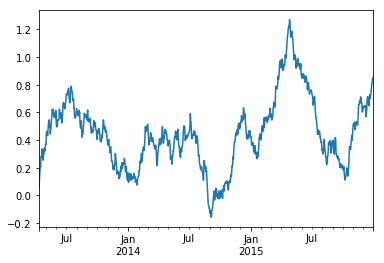

In [31]:
# visualize the series
rolling.plot();

In [32]:
# calculate mean and std by year
group_key = lambda x: x.year
groups = rolling.groupby(group_key)
groups.agg([np.mean, np.std])

          mean       std
2013  0.454233  0.171988
2014  0.286502  0.182040
2015  0.599447  0.275786

In [33]:
# normalize to the z-score
z_score = lambda x: (x - x.mean()) / x.std()
normed = rolling.groupby(group_key).transform(z_score)
normed.groupby(group_key).agg([np.mean, np.std])

              mean  std
2013 -3.172066e-17  1.0
2014 -1.881296e-15  1.0
2015 -1.492261e-15  1.0

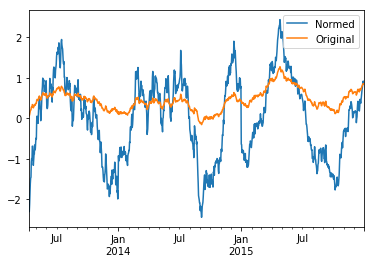

In [34]:
# plot original vs normalize
compared = pd.DataFrame({ 'Original': rolling,
                          'Normed': normed })
compared.plot();

# Filtering groups

In [35]:
# data for our examples
df = pd.DataFrame({'Label': list('AABCCC'),
                   'Values': [1, 2, 3, 4, np.nan, 8]})
df

  Label  Values
0     A     1.0
1     A     2.0
2     B     3.0
3     C     4.0
4     C     NaN
5     C     8.0

In [36]:
# drop groups with one or fewer non-NaN values
f = lambda x: x.Values.count() > 1
df.groupby('Label').filter(f)

  Label  Values
0     A     1.0
1     A     2.0
3     C     4.0
4     C     NaN
5     C     8.0

In [37]:
# drop any groups with NaN values
f = lambda x: x.Values.isnull().sum() == 0
df.groupby('Label').filter(f)

  Label  Values
0     A     1.0
1     A     2.0
2     B     3.0

In [38]:
# select groups with a mean of 2.0 or greater 
grouped = df.groupby('Label')
group_mean = grouped.mean().mean()
f = lambda x: abs(x.Values.mean() - group_mean) > 2.0
df.groupby('Label').filter(f)

  Label  Values
3     C     4.0
4     C     NaN
5     C     8.0

# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# The datetime, day, and time objects

In [2]:
# datetime object for Dec 15 2014
datetime(2014, 12, 15)

datetime.datetime(2014, 12, 15, 0, 0)

In [3]:
# specific date and also with a time of 5:30 pm
datetime(2014, 12, 15, 17, 30)

datetime.datetime(2014, 12, 15, 17, 30)

In [4]:
# get the local "now" (date and time)
# can take a timezone, but that's not demonstrated here
datetime.now()

datetime.datetime(2017, 6, 29, 12, 32, 22, 421827)

In [5]:
# a date without time can be represented
# by creating a date using a datetime object
datetime.date(datetime(2014, 12, 15))

datetime.date(2014, 12, 15)

In [6]:
# get just the current date
datetime.now().date()

datetime.date(2017, 6, 29)

In [7]:
# get just a time from a datetime
datetime.time(datetime(2014, 12, 15, 17, 30))

datetime.time(17, 30)

In [8]:
# get the current local time
datetime.now().time()

datetime.time(12, 32, 22, 457375)

# Timestamp objects

In [9]:
# a timestamp representing a specific date
pd.Timestamp('2014-12-15')

Timestamp('2014-12-15 00:00:00')

In [10]:
# a timestamp with both date and time
pd.Timestamp('2014-12-15 17:30')

Timestamp('2014-12-15 17:30:00')

In [11]:
# timestamp with just a time
# which adds in the current local date
pd.Timestamp('17:30')

Timestamp('2017-06-29 17:30:00')

In [12]:
# get the current date and time (now)
pd.Timestamp("now")

Timestamp('2017-06-29 12:32:22.490917')

# Timedelta

In [13]:
# what is one day from 2014-11-30?
today = datetime(2014, 11, 30)
tomorrow = today + pd.Timedelta(days=1)
tomorrow

datetime.datetime(2014, 12, 1, 0, 0)

In [14]:
# how many days between these two dates?
date1 = datetime(2014, 12, 2)
date2 = datetime(2014, 11, 28)
date1 - date2

datetime.timedelta(4)

# The DatetimeIndex

In [15]:
# create a very simple time-series with two index labels
# and random values
dates = [datetime(2014, 8, 1), datetime(2014, 8, 2)]
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01    0.123357
2014-08-02   -0.979243
dtype: float64

In [16]:
# what is the type of the index?
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [17]:
# and we can see it is a collection of timestamps
type(ts.index[0])

pandas._libs.tslib.Timestamp

In [18]:
# create from just a list of dates as strings!
np.random.seed(123456)
dates = ['2014-08-01', '2014-08-02']
ts = pd.Series(np.random.randn(2), dates)
ts

2014-08-01    0.469112
2014-08-02   -0.282863
dtype: float64

In [19]:
# convert a sequence of objects to a DatetimeIndex
dti = pd.to_datetime(['Aug 1, 2014', 
                      '2014-08-02', 
                      '2014.8.3', 
                      None])
for l in dti: print (l)

2014-08-01 00:00:00
2014-08-02 00:00:00
2014-08-03 00:00:00
NaT


In [20]:
# this is a list of objects, not timestamps...
# Throws an error in 0.20.1
# pd.to_datetime(['Aug 1, 2014', 'foo'])

In [21]:
# force the conversion, NaT for items that dont work
pd.to_datetime(['Aug 1, 2014', 'foo'], errors="coerce")

DatetimeIndex(['2014-08-01', 'NaT'], dtype='datetime64[ns]', freq=None)

In [22]:
# create a range of dates starting at a specific date
# and for a specific number of days, creating a Series
np.random.seed(123456)
periods = pd.date_range('8/1/2014', periods=10)
date_series = pd.Series(np.random.randn(10), index=periods)
date_series

2014-08-01    0.469112
2014-08-02   -0.282863
2014-08-03   -1.509059
2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
2014-08-08   -1.044236
2014-08-09   -0.861849
2014-08-10   -2.104569
Freq: D, dtype: float64

In [23]:
# slice by location
subset = date_series[3:7]
subset

2014-08-04   -1.135632
2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [24]:
# a Series to demonstrate alignment
s2 = pd.Series([10, 100, 1000, 10000], subset.index)
s2

2014-08-04       10
2014-08-05      100
2014-08-06     1000
2014-08-07    10000
Freq: D, dtype: int64

In [25]:
# demonstrate alignment by date on a subset of items
date_series + s2

2014-08-01             NaN
2014-08-02             NaN
2014-08-03             NaN
2014-08-04        8.864368
2014-08-05      101.212112
2014-08-06      999.826785
2014-08-07    10000.119209
2014-08-08             NaN
2014-08-09             NaN
2014-08-10             NaN
Freq: D, dtype: float64

In [26]:
# lookup item by a string representing a date
date_series['2014-08-05']

1.2121120250208506

In [27]:
# slice between two dates specified by string representing dates
date_series['2014-08-05':'2014-08-07']

2014-08-05    1.212112
2014-08-06   -0.173215
2014-08-07    0.119209
Freq: D, dtype: float64

In [28]:
# a two year range of daily data in a Series
# only select those in 2013
s3 = pd.Series(0, pd.date_range('2013-01-01', '2014-12-31'))
s3['2013']

2013-01-01    0
2013-01-02    0
2013-01-03    0
2013-01-04    0
2013-01-05    0
             ..
2013-12-27    0
2013-12-28    0
2013-12-29    0
2013-12-30    0
2013-12-31    0
Freq: D, Length: 365, dtype: int64

In [29]:
# 31 items for May 2014
s3['2014-05'] 

2014-05-01    0
2014-05-02    0
2014-05-03    0
2014-05-04    0
2014-05-05    0
             ..
2014-05-27    0
2014-05-28    0
2014-05-29    0
2014-05-30    0
2014-05-31    0
Freq: D, Length: 31, dtype: int64

In [30]:
# items between two months
s3['2014-08':'2014-09']

2014-08-01    0
2014-08-02    0
2014-08-03    0
2014-08-04    0
2014-08-05    0
             ..
2014-09-26    0
2014-09-27    0
2014-09-28    0
2014-09-29    0
2014-09-30    0
Freq: D, Length: 61, dtype: int64

# Creating time-series data with specific frequencies

In [31]:
# generate a Series at one minute intervals
np.random.seed(123456)
bymin = pd.Series(np.random.randn(24*60*90), 
                  pd.date_range('2014-08-01', 
                                '2014-10-29 23:59',
                                freq='T'))
bymin[:5]

2014-08-01 00:00:00    0.469112
2014-08-01 00:01:00   -0.282863
2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
Freq: T, dtype: float64

In [32]:
# slice down to the minute
bymin['2014-08-01 00:02':'2014-08-01 00:07']

2014-08-01 00:02:00   -1.509059
2014-08-01 00:03:00   -1.135632
2014-08-01 00:04:00    1.212112
2014-08-01 00:05:00   -0.173215
2014-08-01 00:06:00    0.119209
2014-08-01 00:07:00   -1.044236
Freq: T, dtype: float64

In [33]:
# generate a series based upon business days
days = pd.date_range('2014-08-29', '2014-09-05', freq='B')
days

DatetimeIndex(['2014-08-29', '2014-09-01', '2014-09-02',
               '2014-09-03', '2014-09-04', '2014-09-05'],
              dtype='datetime64[ns]', freq='B')

In [34]:
# periods will use the frequency as the increment
pd.date_range('2014-08-01 12:10:01', freq='S', periods=5)

DatetimeIndex(['2014-08-01 12:10:01',
               '2014-08-01 12:10:02',
               '2014-08-01 12:10:03',
               '2014-08-01 12:10:04',
               '2014-08-01 12:10:05'],
              dtype='datetime64[ns]', freq='S')

# Date offsets

In [35]:
# get all business days between and inclusive of these two dates
dti = pd.date_range('2014-08-29', '2014-09-05', freq='B')
dti.values

array(['2014-08-29T00:00:00.000000000', '2014-09-01T00:00:00.000000000',
       '2014-09-02T00:00:00.000000000', '2014-09-03T00:00:00.000000000',
       '2014-09-04T00:00:00.000000000', '2014-09-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [36]:
# check the frequency is BusinessDay
dti.freq

<BusinessDay>

In [37]:
# calculate a one day offset from 2014-8-29
d = datetime(2014, 8, 29)
do = pd.DateOffset(days = 1) 
d + do

Timestamp('2014-08-30 00:00:00')

In [38]:
# import the data offset types
from pandas.tseries.offsets import *
# calculate one business day from 2014-8-31
d + BusinessDay()

Timestamp('2014-09-01 00:00:00')

In [39]:
# determine 2 business days from 2014-8-29
d + 2 * BusinessDay()

Timestamp('2014-09-02 00:00:00')

In [40]:
# what is the next business month end
# from a specific date?
d + BMonthEnd()

Timestamp('2014-09-30 00:00:00')

In [41]:
# calculate the next month end by
# rolling forward from a specific date
BMonthEnd().rollforward(datetime(2014, 9, 15))

Timestamp('2014-09-30 00:00:00')

In [42]:
# calculate the date of the Tuesday previous
# to a specified date 
d - Week(weekday = 1)

Timestamp('2014-08-26 00:00:00')

# Anchored Offsets

In [43]:
# calculate all Wednesdays between 2014-06-01
# and 2014-08-31
wednesdays = pd.date_range('2014-06-01', 
                           '2014-07-31', freq="W-WED")
wednesdays.values

array(['2014-06-04T00:00:00.000000000', '2014-06-11T00:00:00.000000000',
       '2014-06-18T00:00:00.000000000', '2014-06-25T00:00:00.000000000',
       '2014-07-02T00:00:00.000000000', '2014-07-09T00:00:00.000000000',
       '2014-07-16T00:00:00.000000000', '2014-07-23T00:00:00.000000000',
       '2014-07-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [44]:
# what are all of the business quarterly end
# dates in 2014?
qends = pd.date_range('2014-01-01', '2014-12-31', 
                      freq='BQS-JUN')
qends.values

array(['2014-03-03T00:00:00.000000000', '2014-06-02T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

# The Period object

In [45]:
# create a period representing a month of time
# starting in August 2014
aug2014 = pd.Period('2014-08', freq='M')
aug2014

Period('2014-08', 'M')

In [46]:
# examine the start and end times of this period
aug2014.start_time, aug2014.end_time

(Timestamp('2014-08-01 00:00:00'), Timestamp('2014-08-31 23:59:59.999999999'))

In [47]:
# calculate the period that is one frequency
# unit of the aug2014 period further along in time
# This happens to be September 2014
sep2014 = aug2014 + 1
sep2014

Period('2014-09', 'M')

In [48]:
sep2014.start_time, sep2014.end_time

(Timestamp('2014-09-01 00:00:00'), Timestamp('2014-09-30 23:59:59.999999999'))

# The PeriodIndex

In [49]:
# create a period index representing all monthly boundaries in 2013
mp2013 = pd.period_range('1/1/2013', '12/31/2013', freq='M')
mp2013

PeriodIndex(['2013-01', '2013-02', '2013-03', '2013-04',
             '2013-05', '2013-06', '2013-07', '2013-08',
             '2013-09', '2013-10', '2013-11', '2013-12'],
            dtype='period[M]', freq='M')

In [50]:
# loop through all period objects in the index
# printing start and end time for each
for p in mp2013: 
    print ("{0} {1}".format(p.start_time, p.end_time))

2013-01-01 00:00:00 2013-01-31 23:59:59.999999999
2013-02-01 00:00:00 2013-02-28 23:59:59.999999999
2013-03-01 00:00:00 2013-03-31 23:59:59.999999999
2013-04-01 00:00:00 2013-04-30 23:59:59.999999999
2013-05-01 00:00:00 2013-05-31 23:59:59.999999999
2013-06-01 00:00:00 2013-06-30 23:59:59.999999999
2013-07-01 00:00:00 2013-07-31 23:59:59.999999999
2013-08-01 00:00:00 2013-08-31 23:59:59.999999999
2013-09-01 00:00:00 2013-09-30 23:59:59.999999999
2013-10-01 00:00:00 2013-10-31 23:59:59.999999999
2013-11-01 00:00:00 2013-11-30 23:59:59.999999999
2013-12-01 00:00:00 2013-12-31 23:59:59.999999999


In [51]:
# create a Series with a PeriodIndex
np.random.seed(123456)
ps = pd.Series(np.random.randn(12), mp2013)
ps[:5]

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
Freq: M, dtype: float64

In [52]:
# create a Series with a PeriodIndex and which
# represents all calendar month periods in 2013 and 2014
np.random.seed(123456)
ps = pd.Series(np.random.randn(24), 
               pd.period_range('1/1/2013', 
                               '12/31/2014', freq='M'))
ps

2013-01    0.469112
2013-02   -0.282863
2013-03   -1.509059
2013-04   -1.135632
2013-05    1.212112
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, Length: 24, dtype: float64

In [53]:
# get value for period represented with 2014-06
ps['2014-06']

0.567020349793672

In [54]:
# get values for all periods in 2014
ps['2014']

2014-01    0.721555
2014-02   -0.706771
2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
             ...   
2014-08   -1.087401
2014-09   -0.673690
2014-10    0.113648
2014-11   -1.478427
2014-12    0.524988
Freq: M, Length: 12, dtype: float64

In [55]:
# all values between (and including) March and June 2014
ps['2014-03':'2014-06']

2014-03   -1.039575
2014-04    0.271860
2014-05   -0.424972
2014-06    0.567020
Freq: M, dtype: float64

# Handling holidays using calendars

In [56]:
# demonstrate using the US federal holiday calendar
# first need to import it
from pandas.tseries.holiday import *
# create it and show what it considers holidays
cal = USFederalHolidayCalendar()
for d in cal.holidays(start='2014-01-01', end='2014-12-31'):
    print (d)

2014-01-01 00:00:00
2014-01-20 00:00:00
2014-02-17 00:00:00
2014-05-26 00:00:00
2014-07-04 00:00:00
2014-09-01 00:00:00
2014-10-13 00:00:00
2014-11-11 00:00:00
2014-11-27 00:00:00
2014-12-25 00:00:00


In [57]:
# create CustomBusinessDay object based on the federal calendar
cbd = CustomBusinessDay(holidays=cal.holidays())

# now calc next business day from 2014-8-29
datetime(2014, 8, 29) + cbd

Timestamp('2014-09-02 00:00:00')

# Normalizing timestamps using time zones

In [58]:
# get the current local time and demonstrate there is no
# timezone info by default
now = pd.Timestamp('now')
now, now.tz is None

(Timestamp('2017-06-29 12:32:23.256410'), True)

In [59]:
# default DatetimeIndex and its Timestamps do not have
# time zone information
rng = pd.date_range('3/6/2012 00:00', periods=15, freq='D')
rng.tz is None, rng[0].tz is None

(True, True)

In [60]:
# import common timezones from pytz
from pytz import common_timezones
# report the first 5
common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [61]:
# get now, and now localized to UTC
now = Timestamp("now")
local_now = now.tz_localize('UTC')
now, local_now

(Timestamp('2017-06-29 12:32:23.407610'),
 Timestamp('2017-06-29 12:32:23.407610+0000', tz='UTC'))

In [62]:
# localize a timestamp to US/Mountain time zone
tstamp = Timestamp('2014-08-01 12:00:00', tz='US/Mountain')
tstamp

Timestamp('2014-08-01 12:00:00-0600', tz='US/Mountain')

In [63]:
# create a DatetimeIndex using a timezone
rng = pd.date_range('3/6/2012 00:00:00', 
                    periods=10, freq='D', tz='US/Mountain')
rng.tz, rng[0].tz

(<DstTzInfo 'US/Mountain' LMT-1 day, 17:00:00 STD>,
 <DstTzInfo 'US/Mountain' MST-1 day, 17:00:00 STD>)

In [64]:
# show use of timezone objects
# need to reference pytz
import pytz
# create an object for two different timezones
mountain_tz = pytz.timezone("US/Mountain")
eastern_tz = pytz.timezone("US/Eastern")
# apply each to 'now'
mountain_tz.localize(now), eastern_tz.localize(now)

(Timestamp('2017-06-29 12:32:23.407610-0600', tz='US/Mountain'),
 Timestamp('2017-06-29 12:32:23.407610-0400', tz='US/Eastern'))

In [65]:
# create two Series, same start, same periods, same frequencies,
# each with a different timezone
s_mountain = Series(np.arange(0, 5),
                    index=pd.date_range('2014-08-01', 
                                        periods=5, freq="H", 
                                        tz='US/Mountain'))
s_eastern = Series(np.arange(0, 5), 
                   index=pd.date_range('2014-08-01', 
                                       periods=5, freq="H", 
                                       tz='US/Eastern'))
s_mountain

2014-08-01 00:00:00-06:00    0
2014-08-01 01:00:00-06:00    1
2014-08-01 02:00:00-06:00    2
2014-08-01 03:00:00-06:00    3
2014-08-01 04:00:00-06:00    4
Freq: H, dtype: int64

In [66]:
s_eastern

2014-08-01 00:00:00-04:00    0
2014-08-01 01:00:00-04:00    1
2014-08-01 02:00:00-04:00    2
2014-08-01 03:00:00-04:00    3
2014-08-01 04:00:00-04:00    4
Freq: H, dtype: int64

In [67]:
# add the two Series. This only results in three items being aligned
s_eastern + s_mountain

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: H, dtype: float64

In [68]:
# convert s1 from US/Eastern to US/Pacific
s_pacific = s_eastern.tz_convert("US/Pacific")
s_pacific

2014-07-31 21:00:00-07:00    0
2014-07-31 22:00:00-07:00    1
2014-07-31 23:00:00-07:00    2
2014-08-01 00:00:00-07:00    3
2014-08-01 01:00:00-07:00    4
Freq: H, dtype: int64

In [69]:
# this will be the same result as s_eastern + s_mountain
# as the timezones still get aligned to be the same
s_mountain + s_pacific

2014-08-01 04:00:00+00:00    NaN
2014-08-01 05:00:00+00:00    NaN
2014-08-01 06:00:00+00:00    2.0
2014-08-01 07:00:00+00:00    4.0
2014-08-01 08:00:00+00:00    6.0
2014-08-01 09:00:00+00:00    NaN
2014-08-01 10:00:00+00:00    NaN
Freq: H, dtype: float64

# Shifting and lagging 

In [70]:
# create a Series to work with
np.random.seed(123456)
ts = Series([1, 2, 2.5, 1.5, 0.5],
            pd.date_range('2014-08-01', periods=5))
ts

2014-08-01    1.0
2014-08-02    2.0
2014-08-03    2.5
2014-08-04    1.5
2014-08-05    0.5
Freq: D, dtype: float64

In [71]:
# shift forward one day
ts.shift(1)

2014-08-01    NaN
2014-08-02    1.0
2014-08-03    2.0
2014-08-04    2.5
2014-08-05    1.5
Freq: D, dtype: float64

In [72]:
# lag two days
ts.shift(-2)

2014-08-01    2.5
2014-08-02    1.5
2014-08-03    0.5
2014-08-04    NaN
2014-08-05    NaN
Freq: D, dtype: float64

In [73]:
# calculate daily percentage change
ts / ts.shift(1)

2014-08-01         NaN
2014-08-02    2.000000
2014-08-03    1.250000
2014-08-04    0.600000
2014-08-05    0.333333
Freq: D, dtype: float64

In [74]:
# shift forward one business day
ts.shift(1, freq="B")

2014-08-04    1.0
2014-08-04    2.0
2014-08-04    2.5
2014-08-05    1.5
2014-08-06    0.5
dtype: float64

In [75]:
# shift forward five hours
ts.tshift(5, freq="H")

2014-08-01 05:00:00    1.0
2014-08-02 05:00:00    2.0
2014-08-03 05:00:00    2.5
2014-08-04 05:00:00    1.5
2014-08-05 05:00:00    0.5
Freq: D, dtype: float64

In [76]:
# shift using a DateOffset
ts.shift(1, DateOffset(minutes=0.5))

2014-08-01 00:00:30    1.0
2014-08-02 00:00:30    2.0
2014-08-03 00:00:30    2.5
2014-08-04 00:00:30    1.5
2014-08-05 00:00:30    0.5
Freq: D, dtype: float64

In [77]:
# shift just the index values
ts.tshift(-1, freq='H')

2014-07-31 23:00:00    1.0
2014-08-01 23:00:00    2.0
2014-08-02 23:00:00    2.5
2014-08-03 23:00:00    1.5
2014-08-04 23:00:00    0.5
Freq: D, dtype: float64

# Frequency Conversion

In [78]:
# create a Series of incremental values
# index by hour through all of August 2014
periods = 31 * 24
hourly = Series(np.arange(0, periods),
               pd.date_range('08-01-2014', freq="2H", 
                             periods = periods))
hourly[:5]

2014-08-01 00:00:00    0
2014-08-01 02:00:00    1
2014-08-01 04:00:00    2
2014-08-01 06:00:00    3
2014-08-01 08:00:00    4
Freq: 2H, dtype: int64

In [79]:
# convert to daily frequency
# many items will be dropped due to alignment
daily = hourly.asfreq('D')
daily[:5]

2014-08-01     0
2014-08-02    12
2014-08-03    24
2014-08-04    36
2014-08-05    48
Freq: D, dtype: int64

In [80]:
# convert back to hourly.  Results in many NaNs
# as the new index has many labels that do not
# align from the source
daily.asfreq('H')

2014-08-01 00:00:00      0.0
2014-08-01 01:00:00      NaN
2014-08-01 02:00:00      NaN
2014-08-01 03:00:00      NaN
2014-08-01 04:00:00      NaN
                       ...  
2014-09-30 20:00:00      NaN
2014-09-30 21:00:00      NaN
2014-09-30 22:00:00      NaN
2014-09-30 23:00:00      NaN
2014-10-01 00:00:00    732.0
Freq: H, Length: 1465, dtype: float64

In [81]:
# forward fill values
daily.asfreq('H', method='ffill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00      0
2014-08-01 02:00:00      0
2014-08-01 03:00:00      0
2014-08-01 04:00:00      0
                      ... 
2014-09-30 20:00:00    720
2014-09-30 21:00:00    720
2014-09-30 22:00:00    720
2014-09-30 23:00:00    720
2014-10-01 00:00:00    732
Freq: H, Length: 1465, dtype: int64

In [82]:
daily.asfreq('H', method='bfill')

2014-08-01 00:00:00      0
2014-08-01 01:00:00     12
2014-08-01 02:00:00     12
2014-08-01 03:00:00     12
2014-08-01 04:00:00     12
                      ... 
2014-09-30 20:00:00    732
2014-09-30 21:00:00    732
2014-09-30 22:00:00    732
2014-09-30 23:00:00    732
2014-10-01 00:00:00    732
Freq: H, Length: 1465, dtype: int64

# Up and down resampling

In [83]:
# calculate a random walk five days long at one second intervals
# this many items will be needed
count = 24 * 60 * 60 * 5
# create a series of values
np.random.seed(123456)
values = np.random.randn(count)
ws = pd.Series(values)
# calculate the walk
walk = ws.cumsum()
# patch the index
walk.index = pd.date_range('2014-08-01', periods=count, freq="S")
walk

2014-08-01 00:00:00      0.469112
2014-08-01 00:00:01      0.186249
2014-08-01 00:00:02     -1.322810
2014-08-01 00:00:03     -2.458442
2014-08-01 00:00:04     -1.246330
                          ...    
2014-08-05 23:59:55    456.529763
2014-08-05 23:59:56    456.052131
2014-08-05 23:59:57    455.202981
2014-08-05 23:59:58    454.947362
2014-08-05 23:59:59    456.191430
Freq: S, Length: 432000, dtype: float64

In [84]:
# resample to minute intervals
walk.resample("1Min").mean()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:01:00    -15.239213
2014-08-01 00:02:00     -9.179315
2014-08-01 00:03:00     -8.338307
2014-08-01 00:04:00     -8.129554
                          ...    
2014-08-05 23:55:00    453.773467
2014-08-05 23:56:00    450.857039
2014-08-05 23:57:00    450.078149
2014-08-05 23:58:00    444.637806
2014-08-05 23:59:00    453.837417
Freq: T, Length: 7200, dtype: float64

In [85]:
# calculate the mean of the first minute of the walk
walk['2014-08-01 00:00'].mean()

-8.718220052832644

In [86]:
# use a right close
walk.resample("1Min", closed='right').mean()

2014-07-31 23:59:00      0.469112
2014-08-01 00:00:00     -8.907477
2014-08-01 00:01:00    -15.280685
2014-08-01 00:02:00     -9.083865
2014-08-01 00:03:00     -8.285550
                          ...    
2014-08-05 23:55:00    453.726168
2014-08-05 23:56:00    450.849039
2014-08-05 23:57:00    450.039159
2014-08-05 23:58:00    444.631719
2014-08-05 23:59:00    453.955377
Freq: T, Length: 7201, dtype: float64

In [87]:
# resample to 1 minute
walk.resample("1Min").first()

2014-08-01 00:00:00      0.469112
2014-08-01 00:01:00    -10.886314
2014-08-01 00:02:00    -13.374656
2014-08-01 00:03:00     -7.647693
2014-08-01 00:04:00     -4.482292
                          ...    
2014-08-05 23:55:00    452.900335
2014-08-05 23:56:00    450.062374
2014-08-05 23:57:00    449.582419
2014-08-05 23:58:00    447.243014
2014-08-05 23:59:00    446.877810
Freq: T, Length: 7200, dtype: float64

In [88]:
# resample to 1 minute intervales, then back to 1 sec
bymin = walk.resample("1Min").mean()
bymin.resample('S').mean()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01           NaN
2014-08-01 00:00:02           NaN
2014-08-01 00:00:03           NaN
2014-08-01 00:00:04           NaN
                          ...    
2014-08-05 23:58:56           NaN
2014-08-05 23:58:57           NaN
2014-08-05 23:58:58           NaN
2014-08-05 23:58:59           NaN
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [89]:
# resample to 1 second intervales using forward fill
bymin.resample("S").bfill()

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01    -15.239213
2014-08-01 00:00:02    -15.239213
2014-08-01 00:00:03    -15.239213
2014-08-01 00:00:04    -15.239213
                          ...    
2014-08-05 23:58:56    453.837417
2014-08-05 23:58:57    453.837417
2014-08-05 23:58:58    453.837417
2014-08-05 23:58:59    453.837417
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [90]:
# demonstate interoplating the NaN values
interpolated = bymin.resample("S").interpolate()
interpolated

2014-08-01 00:00:00     -8.718220
2014-08-01 00:00:01     -8.826903
2014-08-01 00:00:02     -8.935586
2014-08-01 00:00:03     -9.044270
2014-08-01 00:00:04     -9.152953
                          ...    
2014-08-05 23:58:56    453.224110
2014-08-05 23:58:57    453.377437
2014-08-05 23:58:58    453.530764
2014-08-05 23:58:59    453.684090
2014-08-05 23:59:00    453.837417
Freq: S, Length: 431941, dtype: float64

In [91]:
# show ohlc resampling
ohlc = walk.resample("H").ohlc()
ohlc

                           open        high         low  \
2014-08-01 00:00:00    0.469112    0.469112  -67.873166   
2014-08-01 01:00:00   -3.374321   23.793007  -56.585154   
2014-08-01 02:00:00  -54.276885    5.232441  -87.809456   
2014-08-01 03:00:00    0.260576   17.124638  -65.820652   
2014-08-01 04:00:00  -38.436581    3.537231 -109.805294   
...                         ...         ...         ...   
2014-08-05 19:00:00  437.652077  550.408942  430.549178   
2014-08-05 20:00:00  496.539759  510.371745  456.365565   
2014-08-05 21:00:00  476.025498  506.952877  425.472410   
2014-08-05 22:00:00  497.941355  506.599652  411.119919   
2014-08-05 23:00:00  443.017962  489.083657  426.062444   

                          close  
2014-08-01 00:00:00   -2.922520  
2014-08-01 01:00:00  -55.101543  
2014-08-01 02:00:00    1.913276  
2014-08-01 03:00:00  -38.530620  
2014-08-01 04:00:00  -61.014553  
...                         ...  
2014-08-05 19:00:00  494.471788  
2014-08-05 20:00:00

# Time series moving window operations

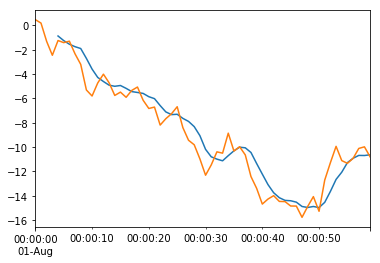

In [92]:
# get data from only the following minute
first_minute = walk['2014-08-01 00:00']
# calculate a rol1ing mean window of 5 periods
means = first_minute.rolling(window=5, center=False).mean()
# plot means vs original data
means.plot()
first_minute.plot();

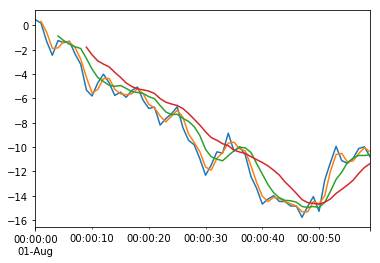

In [93]:
# demonstrate the difference between 2, 5 and
# 10 interval rolling windows
h1w = walk['2014-08-01 00:00']
means2 = h1w.rolling(window=2, center=False).mean()
means5 = h1w.rolling(window=5, center=False).mean()
means10 = h1w.rolling(window=10, center=False).mean()
h1w.plot()
means2.plot()
means5.plot()
means10.plot();

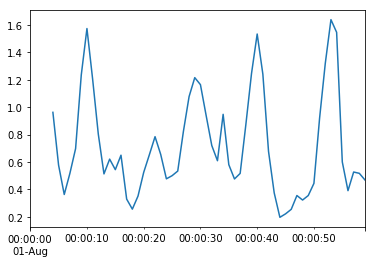

In [94]:
# calculate mean average deviation with window of 5 intervals
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
means = h1w.rolling(window=5, center=False).apply(mean_abs_dev)
means.plot();

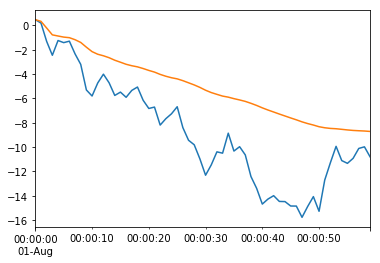

In [95]:
# calculate an expanding rolling mean
h1w.plot()
expanding = h1w.expanding(min_periods=1).mean()
expanding.plot();

# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# a common seed value for random number generation
seedval = 111111

# Creating time-series charts 

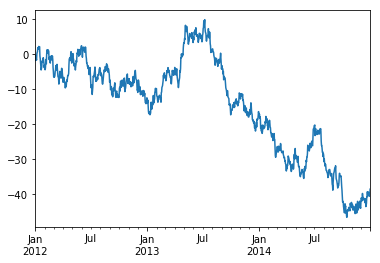

In [2]:
# generate a random walk time-series
np.random.seed(seedval)
s = pd.Series(np.random.randn(1096),
              index=pd.date_range('2012-01-01', 
                                  '2014-12-31'))
walk_ts = s.cumsum()
# this plots the walk - just that easy :)
walk_ts.plot();

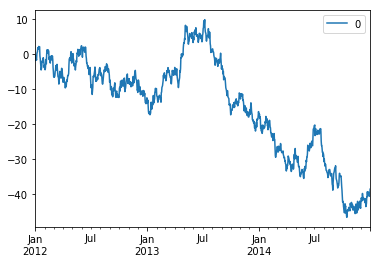

In [3]:
# a DataFrame with a single column will produce
# the same plot as plotting the Series it is created from
walk_df = pd.DataFrame(walk_ts)
walk_df.plot();

In [4]:
# generate two random walks, one in each of 
# two columns in a DataFrame
np.random.seed(seedval)
df = pd.DataFrame(np.random.randn(1096, 2), 
                  index=walk_ts.index, columns=list('AB'))
walk_df = df.cumsum()
walk_df.head()

                   A         B
2012-01-01 -1.878324  1.362367
2012-01-02 -2.804186  1.427261
2012-01-03 -3.241758  3.165368
2012-01-04 -2.750550  3.332685
2012-01-05 -1.620667  2.930017

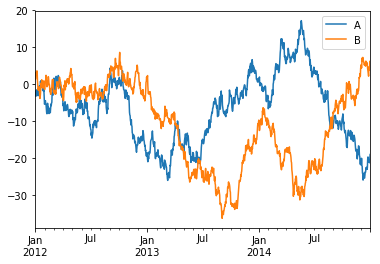

In [5]:
# plot the DataFrame, which will plot a line
# for each column, with a legend
walk_df.plot();

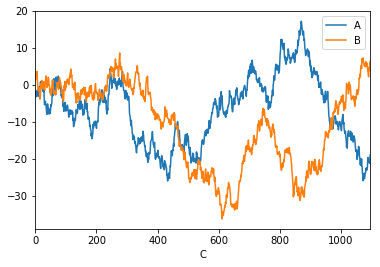

In [6]:
# copy the walk
df2 = walk_df.copy()
# add a column C which is 0 .. 1096
df2['C'] = pd.Series(np.arange(0, len(df2)), index=df2.index)
# instead of dates on the x-axis, use the 'C' column,
# which will label the axis with 0..1000
df2.plot(x='C', y=['A', 'B']);

# Adding a title and changing axes labels

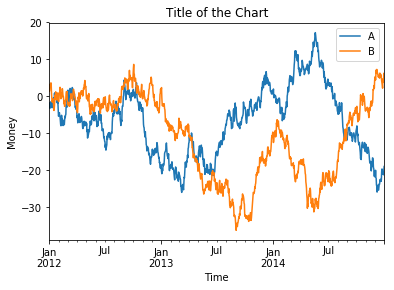

In [7]:
# create a time-series chart with a title and specific 
# x and y axis labels

# title is set in the .plot() method as a parameter
walk_df.plot(title='Title of the Chart')
# explicitly set the x and y axes labels after the .plot()
plt.xlabel('Time')
plt.ylabel('Money');

# Specifying legend content and position

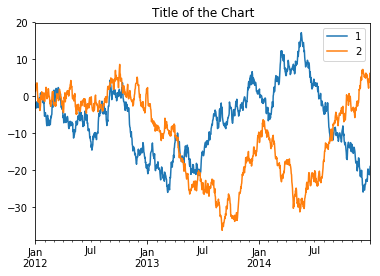

In [8]:
# change the legend items to be different 
# from the names of the columns in the DataFrame
ax = walk_df.plot(title='Title of the Chart')
# this sets the legend labels
ax.legend(['1', '2']);

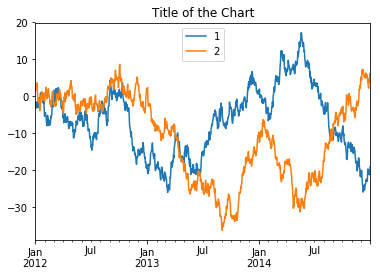

In [9]:
# change the position of the legend
ax = walk_df.plot(title='Title of the Chart')
# put the legend in the upper center of the chart
ax.legend(['1', '2'], loc='upper center');

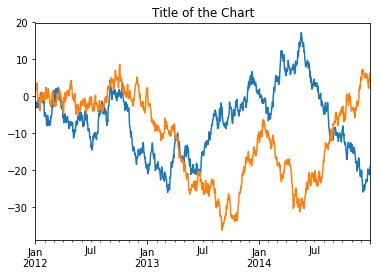

In [10]:
# omit the legend by using legend=False
walk_df.plot(title='Title of the Chart', legend=False);

# Specifying line colors, styles, thickness and markers

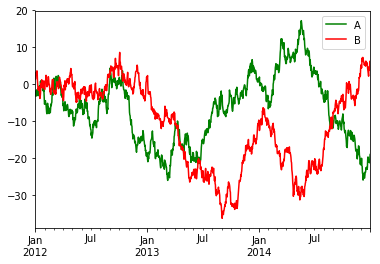

In [11]:
# change the line colors on the plot
# use character code for the first line, 
# hex RGB for the second
walk_df.plot(style=['g', '#FF0000']);

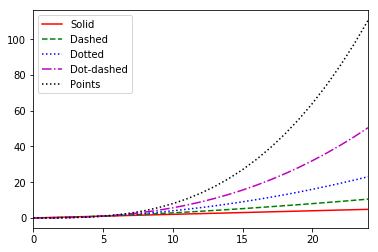

In [12]:
# show off different line styles
t = np.arange(0., 5., 0.2)
legend_labels = ['Solid', 'Dashed', 'Dotted', 
                 'Dot-dashed', 'Points']
line_style = pd.DataFrame({0 : t,
                           1 : t**1.5,
                           2 : t**2.0,
                           3 : t**2.5,
                           4 : t**3.0})
# generate the plot, specifying color and line style for each line
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'])
# set the legend
ax.legend(legend_labels, loc='upper left');

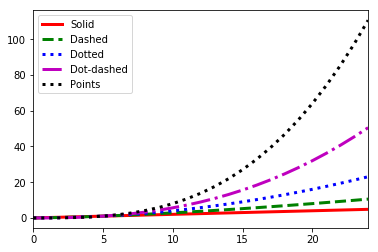

In [13]:
# regenerate the plot, specifying color and line style
# for each line and a line width of 3 for all lines
ax = line_style.plot(style=['r-', 'g--', 'b:', 'm-.', 'k:'], lw=3)
ax.legend(legend_labels, loc='upper left');

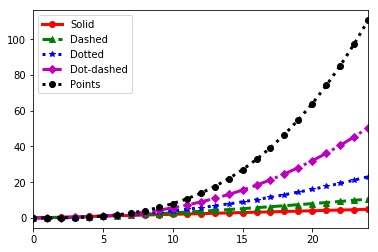

In [14]:
# redraw, adding markers to the lines
ax = line_style.plot(style=['r-o', 'g--^', 'b:*', 
                            'm-.D', 'k:o'], lw=3)
ax.legend(legend_labels, loc='upper left');

# Specifying tick mark locations and tick labels

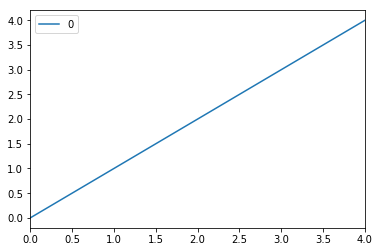

In [15]:
# a simple plot to use to examine ticks
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
ticks, labels = plt.xticks()
ticks
labels[0]

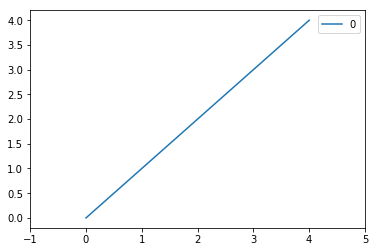

In [16]:
# resize x-axis to (-1, 5), and draw ticks
# only at integer values
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.xticks(np.arange(-1, 6));

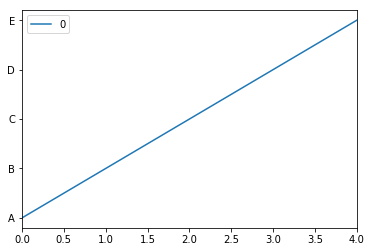

In [17]:
# rename y-axis tick labels to A, B, C, D, and E
ticks_data = pd.DataFrame(np.arange(0,5))
ticks_data.plot()
plt.yticks(np.arange(0, 5), list("ABCDE"));

# Formatting axes tick date labels using formatters

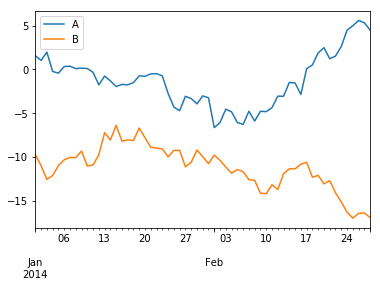

In [18]:
# plot January-February 2014 from the random walk
walk_df.loc['2014-01':'2014-02'].plot();

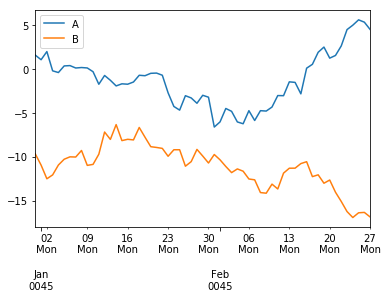

In [19]:
# this import styles helps us type less
from matplotlib.dates import WeekdayLocator, \
DateFormatter, MonthLocator

# plot Jan-Feb 2014
ax = walk_df.loc['2014-01':'2014-02'].plot()

# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter("%d\n%a"))

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'))

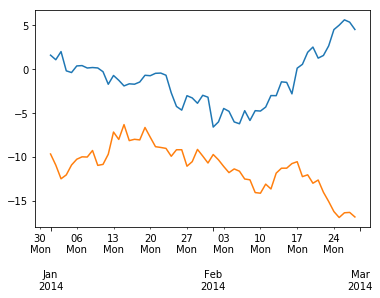

In [20]:
# this gets around the pandas / matplotlib year issue
# need to reference the subset twice, so let's make a variable
walk_subset = walk_df['2014-01':'2014-02']

# this gets the plot so we can use it, we can ignore fig
fig, ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

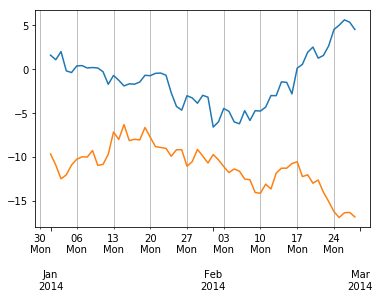

In [21]:
# this gets the plot so we can use it, we can ignore fig
fig, ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

# do the minor labels
weekday_locator = WeekdayLocator(byweekday=(0), interval=1)
ax.xaxis.set_minor_locator(weekday_locator)
ax.xaxis.set_minor_formatter(DateFormatter('%d\n%a'))
ax.xaxis.grid(True, "minor") # turn on minor tick grid lines
ax.xaxis.grid(False, "major") # turn off major tick grid lines

# do the major labels
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('\n\n\n%b\n%Y'));

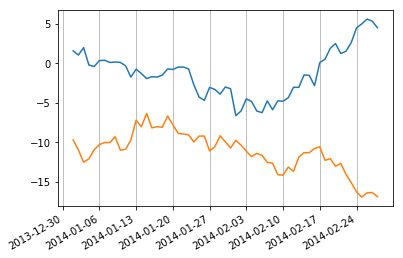

In [22]:
# this gets the plot so we can use it, we can ignore fig
fig, ax = plt.subplots()

# inform matplotlib that we will use the following as dates
# note we need to convert the index to a pydatetime series
ax.plot_date(walk_subset.index.to_pydatetime(), walk_subset, '-')

ax.xaxis.grid(True, "major") # turn off major tick grid lines

# do the major labels
ax.xaxis.set_major_locator(weekday_locator)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'));

# informs to rotate date labels
fig.autofmt_xdate();

# Bar plots

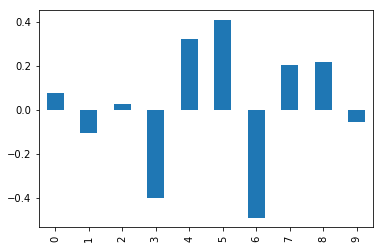

In [23]:
# make a bar plot
# create a small series of 10 random values centered at 0.0
np.random.seed(seedval)
s = pd.Series(np.random.rand(10) - 0.5)
# plot the bar chart
s.plot(kind='bar');

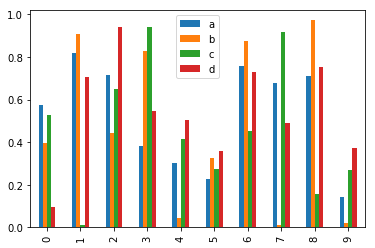

In [24]:
# draw a multiple series bar chart
# generate 4 columns of 10 random values
np.random.seed(seedval)
df2 = pd.DataFrame(np.random.rand(10, 4), 
                   columns=['a', 'b', 'c', 'd'])
# draw the multi-series bar chart
df2.plot(kind='bar');

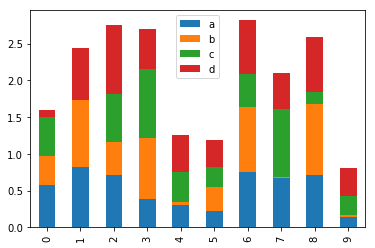

In [25]:
# horizontal stacked bar chart
df2.plot(kind='bar', stacked=True);

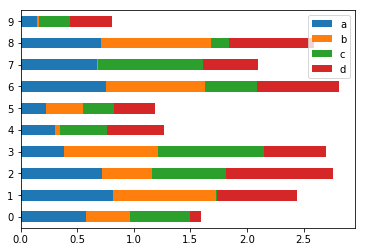

In [26]:
# horizontal stacked bar chart
df2.plot(kind='barh', stacked=True);

# Histograms

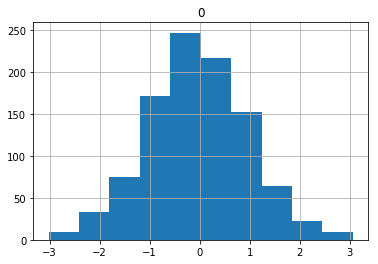

In [27]:
# create a histogram
np.random.seed(seedval)
# 1000 random numbers
dfh = pd.DataFrame(np.random.randn(1000))
# draw the histogram
dfh.hist();

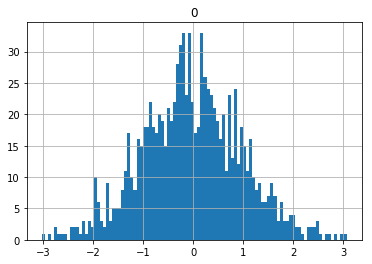

In [28]:
# histogram again, but with more bins
dfh.hist(bins = 100);

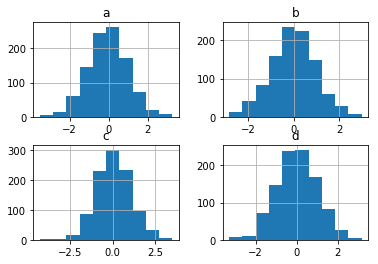

In [29]:
# generate multiple histogram plot
# create data frame with 4 columns of 1000 random values
np.random.seed(seedval)
dfh = pd.DataFrame(np.random.randn(1000, 4), 
                   columns=['a', 'b', 'c', 'd'])
# draw the chart.  There are four columns so pandas draws
# four histograms
dfh.hist();

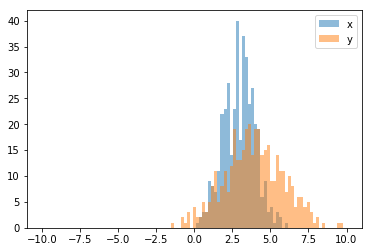

In [30]:
# directly use pyplot to overlay multiple histograms
# generate two distributions, each with a different
# mean and standard deviation
np.random.seed(seedval)
x = [np.random.normal(3,1) for _ in range(400)]
y = [np.random.normal(4,2) for _ in range(400)]

# specify the bins (-10 to 10 with 100 bins)
bins = np.linspace(-10, 10, 100)

# generate plot x using plt.hist, 50% transparent
plt.hist(x, bins, alpha=0.5, label='x')
# generate plot y using plt.hist, 50% transparent
plt.hist(y, bins, alpha=0.5, label='y')
plt.legend(loc='upper right');

# Box and whisker plots

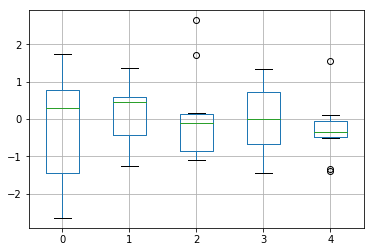

In [31]:
# create a box plot
# generate the series
np.random.seed(seedval)
dfb = pd.DataFrame(np.random.randn(10,5))
# generate the plot
dfb.boxplot(return_type='axes');

# Area plots

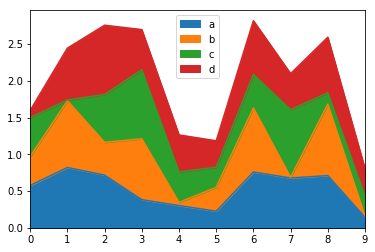

In [32]:
# create a stacked area plot
# generate a 4-column data frame of random data
np.random.seed(seedval)
dfa = pd.DataFrame(np.random.rand(10, 4), 
                   columns=['a', 'b', 'c', 'd'])
# create the area plot
dfa.plot(kind='area');

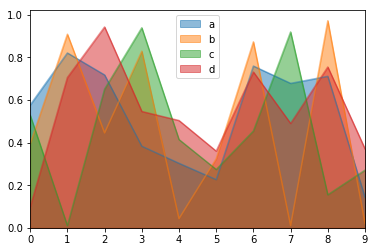

In [33]:
# do not stack the area plot
dfa.plot(kind='area', stacked=False);

# Scatter plots

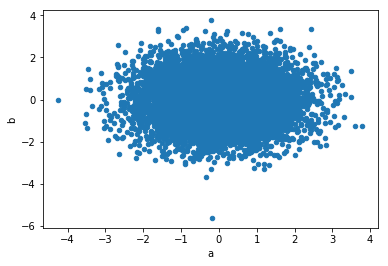

In [34]:
# generate a scatter plot of two series of normally
# distributed random values
# we would expect this to cluster around 0,0
np.random.seed(seedval)
sp_df = pd.DataFrame(np.random.randn(10000, 2), 
                     columns=['a', 'b'])
sp_df.plot(kind='scatter', x='a', y='b');

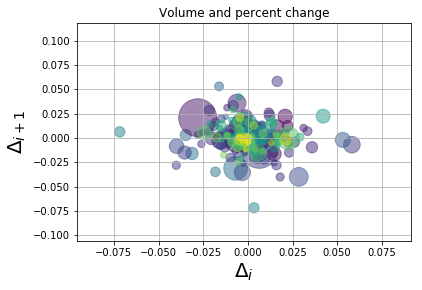

In [35]:
import pandas_datareader as pdr
# get Google stock data from 1/1/2011 to 12/31/2011
start = datetime(2016, 1, 1)
end = datetime(2016, 12, 31)
stock_data = pdr.data.DataReader("MSFT", 'google', start, end)

# % change per day
delta = np.diff(stock_data["Close"])/stock_data["Close"][:-1]

# this calculates size of markers
volume = (15 * stock_data.Volume[:-2] / stock_data.Volume[0])**2
close = 0.003 * stock_data.Close[:-2] / 0.003 * stock_data.Open[:-2]

# generate scatter plot
fig, ax = plt.subplots()
ax.scatter(delta[:-1], delta[1:], c=close, s=volume, alpha=0.5)

# add some labels and style
ax.set_xlabel(r'$\Delta_i$', fontsize=20)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=20)
ax.set_title('Volume and percent change')
ax.grid(True);

# Density plot (kde)

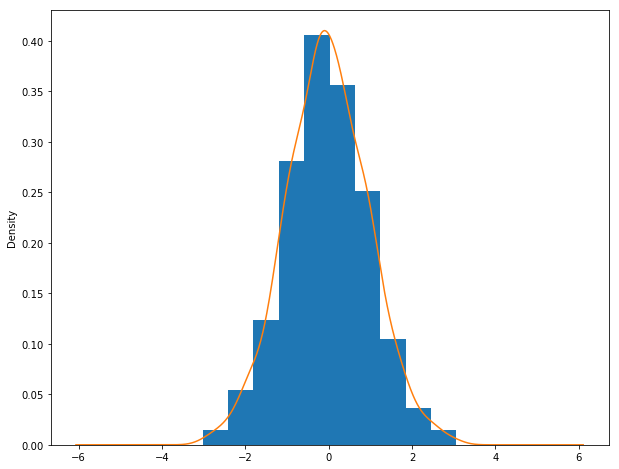

In [36]:
# create a kde densitiy plot
# generate a series of 1000 random numbers
np.random.seed(seedval)
s = pd.Series(np.random.randn(1000))
# generate the plot
s.hist(normed=True) # shows the bars
s.plot(kind='kde', figsize=(10,8));

# Scatter plot matrix

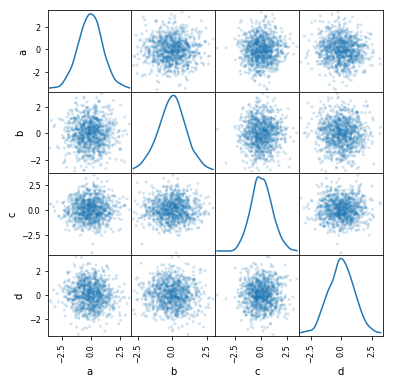

In [37]:
# create a scatter plot matrix
# import this class
from pandas.plotting import scatter_matrix

# generate DataFrame with 4 columns of 1000 random numbers
np.random.seed(seedval)
df_spm = pd.DataFrame(np.random.randn(1000, 4), 
                      columns=['a', 'b', 'c', 'd'])
# create the scatter matrix
scatter_matrix(df_spm, alpha=0.2, figsize=(6, 6), diagonal='kde');

# Heatmaps

In [38]:
# create a heatmap
# start with data for the heatmap
s = pd.Series([0.0, 0.1, 0.2, 0.3, 0.4],
              ['V', 'W', 'X', 'Y', 'Z'])
heatmap_data = pd.DataFrame({'A' : s + 0.0,
                             'B' : s + 0.1,
                             'C' : s + 0.2,
                             'D' : s + 0.3,
                             'E' : s + 0.4,
                             'F' : s + 0.5,
                             'G' : s + 0.6
                     })
heatmap_data

     A    B    C    D    E    F    G
V  0.0  0.1  0.2  0.3  0.4  0.5  0.6
W  0.1  0.2  0.3  0.4  0.5  0.6  0.7
X  0.2  0.3  0.4  0.5  0.6  0.7  0.8
Y  0.3  0.4  0.5  0.6  0.7  0.8  0.9
Z  0.4  0.5  0.6  0.7  0.8  0.9  1.0

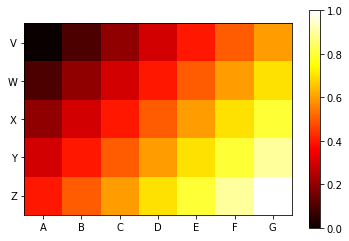

In [39]:
# generate the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='none')
plt.colorbar()  # add the scale of colors bar
# set the labels
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data)), heatmap_data.index);

> We will see an example of heatmaps to show correlations in the next chapter.

# Multiple Plots in a Single Chart

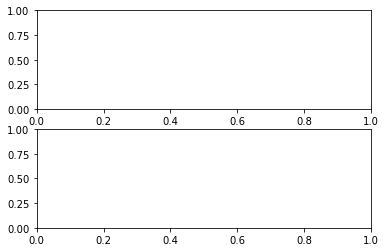

In [40]:
# create two sub plots on the new plot using a 2x1 grid
# ax1 is the upper row
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
# and ax2 is in the lower row
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

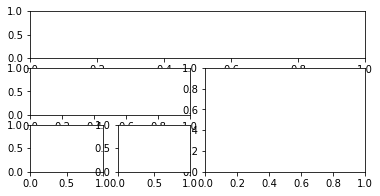

In [41]:
# layout sub plots on a 4x4 grid
# ax1 on top row, 4 columns wide
ax1 = plt.subplot2grid((4,4), (0,0), colspan=4)
# ax2 is row 2, leftmost and 2 columns wide
ax2 = plt.subplot2grid((4,4), (1,0), colspan=2)
# ax3 is 2 cols wide and 2 rows high, starting
# on second row and the third column
ax3 = plt.subplot2grid((4,4), (1,2), colspan=2, rowspan=2)
# ax4 1 high 1 wide, in row 4 column 0
ax4 = plt.subplot2grid((4,4), (2,0))
# ax4 1 high 1 wide, in row 4 column 1
ax5 = plt.subplot2grid((4,4), (2,1));

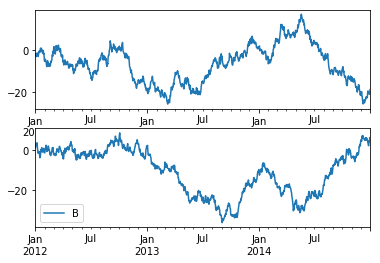

In [42]:
# demonstrating drawing into specific sub-plots
# generate a layout of 2 rows 1 column
# create the subplots, one on each row
ax5 = plt.subplot2grid((2,1), (0,0))
ax6 = plt.subplot2grid((2,1), (1,0))
# plot column 0 of walk_df into top row of the grid
walk_df[walk_df.columns[0]].plot(ax = ax5)
# and column 1 of walk_df into bottom row
walk_df[[walk_df.columns[1]]].plot(ax = ax6);

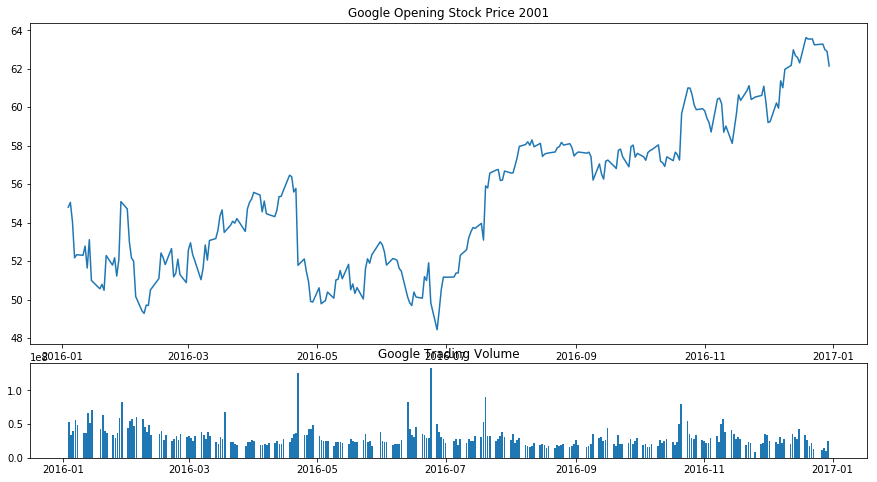

In [43]:
# draw the close on the top chart
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(stock_data.index, stock_data['Close'], label='Close')
plt.title('Google Opening Stock Price 2001')

# draw the volume chart on the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(stock_data.index, stock_data['Volume'])
plt.title('Google Trading Volume')

# set the size of the plot
plt.gcf().set_size_inches(15,8)

# Configuring pandas

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set formattign options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Obtaining and organizing stock data from Google Finance

In [2]:
# import data reader package
import pandas_datareader as pdr

# read data from Yahoo! Finance for a specific 
# stock specified by ticker and between the start and end dates
def get_stock_data(ticker, start, end):
    # read the data
    data = pdr.data.DataReader(ticker, 'google', start, end)

    # rename this column
    data.insert(0, "Ticker", ticker)
    return data

In [3]:
# request the three years of data for MSFT
start = datetime(2012, 1, 1)
end = datetime(2014, 12, 31)
get_stock_data("MSFT", start, end)[:5]

           Ticker   Open   High    Low  Close    Volume
Date                                                   
2012-01-03   MSFT  26.55  26.96  26.39  26.76  64735391
2012-01-04   MSFT  26.82  27.47  26.78  27.40  80519402
2012-01-05   MSFT  27.38  27.73  27.29  27.68  56082205
2012-01-06   MSFT  27.53  28.19  27.52  28.10  99459469
2012-01-09   MSFT  28.05  28.10  27.72  27.74  59708266

In [4]:
# gets data for multiple stocks
# tickers: a list of stock symbols to fetch
# start and end are the start end end dates
def get_data_for_multiple_stocks(tickers, start, end):
    # we return a dictionary
    stocks = dict()
    # loop through all the tickers
    for ticker in tickers:
        # get the data for the specific ticker
        s = get_stock_data(ticker, start, end)
        # add it to the dictionary
        stocks[ticker] = s
    # return the dictionary
    return stocks

In [5]:
# get the data for all the stocks that we want
raw = get_data_for_multiple_stocks(
    ["MSFT", "AAPL", "GE", "IBM", "AA", "DAL", "UAL", "PEP", "KO"],
    start, end)

In [6]:
# take a peek at the data for MSFT
raw['MSFT'][:5]

           Ticker   Open   High    Low  Close    Volume
Date                                                   
2012-01-03   MSFT  26.55  26.96  26.39  26.76  64735391
2012-01-04   MSFT  26.82  27.47  26.78  27.40  80519402
2012-01-05   MSFT  27.38  27.73  27.29  27.68  56082205
2012-01-06   MSFT  27.53  28.19  27.52  28.10  99459469
2012-01-09   MSFT  28.05  28.10  27.72  27.74  59708266

In [7]:
# given the dictionary of data frames,
# pivots a given column into values with column
# names being the stock symbols
def pivot_tickers_to_columns(raw, column):
    items = []
    # loop through all dictionary keys
    for key in raw:
        # get the data for the key
        data = raw[key]
        # extract just the column specified
        subset = data[["Ticker", column]]
        # add to items
        items.append(subset)
    
    # concatenate all the items
    combined = pd.concat(items)
    # reset the index
    ri = combined.reset_index()
    # return the pivot
    return ri.pivot("Date", "Ticker", column)

In [8]:
# do the pivot
close_px = pivot_tickers_to_columns(raw, "Close")
# peek at the result
close_px[:5]

Ticker       AAPL   DAL     GE  ...     MSFT    PEP    UAL
Date                            ...                       
2012-01-03  58.75  8.04  18.36  ...    26.76  66.40  18.90
2012-01-04  59.06  8.01  18.56  ...    27.40  66.74  18.52
2012-01-05  59.72  8.33  18.55  ...    27.68  66.22  18.39
2012-01-06  60.34  8.32  18.65  ...    28.10  65.39  18.21
2012-01-09  60.25  8.28  18.86  ...    27.74  65.73  17.93

[5 rows x 8 columns]

# Plotting time-series prices

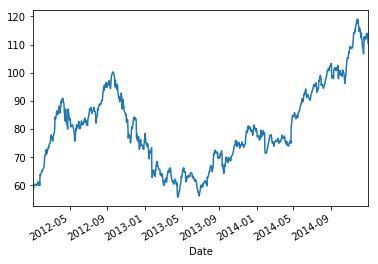

In [9]:
# plot the closing prices of AAPL
close_px['AAPL'].plot();

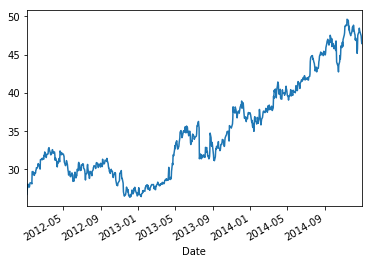

In [10]:
# plot the closing prices of MSFT
close_px['MSFT'].plot();

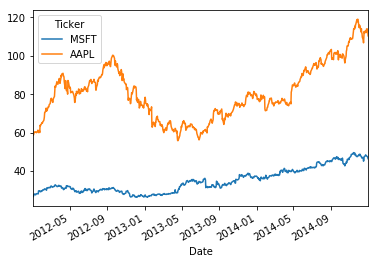

In [11]:
# plot MSFT vs AAPL on the same chart
close_px[['MSFT', 'AAPL']].plot();

In [12]:
# pivot the volume data into columns
volumes = pivot_tickers_to_columns(raw, "Volume")
volumes.tail()

Ticker          AAPL      DAL        GE   ...     \
Date                                      ...      
2014-12-24  14479611  4303380  17865138   ...      
2014-12-26  33720951  5303077  14978547   ...      
2014-12-29  27598920  6659665  20858159   ...      
2014-12-30  29881477  7318917  22184545   ...      
2014-12-31  41403351  7801706  28206452   ...      

Ticker          MSFT      PEP      UAL  
Date                                    
2014-12-24  11442790  1608616  2714807  
2014-12-26  13197817  1492689  3062153  
2014-12-29  14439518  2453829  2874473  
2014-12-30  16384692  2134434  2644611  
2014-12-31  21552450  3727376  4451235  

[5 rows x 8 columns]

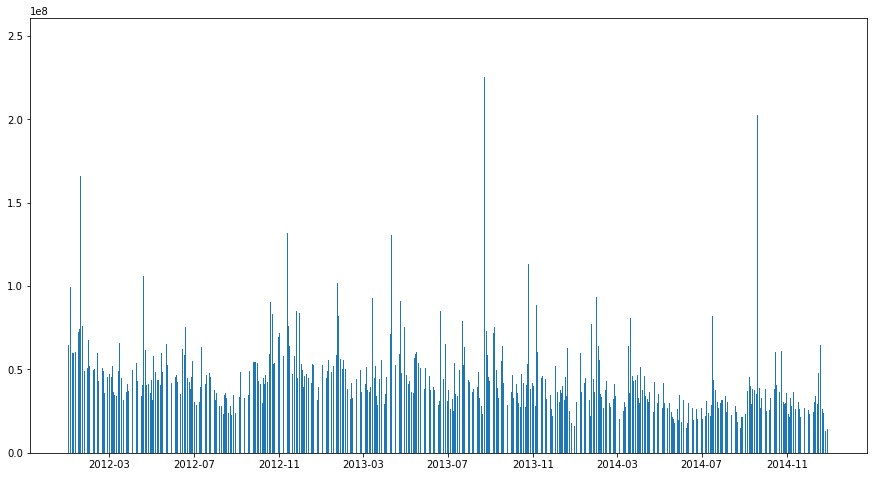

In [13]:
# plot the volume for MSFT
msft_volume = volumes[["MSFT"]]
plt.bar(msft_volume.index, msft_volume["MSFT"])
plt.gcf().set_size_inches(15,8)

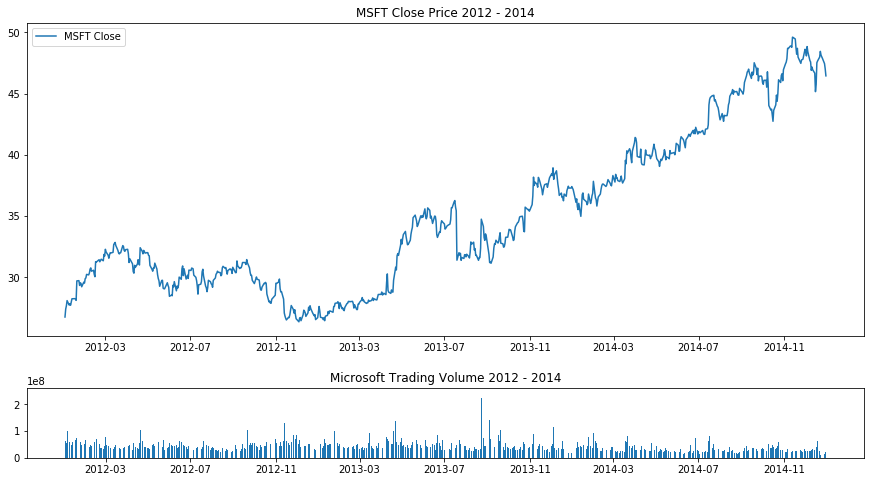

In [14]:
# draw the price history on the top
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(close_px['MSFT'].index, close_px['MSFT'], 
         label='MSFT Close')
plt.title('MSFT Close Price 2012 - 2014')
plt.legend(loc=2)

# and the volume along the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msft_volume.index, msft_volume['MSFT'])
plt.title('Microsoft Trading Volume 2012 - 2014')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

# Calculating simple daily percentage change

In [15]:
# calculate daily percentage change
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

Ticker          AAPL       DAL        GE    ...     \
Date                                        ...      
2012-01-03       NaN       NaN       NaN    ...      
2012-01-04  0.005277 -0.003731  0.010893    ...      
2012-01-05  0.011175  0.039950 -0.000539    ...      
2012-01-06  0.010382 -0.001200  0.005391    ...      
2012-01-09 -0.001492 -0.004808  0.011260    ...      

Ticker          MSFT       PEP       UAL  
Date                                      
2012-01-03       NaN       NaN       NaN  
2012-01-04  0.023916  0.005120 -0.020106  
2012-01-05  0.010219 -0.007791 -0.007019  
2012-01-06  0.015173 -0.012534 -0.009788  
2012-01-09 -0.012811  0.005200 -0.015376  

[5 rows x 8 columns]

In [16]:
# check the percentage on 2012-01-05
close_px.loc['2012-01-05']['AAPL'] / \
    close_px.loc['2012-01-04']['AAPL'] -1

0.011175076193701283

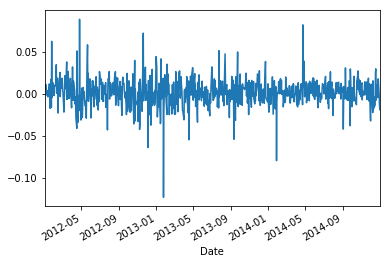

In [17]:
# plot daily percentage change for AAPL
daily_pc["AAPL"].plot();

# Calculating simple daily cumulative returns

In [18]:
# calculate daily cumulative return
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

Ticker          AAPL       DAL        GE    ...     \
Date                                        ...      
2012-01-03       NaN       NaN       NaN    ...      
2012-01-04  1.005277  0.996269  1.010893    ...      
2012-01-05  1.016511  1.036070  1.010349    ...      
2012-01-06  1.027064  1.034826  1.015795    ...      
2012-01-09  1.025532  1.029851  1.027233    ...      

Ticker          MSFT       PEP       UAL  
Date                                      
2012-01-03       NaN       NaN       NaN  
2012-01-04  1.023916  1.005120  0.979894  
2012-01-05  1.034380  0.997289  0.973016  
2012-01-06  1.050075  0.984789  0.963492  
2012-01-09  1.036622  0.989910  0.948677  

[5 rows x 8 columns]

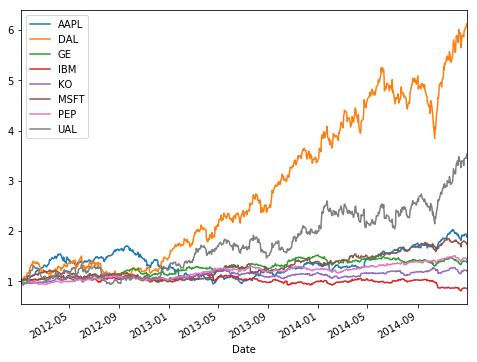

In [19]:
# plot all the cumulative returns to get an idea 
# of the relative performance of all the stocks
daily_cr.plot(figsize=(8,6))
plt.legend(loc=2);

# Resampling data from daily to monthly returns

In [20]:
# resample to end of month and forward fill values
monthly = close_px.asfreq('M').ffill()
monthly[:5]

Ticker       AAPL    DAL     GE  ...     MSFT    PEP  \
Date                             ...                   
2012-01-31  65.21  10.55  18.71  ...    29.53  65.67   
2012-02-29  77.49   9.81  19.05  ...    31.74  62.94   
2012-03-31  77.49   9.81  19.05  ...    31.74  62.94   
2012-04-30  83.43  10.96  19.58  ...    32.02  66.00   
2012-05-31  82.53  12.10  19.09  ...    29.19  67.85   

Ticker        UAL  
Date               
2012-01-31  23.10  
2012-02-29  20.65  
2012-03-31  20.65  
2012-04-30  21.92  
2012-05-31  25.17  

[5 rows x 8 columns]

In [21]:
# calculate the monthly percentage changes
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

Ticker          AAPL       DAL        GE    ...     \
Date                                        ...      
2012-01-31       NaN       NaN       NaN    ...      
2012-02-29  0.188315 -0.070142  0.018172    ...      
2012-03-31  0.000000  0.000000  0.000000    ...      
2012-04-30  0.076655  0.117227  0.027822    ...      
2012-05-31 -0.010787  0.104015 -0.025026    ...      

Ticker          MSFT       PEP       UAL  
Date                                      
2012-01-31       NaN       NaN       NaN  
2012-02-29  0.074839 -0.041571 -0.106061  
2012-03-31  0.000000  0.000000  0.000000  
2012-04-30  0.008822  0.048618  0.061501  
2012-05-31 -0.088382  0.028030  0.148266  

[5 rows x 8 columns]

In [22]:
# calculate monthly cumulative return
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

Ticker          AAPL       DAL        GE    ...     \
Date                                        ...      
2012-01-31       NaN       NaN       NaN    ...      
2012-02-29  1.188315  0.929858  1.018172    ...      
2012-03-31  1.188315  0.929858  1.018172    ...      
2012-04-30  1.279405  1.038863  1.046499    ...      
2012-05-31  1.265603  1.146919  1.020310    ...      

Ticker          MSFT       PEP       UAL  
Date                                      
2012-01-31       NaN       NaN       NaN  
2012-02-29  1.074839  0.958429  0.893939  
2012-03-31  1.074839  0.958429  0.893939  
2012-04-30  1.084321  1.005025  0.948918  
2012-05-31  0.988486  1.033196  1.089610  

[5 rows x 8 columns]

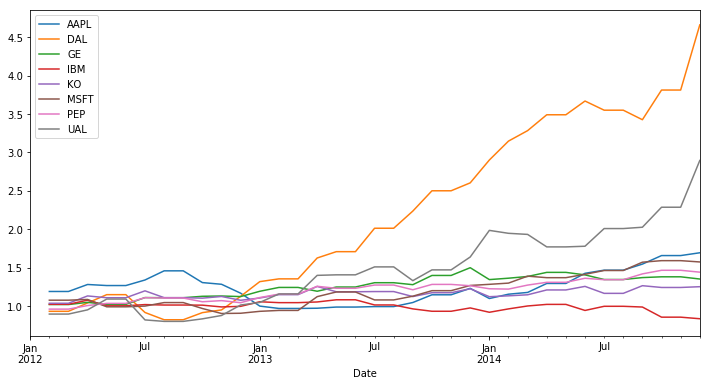

In [23]:
# plot the monthly cumulative returns
monthly_cr.plot(figsize=(12,6))
plt.legend(loc=2);

# Analyzing distribution of returns

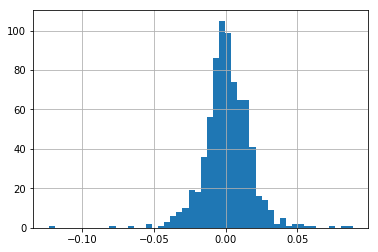

In [24]:
# histogram of the daily percentage change for AAPL
aapl = daily_pc['AAPL']
aapl.hist(bins=50);

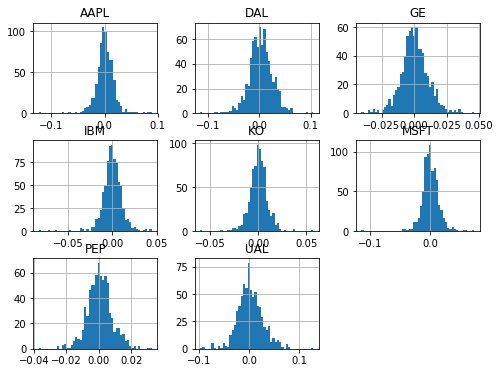

In [25]:
# matrix of all stocks daily % changes histograms
daily_pc.hist(bins=50, figsize=(8,6));

# Performing moving average calculation

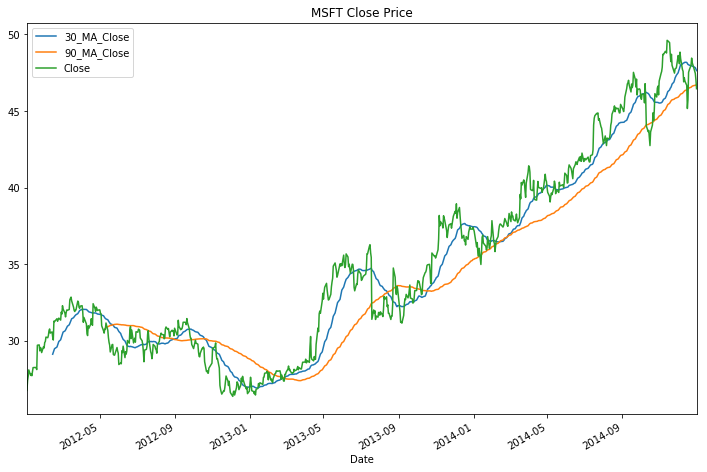

In [26]:
# extract just MSFT close
msft_close = close_px[['MSFT']]['MSFT']
# calculate the 30 and 90 day rolling means
ma_30 = msft_close.rolling(window=30).mean()
ma_90 = msft_close.rolling(window=90).mean()
# compose into a DataFrame that can be plotted
result = pd.DataFrame({'Close': msft_close, 
                       '30_MA_Close': ma_30,
                       '90_MA_Close': ma_90})
# plot all the series against each other
result.plot(title="MSFT Close Price")
plt.gcf().set_size_inches(12,8)

# Comparision of average daily returns across stocks

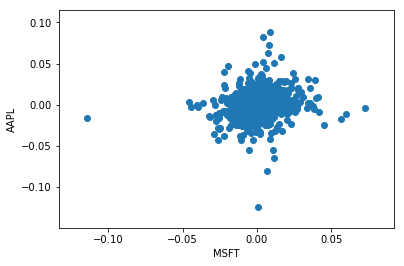

In [27]:
# plot the daily percentage change of MSFT vs AAPL
plt.scatter(daily_pc['MSFT'], daily_pc['AAPL'])
plt.xlabel('MSFT')
plt.ylabel('AAPL');

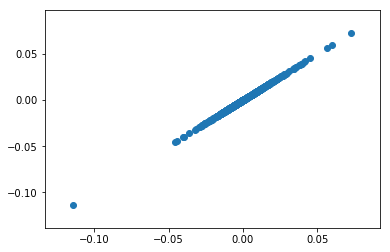

In [28]:
# demonstrate perfect correlation
plt.scatter(daily_pc['MSFT'], daily_pc['MSFT']);

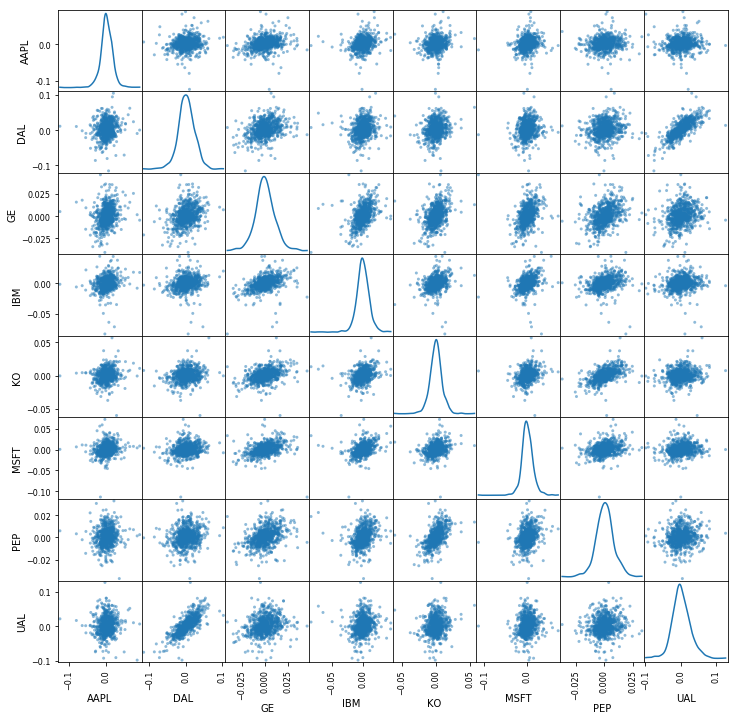

In [29]:
from pandas.plotting import scatter_matrix
# plot the scatter of daily price changed for ALL stocks
scatter_matrix(daily_pc, diagonal='kde', figsize=(12,12));

# Correlation of stocks based upon daily percentage change of closing price

In [30]:
# calculate the correlation between all the stocks relative
# to daily percentage change
corrs = daily_pc.corr()
corrs

Ticker      AAPL       DAL        GE    ...         MSFT  \
Ticker                                  ...                
AAPL    1.000000  0.136735  0.238862    ...     0.182679   
DAL     0.136735  1.000000  0.318175    ...     0.152912   
GE      0.238862  0.318175  1.000000    ...     0.340657   
IBM     0.213404  0.166197  0.427995    ...     0.354523   
KO      0.157938  0.187258  0.386182    ...     0.267434   
MSFT    0.182679  0.152912  0.340657    ...     1.000000   
PEP     0.096834  0.174259  0.373409    ...     0.280881   
UAL     0.061678  0.761239  0.236525    ...     0.127748   

Ticker       PEP       UAL  
Ticker                      
AAPL    0.096834  0.061678  
DAL     0.174259  0.761239  
GE      0.373409  0.236525  
IBM     0.252805  0.122614  
KO      0.553575  0.139636  
MSFT    0.280881  0.127748  
PEP     1.000000  0.124301  
UAL     0.124301  1.000000  

[8 rows x 8 columns]

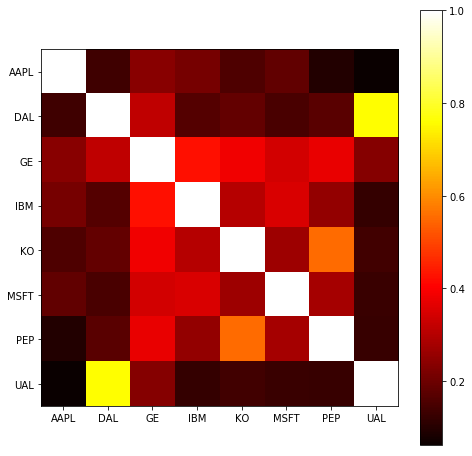

In [31]:
# plot a heatmap of the correlations
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)

# Volatility

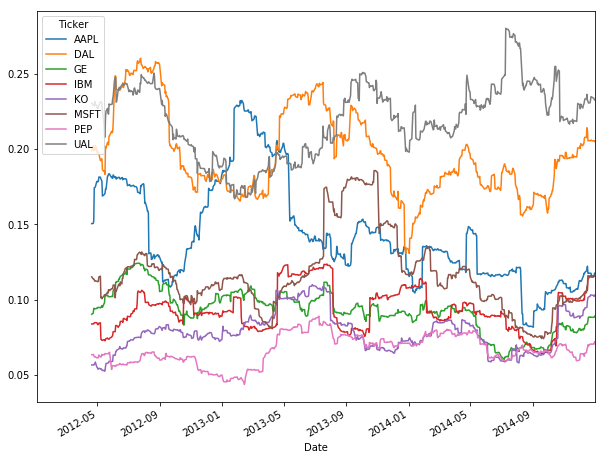

In [32]:
# 75 period minimum
min_periods = 75
# calculate the volatility
vol = daily_pc.rolling(window=min_periods).std() * \
        np.sqrt(min_periods)
# plot it
vol.plot(figsize=(10, 8));

# Determining risk relative to expected returns

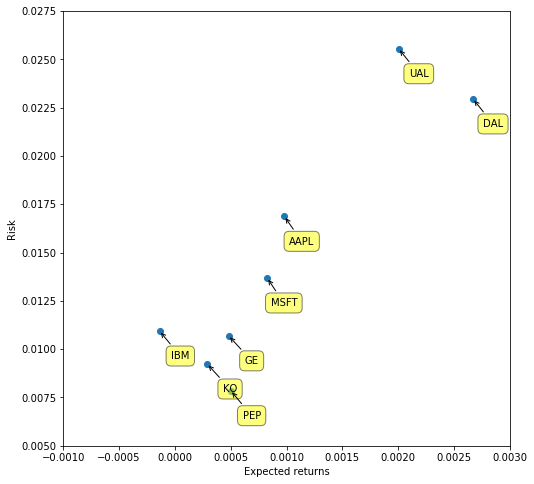

In [33]:
# generate a scatter of the mean vs std of daily % change
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# this adds fancy labels to each dot, with an arrow too
for label, x, y in zip(daily_pc.columns, 
                       daily_pc.mean(), 
                       daily_pc.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', 
                    fc = 'yellow', 
                    alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', 
                          connectionstyle = 'arc3,rad=0'))

# set ranges and scales for good presentation
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.0275)

# set size
plt.gcf().set_size_inches(8,8)